# Libraries

In [1]:
!pip install kaggle

In [2]:
!pip install keras-tuner

In [3]:
!pip install --upgrade keras-tuner

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import pickle
from tensorflow import keras
import keras_tuner as kt
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
from kerastuner.tuners import BayesianOptimization

Using TensorFlow backend


<ipython-input-4-329f135cd953>:13: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [5]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (6).json


{'kaggle (6).json': b'{"username":"andrsmacedoperea","key":"4ff6f7bee202ba65c54fb33e272c6493"}'}

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [7]:
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
import kaggle

kaggle.api.dataset_download_files('anshtanwar/global-data-on-sustainable-energy', path='./', unzip=True)
kaggle.api.dataset_download_files('akhiljethwa/global-electricity-statistics', path='./', unzip=True)

In [9]:
electricity_1 = pd.read_csv('/content/Global Electricity Statistics.csv')
electricity_2 = pd.read_csv('/content/global-data-on-sustainable-energy (1).csv')

In [10]:
electricity_1.head()

Country        Features  Region   1980   1981   1982   1983  \
0               Algeria  net generation  Africa  6.683   7.65  8.824  9.615   
1                Angola  net generation  Africa  0.905  0.906  0.995  1.028   
2                 Benin  net generation  Africa  0.005  0.005  0.005  0.005   
3              Botswana  net generation  Africa  0.443  0.502  0.489  0.434   
4          Burkina Faso  net generation  Africa  0.098  0.108  0.115  0.117   

     1984    1985    1986  ...     2012     2013      2014      2015  \
0  10.537  11.569  12.214  ...  53.9845  56.3134  60.39972  64.68244   
1   1.028   1.028   1.088  ...  6.03408  7.97606   9.21666   9.30914   
2   0.005   0.005   0.005  ...  0.04612  0.08848   0.22666   0.31056   
3   0.445   0.456   0.538  ...     0.33  0.86868   2.17628   2.79104   
4   0.113   0.115   0.122  ...  0.86834  0.98268   1.11808   1.43986   

        2016      2017      2018     2019         2020         2021  
0   66.75504  71.49546  72.10903   76.685  72.73591277  77.53072719  
1  10.203511  10.67604  12.83194     15.4         16.6    16.429392  
2    0.26004    0.3115   0.19028   0.2017      0.22608   0.24109728  
3    2.52984    2.8438   2.97076   3.0469      2.05144   2.18234816  
4     1.5509   1.64602    1.6464  1.72552  1.647133174  1.761209666  

[5 rows x 45 columns]

In [11]:
electricity_2.head()

Entity  Year  Access to electricity (% of population)  \
0  Afghanistan  2000                                 1.613591   
1  Afghanistan  2001                                 4.074574   
2  Afghanistan  2002                                 9.409158   
3  Afghanistan  2003                                14.738506   
4  Afghanistan  2004                                20.064968   

   Access to clean fuels for cooking  \
0                                6.2   
1                                7.2   
2                                8.2   
3                                9.5   
4                               10.9   

   Renewable-electricity-generating-capacity-per-capita  \
0                                               9.22      
1                                               8.86      
2                                               8.47      
3                                               8.09      
4                                               7.75      

   Financial flows to developing countries (US $)  \
0                                         20000.0   
1                                        130000.0   
2                                       3950000.0   
3                                      25970000.0   
4                                             NaN   

   Renewable energy share in the total final energy consumption (%)  \
0                                              44.99                  
1                                              45.60                  
2                                              37.83                  
3                                              36.66                  
4                                              44.24                  

   Electricity from fossil fuels (TWh)  Electricity from nuclear (TWh)  \
0                                 0.16                             0.0   
1                                 0.09                             0.0   
2                                 0.13                             0.0   
3                                 0.31                             0.0   
4                                 0.33                             0.0   

   Electricity from renewables (TWh)  ...  \
0                               0.31  ...   
1                               0.50  ...   
2                               0.56  ...   
3                               0.63  ...   
4                               0.56  ...   

   Primary energy consumption per capita (kWh/person)  \
0                                          302.59482    
1                                          236.89185    
2                                          210.86215    
3                                          229.96822    
4                                          204.23125    

   Energy intensity level of primary energy (MJ/$2017 PPP GDP)  \
0                                               1.64             
1                                               1.74             
2                                               1.40             
3                                               1.40             
4                                               1.20             

   Value_co2_emissions_kt_by_country  \
0                         760.000000   
1                         730.000000   
2                        1029.999971   
3                        1220.000029   
4                        1029.999971   

   Renewables (% equivalent primary energy)  gdp_growth  gdp_per_capita  \
0                                       NaN         NaN             NaN   
1                                       NaN         NaN             NaN   
2                                       NaN         NaN      179.426579   
3                                       NaN    8.832278      190.683814   
4                                       NaN    1.414118      211.382074   

   Density\n(P/Km2) Land Area(Km2)  Latitude  Longitude  
0                60       652230.0  33.93911  67.709953  
1          

# Dataset cleaning

In [12]:
electricity_2.shape

(3649, 21)

In [13]:
electricity_2.columns

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country',
       'Renewables (% equivalent primary energy)', 'gdp_growth',
       'gdp_per_capita', 'Density\n(P/Km2)', 'Land Area(Km2)', 'Latitude',
       'Longitude'],
      dtype='object')

In [14]:
electricity_2.drop(['Access to electricity (% of population)',
                   'Access to clean fuels for cooking',
                   'Longitude',
                   'Latitude',
                   'Land Area(Km2)',
                   'Renewables (% equivalent primary energy)',
                   'Value_co2_emissions_kt_by_country',
                   'Low-carbon electricity (% electricity)',
                   'Renewable energy share in the total final energy consumption (%)',
                   'Financial flows to developing countries (US $)',
                   'Renewable-electricity-generating-capacity-per-capita',
                   'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
                    'Density\\n(P/Km2)',
                    'gdp_growth',
                    'gdp_per_capita',
                    'Electricity from fossil fuels (TWh)',
                    'Electricity from renewables (TWh)'],
                    axis=1, inplace=True
                   )

electricity_2.head()

Entity  Year  Electricity from nuclear (TWh)  \
0  Afghanistan  2000                             0.0   
1  Afghanistan  2001                             0.0   
2  Afghanistan  2002                             0.0   
3  Afghanistan  2003                             0.0   
4  Afghanistan  2004                             0.0   

   Primary energy consumption per capita (kWh/person)  
0                                          302.59482   
1                                          236.89185   
2                                          210.86215   
3                                          229.96822   
4                                          204.23125

In [15]:
print(electricity_2['Year'].value_counts())

2020    175
2019    175
2018    175
2017    175
2016    175
2015    175
2014    175
2013    175
2011    174
2012    174
2010    174
2009    174
2008    174
2007    174
2000    173
2001    172
2006    172
2005    172
2004    172
2003    172
2002    172
Name: Year, dtype: int64


In [16]:
print(electricity_2['Entity'].unique())

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria' 'Azerbaijan'
 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize'
 'Benin' 'Bermuda' 'Bhutan' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada'
 'Cayman Islands' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador'
 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Fiji' 'Finland' 'France' 'French Guiana' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan'
 'Kazakhstan' 'Kenya' 'Kiribati' 'Kuwait' 'Kyrgyzstan' 'Latvia' 'Lebanon'
 'Lesot

In [17]:
print(electricity_1['Country'].unique())

['        Algeria' '        Angola' '        Benin' '        Botswana'
 '        Burkina Faso' '        Burundi' '        Cabo Verde'
 '        Cameroon' '        Central African Republic' '        Chad'
 '        Comoros' '        Congo-Brazzaville' '        Congo-Kinshasa'
 "        Cote d'Ivoire" '        Djibouti' '        Egypt'
 '        Equatorial Guinea' '        Eritrea' '        Eswatini'
 '        Ethiopia' '        Gabon' '        Gambia, The' '        Ghana'
 '        Guinea' '        Guinea-Bissau' '        Kenya'
 '        Lesotho' '        Liberia' '        Libya' '        Madagascar'
 '        Malawi' '        Mali' '        Mauritania' '        Mauritius'
 '        Morocco' '        Mozambique' '        Namibia' '        Niger'
 '        Nigeria' '        Reunion' '        Rwanda'
 '        Saint Helena' '        Sao Tome and Principe' '        Senegal'
 '        Seychelles' '        Sierra Leone' '        Somalia'
 '        South Africa' '        South Sudan' '      

In [18]:
electricity_1 = electricity_1.sort_values(by='Country')

electricity_1['Country'] = electricity_1['Country'].str.strip()

print(electricity_1['Country'].unique())

['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Angola' 'Antarctica'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium'
 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'British Virgin Islands' 'Brunei' 'Bulgaria'
 'Burkina Faso' 'Burma' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Canada' 'Cayman Islands' 'Central African Republic' 'Chad' 'Chile'
 'China' 'Colombia' 'Comoros' 'Congo-Brazzaville' 'Congo-Kinshasa'
 'Cook Islands' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador'
 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Falkland Islands' 'Faroe Islands' 'Fiji' 'Finland'
 'Former Czechoslovakia' 'Former Serbia and Montenegro' 'Former U.S.S.R.'
 'Former Yugoslavia' 'France' 'French Guiana' 'French Polynesia' 'Gabon'
 'Gambia, 

In [19]:
electricity_1.loc[electricity_1['Country'] == 'Germany, East', 'Country'] = 'Germany'
electricity_1.loc[electricity_1['Country'] == 'Germany, West', 'Country'] = 'Germany'
electricity_1.loc[electricity_1['Country'] == 'Congo-Kinshasa', 'Country'] = 'Congo'
electricity_1.loc[electricity_1['Country'] == 'Congo-Brazzaville', 'Country'] = 'Congo'
electricity_1.loc[electricity_1['Country'] == 'Turkiye', 'Country'] = 'Turkey'
electricity_1.loc[electricity_1['Country'] == 'Former U.S.S.R.', 'Country'] = 'Russia'
electricity_1.loc[electricity_1['Country'] == 'Former Czechoslovakia', 'Country'] = 'Serbia'
electricity_1.loc[electricity_1['Country'] == 'U.S. Pacific Islands', 'Country'] = 'United States'
electricity_1.loc[electricity_1['Country'] == 'U.S. Territories', 'Country'] = 'United States'
electricity_1.loc[electricity_1['Country'] == 'U.S. Virgin Islands', 'Country'] = 'United States'

print(electricity_1['Country'].unique())

['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Angola' 'Antarctica'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium'
 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'British Virgin Islands' 'Brunei' 'Bulgaria'
 'Burkina Faso' 'Burma' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Canada' 'Cayman Islands' 'Central African Republic' 'Chad' 'Chile'
 'China' 'Colombia' 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica'
 "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czechia' 'Denmark' 'Djibouti'
 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia'
 'Falkland Islands' 'Faroe Islands' 'Fiji' 'Finland' 'Serbia'
 'Former Serbia and Montenegro' 'Russia' 'Former Yugoslavia' 'France'
 'French Guiana' 'French Polynesia' 'Gabon' 'Gambia, The' 'Georgia'
 'Germany' 'Ghana' 'Gibraltar' 'Greece'

In [20]:
paises_1 = set(electricity_1['Country'])
paises_2 = set(electricity_2['Entity'])

paises_comunes = paises_1.intersection(paises_2)

paises_comunes_lista = list(paises_comunes)

print("Países comunes en ambos DataFrames:")
print(len(paises_comunes_lista))

Países comunes en ambos DataFrames:
172


In [21]:
electricity_1 = electricity_1[electricity_1['Country'].isin(paises_comunes_lista)].sort_values(by='Country')

print(electricity_1['Country'].unique())

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria' 'Azerbaijan'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bermuda' 'Bhutan' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada'
 'Cayman Islands' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador'
 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Fiji' 'Finland' 'France' 'French Guiana' 'Gabon' 'Georgia'
 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau'
 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia'
 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan'
 'Kenya' 'Kiribati' 'Kuwait' 'Kyrgyzstan' 'Latvia' 'Lebanon' 'Lesotho'
 'Liberia' 'Liby

In [22]:
electricity_2 = electricity_2[electricity_2['Entity'].isin(paises_comunes_lista)]

print(electricity_2['Entity'].unique())

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria' 'Azerbaijan'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bermuda' 'Bhutan' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada'
 'Cayman Islands' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador'
 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Fiji' 'Finland' 'France' 'French Guiana' 'Gabon' 'Georgia'
 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau'
 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia'
 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan'
 'Kenya' 'Kiribati' 'Kuwait' 'Kyrgyzstan' 'Latvia' 'Lebanon' 'Lesotho'
 'Liberia' 'Liby

In [23]:
electricity_1['Country'].unique() == electricity_2['Entity'].unique()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [24]:
cols = ['Country', 'Features', '2000', '2001',
            '2002','2003', '2004', '2005', '2006',
            '2007', '2008', '2009', '2010', '2011',
            '2012', '2013', '2014', '2015', '2016',
            '2017', '2018', '2019', '2020']

electricity_1 = electricity_1[cols]

electricity_1.shape

(1253, 23)

In [25]:
electricity_1.dtypes

Country     object
Features    object
2000        object
2001        object
2002        object
2003        object
2004        object
2005        object
2006        object
2007        object
2008        object
2009        object
2010        object
2011        object
2012        object
2013        object
2014        object
2015        object
2016        object
2017        object
2018        object
2019        object
2020        object
dtype: object

In [26]:
cols = ['2000', '2001', '2002', '2003', '2004', '2005', '2006',
        '2007', '2008', '2009', '2010', '2011', '2012', '2013',
        '2014', '2015', '2016', '2017', '2018', '2019', '2020']

for columna in cols:
    electricity_1.loc[electricity_1[columna] == '--', columna] = '0.0'
    electricity_1.loc[electricity_1[columna] == 'ie', columna] = '0.0'

electricity_1[cols] = electricity_1[cols].astype(float)

electricity_1.dtypes

<ipython-input-26-4ee1964f3fd2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  electricity_1.loc[electricity_1[columna] == '--', columna] = '0.0'
<ipython-input-26-4ee1964f3fd2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  electricity_1.loc[electricity_1[columna] == 'ie', columna] = '0.0'
<ipython-input-26-4ee1964f3fd2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elect

Country      object
Features     object
2000        float64
2001        float64
2002        float64
2003        float64
2004        float64
2005        float64
2006        float64
2007        float64
2008        float64
2009        float64
2010        float64
2011        float64
2012        float64
2013        float64
2014        float64
2015        float64
2016        float64
2017        float64
2018        float64
2019        float64
2020        float64
dtype: object

In [27]:
electricity_1 = electricity_1[electricity_1['Features'].str.contains('net generation')]

electricity_1.shape

(179, 23)

In [28]:
electricity_1 = electricity_1.groupby('Country').sum().reset_index()

electricity_1.shape

<ipython-input-28-a7cc5d280b70>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  electricity_1 = electricity_1.groupby('Country').sum().reset_index()


(172, 22)

In [29]:
electricity_1.columns

Index(['Country', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020'],
      dtype='object')

In [30]:
maximos_por_pais = electricity_2.groupby('Entity')['Electricity from nuclear (TWh)'].max().reset_index()

maximos_ordenados = maximos_por_pais.sort_values(by='Electricity from nuclear (TWh)', ascending=False)

top_10_paises = maximos_ordenados.head(10)

print(top_10_paises)

             Entity  Electricity from nuclear (TWh)
165   United States                          809.41
56           France                          451.53
33            China                          366.20
79            Japan                          305.95
60          Germany                          171.30
28           Canada                          101.21
162         Ukraine                           92.54
164  United Kingdom                           90.09
150          Sweden                           77.49
146           Spain                           63.71


In [31]:
electricity_1.head()

Country      2000      2001      2002      2003      2004  \
0          Afghanistan   0.46700   0.59200   0.68700   0.93900   0.89400   
1              Albania   4.68336   3.64778   3.64056   5.21758   5.54260   
2              Algeria  23.88952  25.03064  25.99154  27.80964  29.38706   
3               Angola   1.40402   1.59074   1.71668   1.93776   2.18608   
4  Antigua and Barbuda   0.14100   0.16100   0.18000   0.19800   0.20800   

       2005      2006      2007      2008  ...      2011      2012      2013  \
0   0.93400   0.83700   0.94600   0.72801  ...   0.77130   0.88200   1.10340   
1   5.38480   5.03842   2.82768   3.83110  ...   4.14694   4.67865   6.89041   
2  31.90740  33.12352  34.97580  37.83582  ...  48.17578  53.98450  56.31340   
3   2.72998   3.24054   3.14880   4.06368  ...   5.52336   6.03408   7.97606   
4   0.22800   0.24300   0.26300   0.27100  ...   0.31850   0.31050   0.31060   

       2014       2015       2016       2017      2018      2019       2020  
0   1.15900   1.183200   1.214700   1.264260   1.16493   1.07269   0.807280  
1   4.67776   5.837050   7.706180   4.480750   8.46748   5.17594   5.313000  
2  60.39972  64.682440  66.755040  71.495460  72.10903  76.68500  72.735913  
3   9.21666   9.309140  10.203511  10.676040  12.83194  15.40000  16.600000  
4   0.31660   0.325355   0.328000   0.329142   0.33500   0.34100   0.327424  

[5 rows x 22 columns]

In [32]:
electricity_1 = pd.melt(electricity_1,
                        id_vars=['Country'],
                        value_vars=['2000', '2001', '2002', '2003', '2004', '2005', '2006',
                                    '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
                                    '2015', '2016', '2017', '2018', '2019', '2020'],
                        var_name='Year',
                        value_name='net_production')

electricity_1.head()

Country  Year  net_production
0          Afghanistan  2000         0.46700
1              Albania  2000         4.68336
2              Algeria  2000        23.88952
3               Angola  2000         1.40402
4  Antigua and Barbuda  2000         0.14100

In [33]:
electricity_1.shape

(3612, 3)

In [34]:
electricity_2.shape

(3565, 4)

In [35]:
print(electricity_2.isna().sum())

Entity                                                  0
Year                                                    0
Electricity from nuclear (TWh)                        126
Primary energy consumption per capita (kWh/person)      0
dtype: int64


In [36]:
electricity_2.fillna(0.0, inplace=True)

print(electricity_2.isna().sum())

Entity                                                0
Year                                                  0
Electricity from nuclear (TWh)                        0
Primary energy consumption per capita (kWh/person)    0
dtype: int64


In [37]:
conteo_paises = electricity_2['Entity'].value_counts()

for pais, conteo in conteo_paises.items():
    print(f'{pais}: {conteo}')

Afghanistan: 21
Oman: 21
Netherlands: 21
New Caledonia: 21
New Zealand: 21
Nicaragua: 21
Niger: 21
Nigeria: 21
North Macedonia: 21
Norway: 21
Pakistan: 21
Kyrgyzstan: 21
Panama: 21
Papua New Guinea: 21
Paraguay: 21
Peru: 21
Philippines: 21
Poland: 21
Portugal: 21
Puerto Rico: 21
Nepal: 21
Nauru: 21
Namibia: 21
Mozambique: 21
Lebanon: 21
Lesotho: 21
Liberia: 21
Libya: 21
Lithuania: 21
Luxembourg: 21
Madagascar: 21
Malawi: 21
Malaysia: 21
Maldives: 21
Mali: 21
Malta: 21
Mauritania: 21
Mauritius: 21
Mexico: 21
Mongolia: 21
Morocco: 21
Qatar: 21
Romania: 21
Rwanda: 21
Tajikistan: 21
Togo: 21
Tonga: 21
Trinidad and Tobago: 21
Tunisia: 21
Turkey: 21
Turkmenistan: 21
Tuvalu: 21
Uganda: 21
Ukraine: 21
United Arab Emirates: 21
United Kingdom: 21
United States: 21
Uruguay: 21
Uzbekistan: 21
Vanuatu: 21
Yemen: 21
Zambia: 21
Thailand: 21
Switzerland: 21
Saint Kitts and Nevis: 21
Sweden: 21
Saint Lucia: 21
Samoa: 21
Sao Tome and Principe: 21
Saudi Arabia: 21
Senegal: 21
Seychelles: 21
Sierra Leone:

In [38]:
electricity_2[(electricity_2['Entity'] == 'Serbia') |
              (electricity_2['Entity'] == 'Montenegro') |
              (electricity_2['Entity'] == 'South Sudan') |
              (electricity_2['Entity'] == 'French Guiana')]

Entity  Year  Electricity from nuclear (TWh)  \
1218  French Guiana  2000                             0.0   
2185     Montenegro  2007                             0.0   
2186     Montenegro  2008                             0.0   
2187     Montenegro  2009                             0.0   
2188     Montenegro  2010                             0.0   
2189     Montenegro  2011                             0.0   
2190     Montenegro  2012                             0.0   
2191     Montenegro  2013                             0.0   
2192     Montenegro  2014                             0.0   
2193     Montenegro  2015                             0.0   
2194     Montenegro  2016                             0.0   
2195     Montenegro  2017                             0.0   
2196     Montenegro  2018                             0.0   
2197     Montenegro  2019                             0.0   
2198     Montenegro  2020                             0.0   
2913         Serbia  2007                             0.0   
2914         Serbia  2008                             0.0   
2915         Serbia  2009                             0.0   
2916         Serbia  2010                             0.0   
2917         Serbia  2011                             0.0   
2918         Serbia  2012                             0.0   
2919         Serbia  2013                             0.0   
2920         Serbia  2014                             0.0   
2921         Serbia  2015                             0.0   
2922         Serbia  2016                             0.0   
2923         Serbia  2017                             0.0   
2924         Serbia  2018                             0.0   
2925         Serbia  2019                             0.0   
2926         Serbia  2020                             0.0   
3095    South Sudan  2013                             0.0   
3096    South Sudan  2014                             0.0   
3097    South Sudan  2015                             0.0   
3098    South Sudan  2016                             0.0   
3099    South Sudan  2017                             0.0   
3100    South Sudan  2018                             0.0   
3101    South Sudan  2019                             0.0   
3102    South Sudan  2020                             0.0   

      Primary energy consumption per capita (kWh/person)  
1218                                        13692.39400   
2185                                        21851.39300   
2186                                        24712.11500   
2187                                        21325.20500   
2188                                        26631.98800   
2189                                        21941.47900   
2190                                        21276.30500   
2191                                        22880.11100   
2192                                        20434.42000   
2193                                        21034.89500   
2194                                        21028.14800   
2195                                        19660.41200   
2196                                        21852.67600   
2197                                        20460.55000   
2198                                        17942.34200   
2913                                        26348.52700   
2914                                        26371.51600   
2915                                        25290.53500   
2916                                        26212.14000   
2917                                        26607.53700   
2918                                        25157.43800   
2919                                        25155.99200   
2920                                        22474.78700   
2921                                        24964.81000   
2922                                        25665.12100   
2923                                        26359.04100   
2924                                        26481.45100   
2925                                      

In [39]:
conteo_paises = electricity_1['Country'].value_counts()

for pais, conteo in conteo_paises.items():
    print(f'{pais}: {conteo}')

Afghanistan: 21
Pakistan: 21
New Caledonia: 21
New Zealand: 21
Nicaragua: 21
Niger: 21
Nigeria: 21
North Macedonia: 21
Norway: 21
Oman: 21
Panama: 21
Nepal: 21
Papua New Guinea: 21
Paraguay: 21
Peru: 21
Philippines: 21
Poland: 21
Portugal: 21
Puerto Rico: 21
Qatar: 21
Netherlands: 21
Nauru: 21
Albania: 21
Maldives: 21
Lesotho: 21
Liberia: 21
Libya: 21
Lithuania: 21
Luxembourg: 21
Madagascar: 21
Malawi: 21
Malaysia: 21
Mali: 21
Namibia: 21
Malta: 21
Mauritania: 21
Mauritius: 21
Mexico: 21
Mongolia: 21
Montenegro: 21
Morocco: 21
Mozambique: 21
Romania: 21
Rwanda: 21
Saint Kitts and Nevis: 21
Uganda: 21
Thailand: 21
Togo: 21
Tonga: 21
Trinidad and Tobago: 21
Tunisia: 21
Turkey: 21
Turkmenistan: 21
Tuvalu: 21
Ukraine: 21
Saint Lucia: 21
United Arab Emirates: 21
United Kingdom: 21
United States: 21
Uruguay: 21
Uzbekistan: 21
Vanuatu: 21
Yemen: 21
Zambia: 21
Tajikistan: 21
Switzerland: 21
Sweden: 21
Suriname: 21
Samoa: 21
Sao Tome and Principe: 21
Saudi Arabia: 21
Senegal: 21
Serbia: 21
Seyc

In [40]:
electricity_1 = electricity_1[~electricity_1['Country'].isin(['Serbia', 'Montenegro', 'South Sudan', 'French Guiana'])]
electricity_2 = electricity_2[~electricity_2['Entity'].isin(['Serbia', 'Montenegro', 'South Sudan', 'French Guiana'])]

print('shape 1: ', electricity_1.shape)
print('shape 2: ', electricity_2.shape)

shape 1:  (3528, 3)
shape 2:  (3528, 4)


In [41]:
electricity_2.rename(columns={'Entity': 'Country'}, inplace=True)

electricity_2.columns

<ipython-input-41-39da4d92461f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  electricity_2.rename(columns={'Entity': 'Country'}, inplace=True)


Index(['Country', 'Year', 'Electricity from nuclear (TWh)',
       'Primary energy consumption per capita (kWh/person)'],
      dtype='object')

In [42]:
electricity_1.columns

Index(['Country', 'Year', 'net_production'], dtype='object')

In [43]:
print(electricity_1.dtypes)
print(electricity_2.dtypes)

Country            object
Year               object
net_production    float64
dtype: object
Country                                                object
Year                                                    int64
Electricity from nuclear (TWh)                        float64
Primary energy consumption per capita (kWh/person)    float64
dtype: object


In [44]:
electricity_1['Year'] = electricity_1['Year'].astype(int)

In [45]:
electricity = electricity_1.merge(electricity_2, on=['Country', 'Year'])

electricity.head()

Country  Year  net_production  Electricity from nuclear (TWh)  \
0          Afghanistan  2000         0.46700                             0.0   
1              Albania  2000         4.68336                             0.0   
2              Algeria  2000        23.88952                             0.0   
3               Angola  2000         1.40402                             0.0   
4  Antigua and Barbuda  2000         0.14100                             0.0   

   Primary energy consumption per capita (kWh/person)  
0                                          302.59482   
1                                         9029.43750   
2                                         9746.52400   
3                                         1979.25620   
4                                        28457.22300

In [46]:
electricity.shape

(3528, 5)

In [47]:
electricity.rename(columns={'net_production': 'Net production (TWh)'}, inplace=True)

electricity.head()

Country  Year  Net production (TWh)  \
0          Afghanistan  2000               0.46700   
1              Albania  2000               4.68336   
2              Algeria  2000              23.88952   
3               Angola  2000               1.40402   
4  Antigua and Barbuda  2000               0.14100   

   Electricity from nuclear (TWh)  \
0                             0.0   
1                             0.0   
2                             0.0   
3                             0.0   
4                             0.0   

   Primary energy consumption per capita (kWh/person)  
0                                          302.59482   
1                                         9029.43750   
2                                         9746.52400   
3                                         1979.25620   
4                                        28457.22300

In [48]:
print((electricity['Electricity from nuclear (TWh)'] == 0).sum())


2950


In [49]:
nonzero_energy = electricity[electricity['Electricity from nuclear (TWh)'] != 0]['Country']

unique_countries = nonzero_energy.unique()

print("Con Energia Nuclear:")
print(unique_countries)

Con Energia Nuclear:
['Argentina' 'Armenia' 'Belgium' 'Brazil' 'Bulgaria' 'Canada' 'China'
 'Czechia' 'Finland' 'France' 'Germany' 'Hungary' 'India' 'Japan'
 'Lithuania' 'Mexico' 'Netherlands' 'Pakistan' 'Romania' 'Slovakia'
 'Slovenia' 'South Africa' 'Spain' 'Sweden' 'Switzerland' 'Ukraine'
 'United Kingdom' 'United States' 'Belarus' 'United Arab Emirates']


In [50]:
electricity.dtypes

Country                                                object
Year                                                    int64
Net production (TWh)                                  float64
Electricity from nuclear (TWh)                        float64
Primary energy consumption per capita (kWh/person)    float64
dtype: object

In [51]:
electricity = pd.pivot_table(electricity,
                            values=['Net production (TWh)', 'Electricity from nuclear (TWh)', 'Primary energy consumption per capita (kWh/person)'],
                            index='Country',
                            columns='Year')

electricity.columns = [f'{col[0]} {col[1]}' for col in electricity.columns]

electricity.reset_index(inplace=True)

electricity.head()

Country  Electricity from nuclear (TWh) 2000  \
0          Afghanistan                                  0.0   
1              Albania                                  0.0   
2              Algeria                                  0.0   
3               Angola                                  0.0   
4  Antigua and Barbuda                                  0.0   

   Electricity from nuclear (TWh) 2001  Electricity from nuclear (TWh) 2002  \
0                                  0.0                                  0.0   
1                                  0.0                                  0.0   
2                                  0.0                                  0.0   
3                                  0.0                                  0.0   
4                                  0.0                                  0.0   

   Electricity from nuclear (TWh) 2003  Electricity from nuclear (TWh) 2004  \
0                                  0.0                                  0.0   
1                                  0.0                                  0.0   
2                                  0.0                                  0.0   
3                                  0.0                                  0.0   
4                                  0.0                                  0.0   

   Electricity from nuclear (TWh) 2005  Electricity from nuclear (TWh) 2006  \
0                                  0.0                                  0.0   
1                                  0.0                                  0.0   
2                                  0.0                                  0.0   
3                                  0.0                                  0.0   
4                                  0.0                                  0.0   

   Electricity from nuclear (TWh) 2007  Electricity from nuclear (TWh) 2008  \
0                                  0.0                                  0.0   
1                                  0.0                                  0.0   
2                                  0.0                                  0.0   
3                                  0.0                                  0.0   
4                                  0.0                                  0.0   

   ...  Primary energy consumption per capita (kWh/person) 2011  \
0  ...                                          1436.1143         
1  ...                                         10854.6490         
2  ...                                         12710.5410         
3  ...                                          3594.4900         
4  ...                                         32616.0840         

   Primary energy consumption per capita (kWh/person) 2012  \
0                                          1324.1211         
1                                         10652.8090         
2                                         13624.9090         
3                                          3615.5242         
4                                         33159.3700         

   Primary energy consumption per capita (kWh/person) 2013  \
0                                          1060.7926         
1                                         13392.7740         
2                                         14130.7350         
3                                          3897.9126         
4                                         32853.8750         

   Primary energy consumption per capita (kWh/person) 2014  \
0                                           868.5762         
1                                         11809.4610         
2                                         15108.6350         
3                                          4135.0474         
4                                         33313.0000         

   Primary energy consumption per capita (kWh/person) 2015  \
0                                           970.0803         
1                                         11824.3140         
2                           

In [52]:
electricity.shape

(168, 64)

In [53]:
electricity.fillna(0.0, inplace=True)

columns_to_check = [f'Electricity from nuclear (TWh) {year}' for year in range(2000, 2021)]

electricity = electricity[~(electricity[columns_to_check] == 0.0).all(axis=1)]

electricity.reset_index(inplace=True)

electricity.drop(columns='index', inplace=True)

electricity

Country  Electricity from nuclear (TWh) 2000  \
0              Argentina                                 5.99   
1                Armenia                                 1.84   
2                Belarus                                 0.00   
3                Belgium                                48.16   
4                 Brazil                                 4.94   
5               Bulgaria                                18.18   
6                 Canada                                69.16   
7                  China                                16.74   
8                Czechia                                13.59   
9                Finland                                22.48   
10                France                               415.16   
11               Germany                               169.61   
12               Hungary                                14.18   
13                 India                                15.77   
14                 Japan                               305.95   
15             Lithuania                                 8.42   
16                Mexico                                 7.81   
17           Netherlands                                 3.93   
18              Pakistan                                 0.38   
19               Romania                                 5.46   
20              Slovakia                                16.49   
21              Slovenia                                 4.76   
22          South Africa                                13.01   
23                 Spain                                62.21   
24                Sweden                                57.32   
25           Switzerland                                25.12   
26               Ukraine                                77.34   
27  United Arab Emirates                                 0.00   
28        United Kingdom                                85.06   
29         United States                               753.89   

    Electricity from nuclear (TWh) 2001  Electricity from nuclear (TWh) 2002  \
0                                  6.54                                 5.39   
1                                  1.99                                 2.09   
2                                  0.00                                 0.00   
3                                 46.35                                47.36   
4                                 14.27                                13.84   
5                                 19.55                                20.22   
6                                 72.86                                71.75   
7                                 17.47                                25.13   
8                                 14.75                                18.74   
9                                 22.77                                22.30   
10                               421.08                               436.76   
11                               171.30                               164.84   
12                                14.13                                13.95   
13                                18.89                                19.35   
14                               303.86                               280.34   
15                                11.36                                14.14   
16                                 8.29                                 9.26   
17                                 3.98                                 3.91   
18                                 1.98                                 1.80   
19                                 5.45                                 5.51   
20                                17.10                                17.95   
21                                 5.26                                 5.53   
22                                10.72                                11.99   
23                                63.71                                63.02   
2

In [54]:
print(electricity.loc[electricity['Country'] == 'Belarus', 'Electricity from nuclear (TWh) 2020'].values[0])

0.34


In [55]:
columnas_de_interes = ['Country'] + [col for col in electricity.columns if 'Electricity from nuclear (TWh)' in col]

nuclear = electricity[columnas_de_interes]

nuclear.head()

Country  Electricity from nuclear (TWh) 2000  \
0  Argentina                                 5.99   
1    Armenia                                 1.84   
2    Belarus                                 0.00   
3    Belgium                                48.16   
4     Brazil                                 4.94   

   Electricity from nuclear (TWh) 2001  Electricity from nuclear (TWh) 2002  \
0                                 6.54                                 5.39   
1                                 1.99                                 2.09   
2                                 0.00                                 0.00   
3                                46.35                                47.36   
4                                14.27                                13.84   

   Electricity from nuclear (TWh) 2003  Electricity from nuclear (TWh) 2004  \
0                                 7.03                                 7.31   
1                                 1.82                                 2.20   
2                                 0.00                                 0.00   
3                                47.38                                47.31   
4                                13.40                                11.60   

   Electricity from nuclear (TWh) 2005  Electricity from nuclear (TWh) 2006  \
0                                 6.37                                 7.15   
1                                 2.50                                 2.42   
2                                 0.00                                 0.00   
3                                47.60                                46.65   
4                                 9.20                                12.98   

   Electricity from nuclear (TWh) 2007  Electricity from nuclear (TWh) 2008  \
0                                 6.72                                 6.85   
1                                 2.35                                 2.27   
2                                 0.00                                 0.00   
3                                48.23                                45.57   
4                                11.65                                13.21   

   ...  Electricity from nuclear (TWh) 2011  \
0  ...                                 5.89   
1  ...                                 2.36   
2  ...                                 0.00   
3  ...                                48.23   
4  ...                                14.80   

   Electricity from nuclear (TWh) 2012  Electricity from nuclear (TWh) 2013  \
0                                 5.90                                 5.73   
1                                 2.12                                 2.17   
2                                 0.00                                 0.00   
3                                40.29                                42.64   
4                                15.17                                14.65   

   Electricity from nuclear (TWh) 2014  Electricity from nuclear (TWh) 2015  \
0                                 5.26                                 6.64   
1                                 2.27                                 2.57   
2                                 0.00                                 0.00   
3                                33.70                                26.10   
4                                14.46                                13.91   

   Electricity from nuclear (TWh) 2016  Electricity from nuclear (TWh) 2017  \
0                                 7.82                                 5.77   
1                                 2.19                                 2.41   
2                                 0.00                                 0.00   
3                                43.52                                42.23   
4                                14.97                                14.86   

   Electricity from nuclear (TWh) 2018  Electricity from nuclear (TWh) 2019  \

In [56]:
columnas_de_interes = ['Country'] + [col for col in electricity.columns if 'Net production (TWh)' in col]

net = electricity[columnas_de_interes]

net.head()

Country  Net production (TWh) 2000  Net production (TWh) 2001  \
0  Argentina                   85.19206                   86.48440   
1    Armenia                    5.61848                    5.56760   
2    Belarus                   24.53656                   23.56102   
3    Belgium                   77.99376                   74.06752   
4     Brazil                  342.57352                  323.16798   

   Net production (TWh) 2002  Net production (TWh) 2003  \
0                   81.12854                   88.12590   
1                    5.21526                    5.21174   
2                   24.86938                   25.03106   
3                   76.28200                   78.76056   
4                  340.29716                  358.89562   

   Net production (TWh) 2004  Net production (TWh) 2005  \
0                   95.62971                  100.68002   
1                    5.90414                    5.97832   
2                   29.33944                   29.10730   
3                   79.49996                   80.61608   
4                  381.18166                  395.72128   

   Net production (TWh) 2006  Net production (TWh) 2007  \
0                  111.26409                 110.511100   
1                    5.61744                   5.584465   
2                   29.84608                  29.871700   
3                   79.31910                  82.412440   
4                  411.92528                 437.186580   

   Net production (TWh) 2008  ...  Net production (TWh) 2011  \
0                  114.49082  ...                 122.620290   
1                    5.46643  ...                   7.070600   
2                   32.90438  ...                  30.251880   
3                   78.76178  ...                  86.160664   
4                  454.67754  ...                 527.402800   

   Net production (TWh) 2012  Net production (TWh) 2013  \
0                 128.543580                 132.159030   
1                   7.622060                   7.305620   
2                  28.929240                  29.601460   
3                  79.344337                  79.545951   
4                 547.163560                 563.490720   

   Net production (TWh) 2014  Net production (TWh) 2015  \
0                 131.557530                 137.559162   
1                   7.333660                   7.390940   
2                  32.634180                  32.009700   
3                  69.431713                  66.970488   
4                 581.865880                 571.559384   

   Net production (TWh) 2016  Net production (TWh) 2017  \
0                 139.367123                 138.361716   
1                   6.951140                   7.361680   
2                  31.547300                  32.455260   
3                  82.053225                  82.770650   
4                 571.408060                 581.146911   

   Net production (TWh) 2018  Net production (TWh) 2019  \
0                 139.519096                 132.974862   
1                   7.387260                   7.304470   
2                  36.659960                  37.683500   
3                  71.806504                  89.920461   
4                 594.152279                 618.659803   

   Net production (TWh) 2020  
0                 138.561881  
1                   7.445040  
2                  36.210900  
3                  85.690887  
4                 614.369960  

[5 rows x 22 columns]

In [57]:
columnas_de_interes = ['Country'] + [col for col in electricity.columns if 'Primary energy consumption per capita (kWh/person)' in col]

consumption = electricity[columnas_de_interes]

consumption.head()

Country  Primary energy consumption per capita (kWh/person) 2000  \
0  Argentina                                          18849.810         
1    Armenia                                           9270.454         
2    Belarus                                          24868.184         
3    Belgium                                          72420.410         
4     Brazil                                          13400.320         

   Primary energy consumption per capita (kWh/person) 2001  \
0                                          18210.120         
1                                           9219.866         
2                                          24306.926         
3                                          71475.500         
4                                          12893.828         

   Primary energy consumption per capita (kWh/person) 2002  \
0                                          17275.256         
1                                           8911.608         
2                                          25309.941         
3                                          70828.990         
4                                          13021.791         

   Primary energy consumption per capita (kWh/person) 2003  \
0                                          18326.521         
1                                           9866.072         
2                                          25292.014         
3                                          73221.560         
4                                          13111.923         

   Primary energy consumption per capita (kWh/person) 2004  \
0                                          19261.457         
1                                          10294.192         
2                                          28508.880         
3                                          73126.234         
4                                          13593.700         

   Primary energy consumption per capita (kWh/person) 2005  \
0                                          20232.844         
1                                          11997.367         
2                                          28600.459         
3                                          71894.960         
4                                          13792.465         

   Primary energy consumption per capita (kWh/person) 2006  \
0                                          21038.723         
1                                          12061.231         
2                                          30598.045         
3                                          71647.290         
4                                          14020.683         

   Primary energy consumption per capita (kWh/person) 2007  \
0                                          21708.370         
1                                          13633.888         
2                                          29999.406         
3                                          71662.340         
4                                          14770.351         

   Primary energy consumption per capita (kWh/person) 2008  ...  \
0                                          21780.380        ...   
1                                          13250.285        ...   
2                                          30513.402        ...   
3                                          72317.910        ...   
4                                          15255.087        ...   

   Primary energy consumption per capita (kWh/person) 2011  \
0                                          21894.867         
1                                          14139.787         
2                                          30981.086         
3                                          65134.080         
4                                          16629.840         

   Primary energy consumption per capita (kWh/person) 2012  \
0                                          22494.715         
1                                          15057.879   

# Visualization

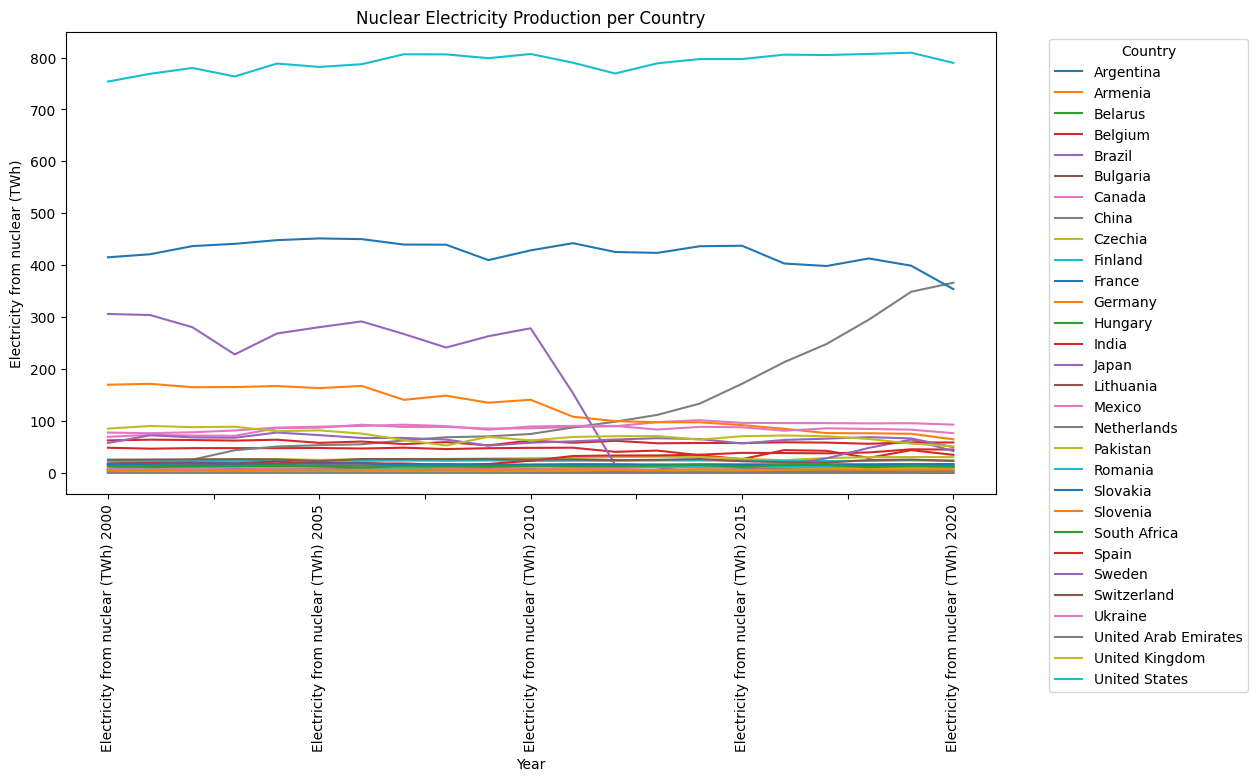

In [58]:
columnas_electricity = [col for col in nuclear.columns if 'Electricity from nuclear (TWh)' in col]

df_transpuesto = nuclear.set_index('Country')[columnas_electricity].T

df_transpuesto.plot(kind='line', figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Electricity from nuclear (TWh)')
plt.title('Nuclear Electricity Production per Country')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

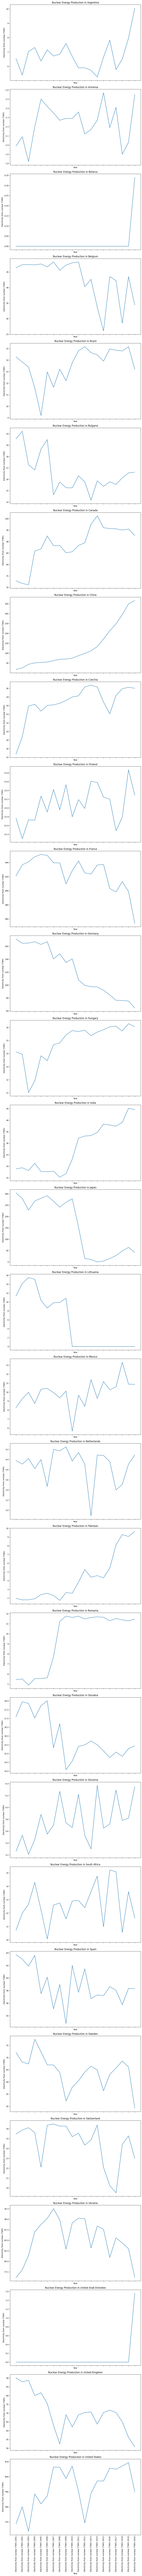

In [59]:
paises = nuclear['Country'].unique()

años = nuclear.columns[2:].astype(str)

fig, axes = plt.subplots(len(paises), figsize=(10, 6*len(paises)), sharex=True)

for i, pais in enumerate(paises):

    df_pais = nuclear[nuclear['Country'] == pais]

    valores = df_pais.iloc[0, 2:]

    axes[i].plot(años, valores)
    axes[i].set_xticks(años)
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Electricity from nuclear (TWh)')
    axes[i].set_title(f'Nuclear Energy Production in {pais}')
    axes[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

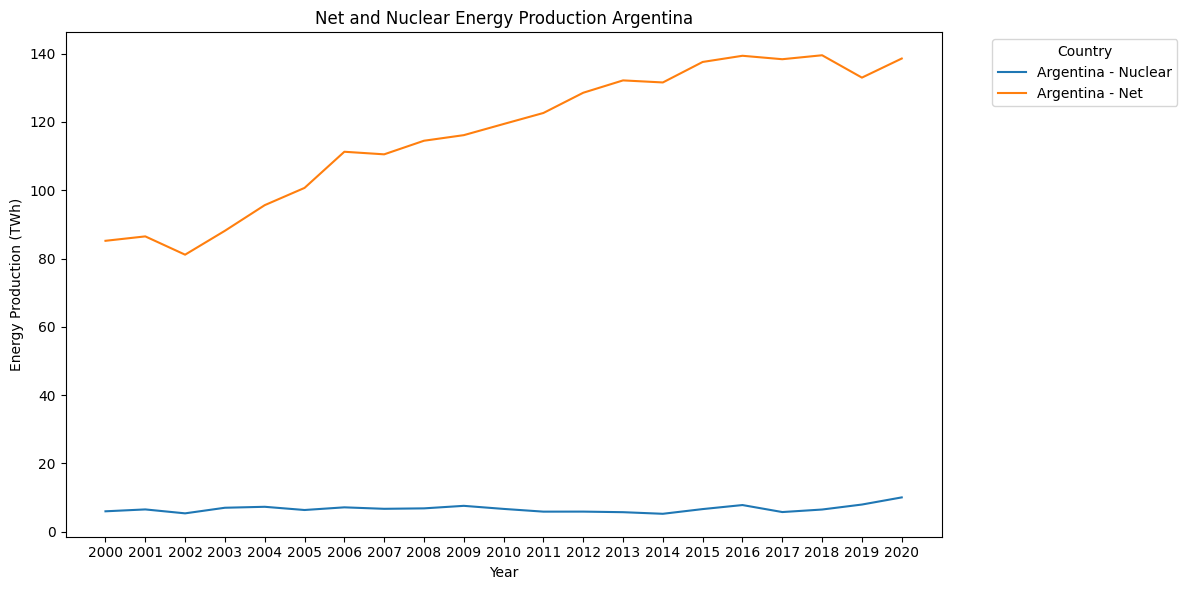

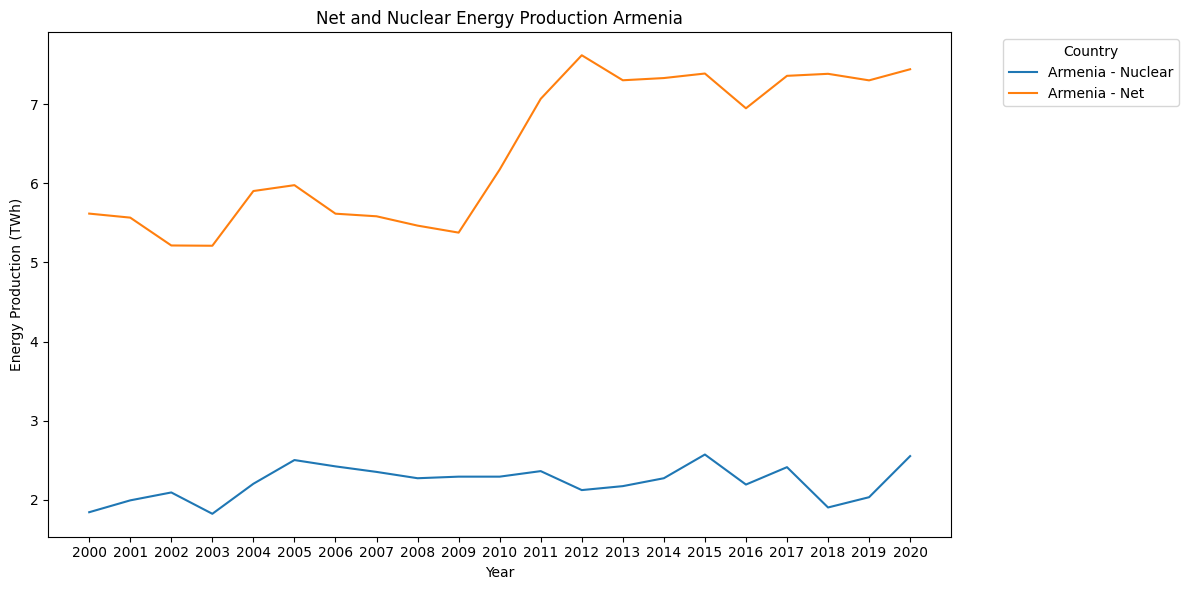

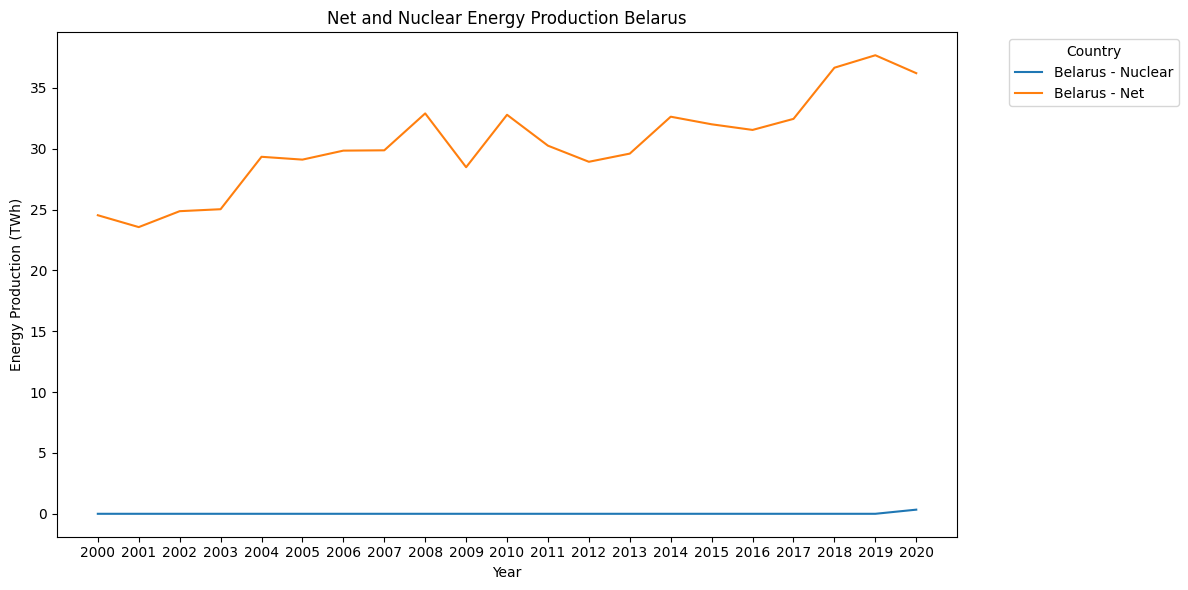

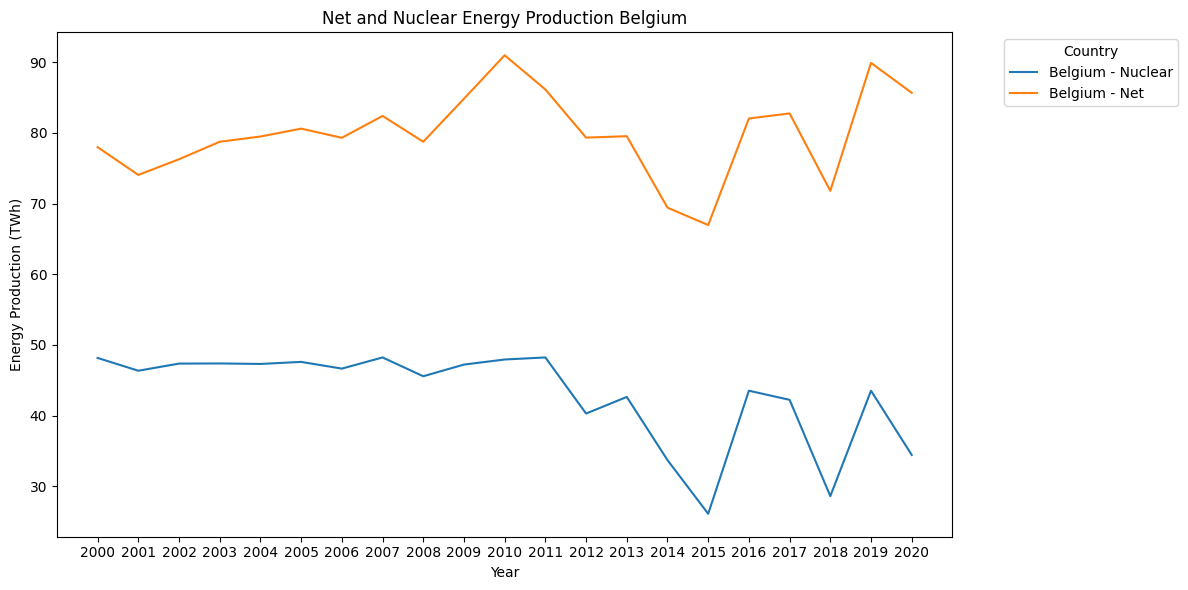

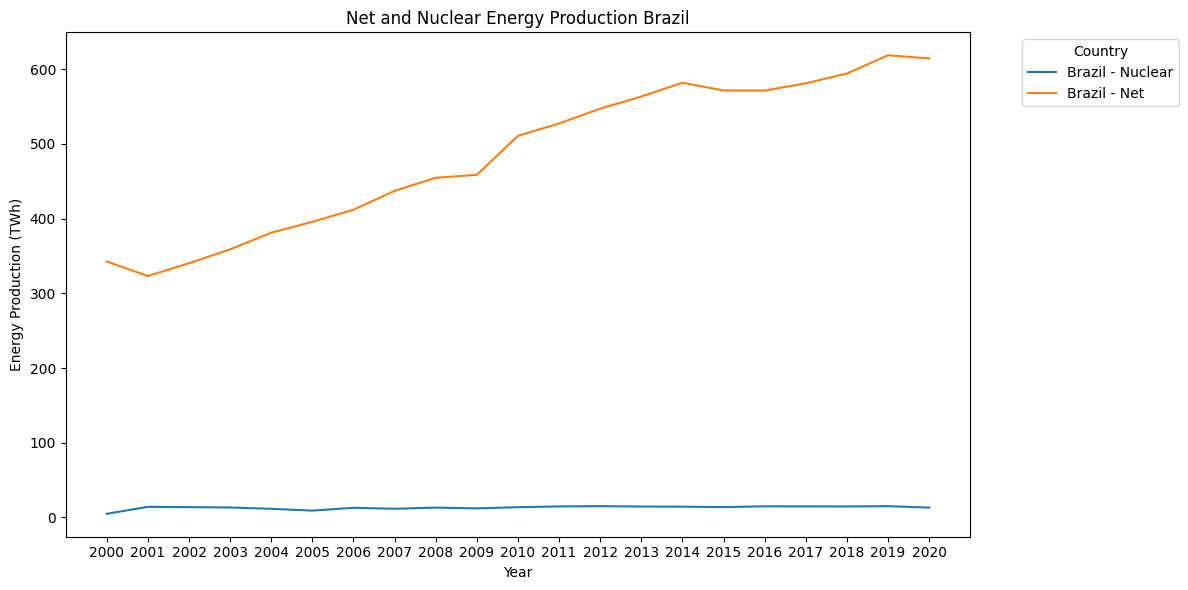

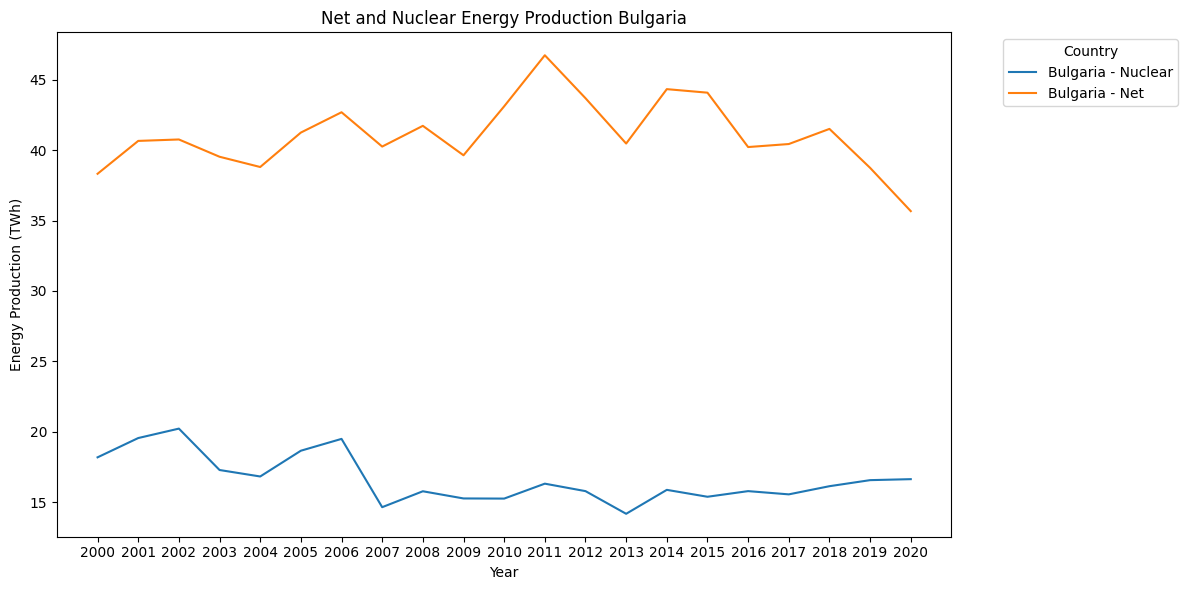

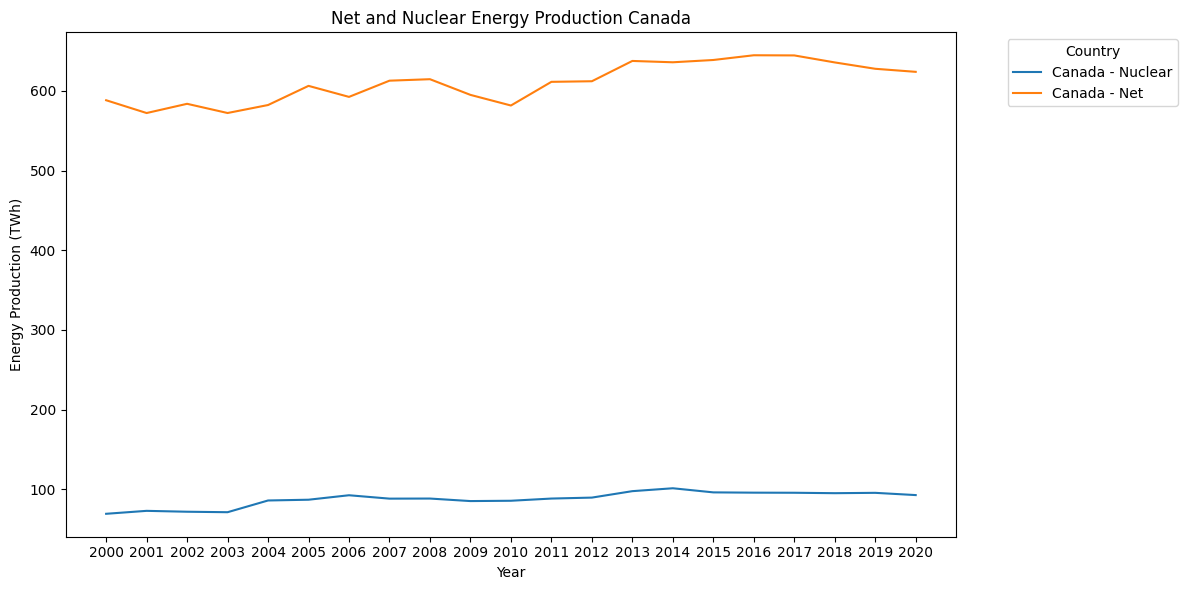

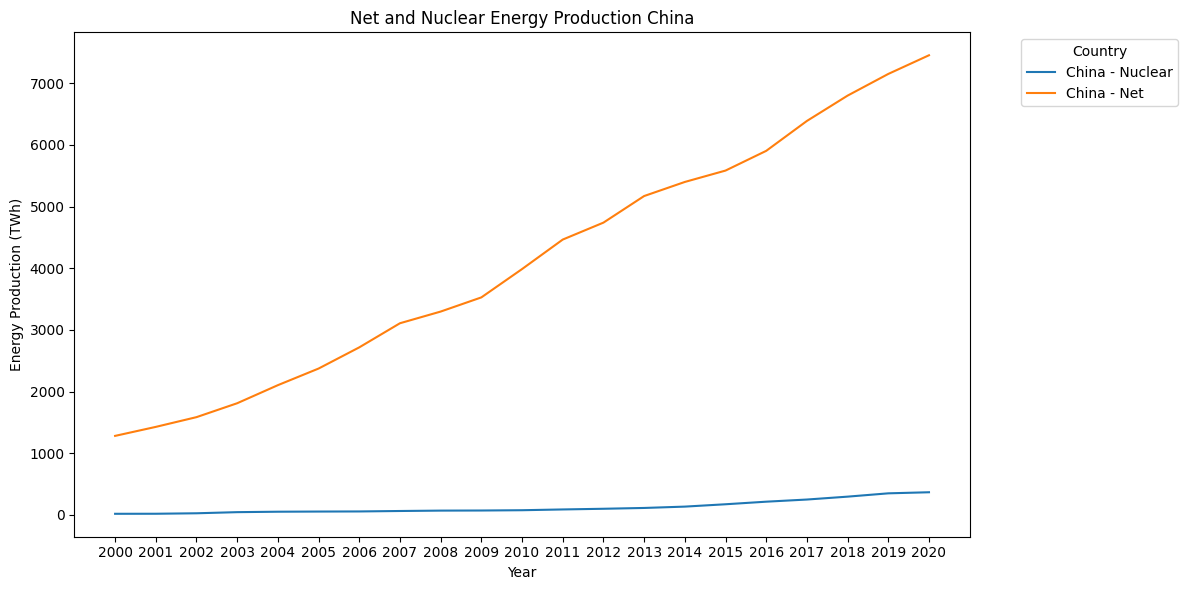

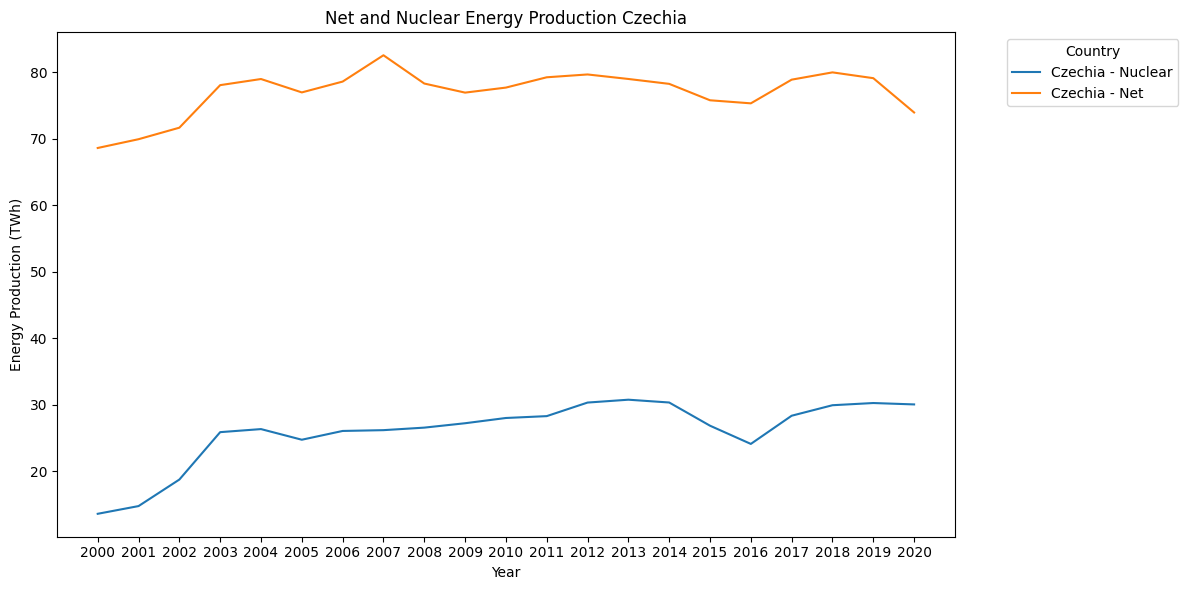

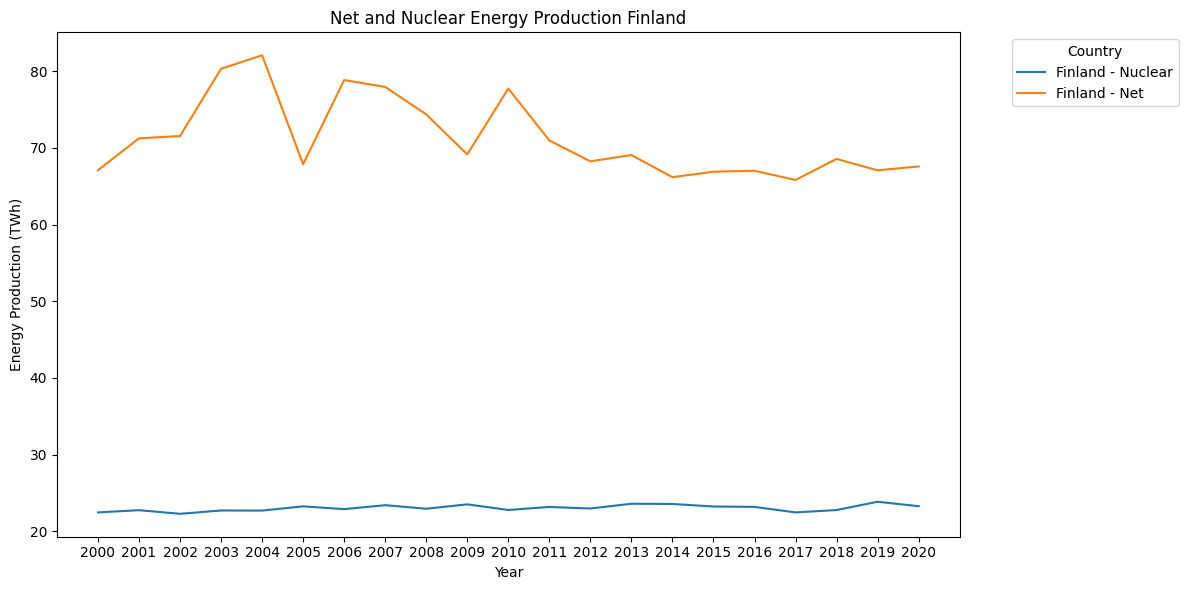

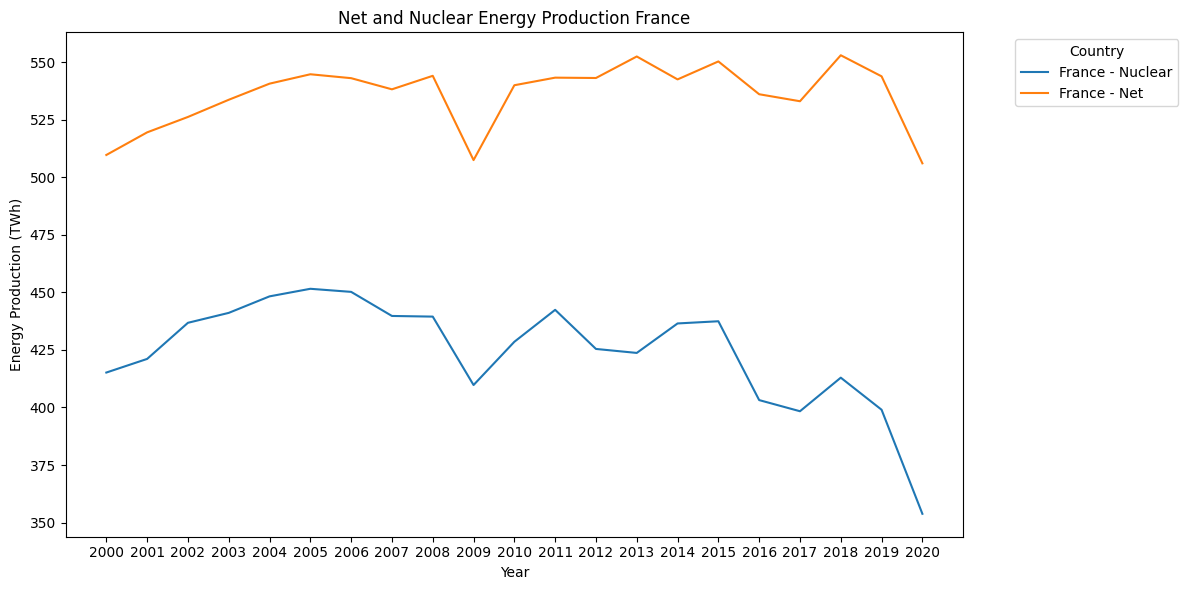

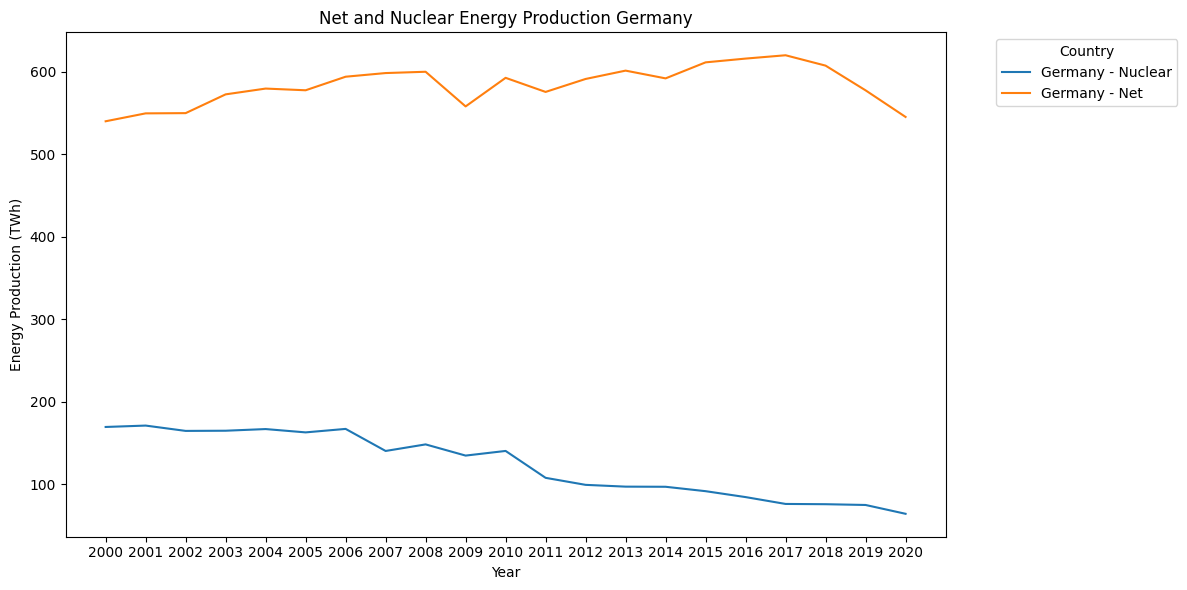

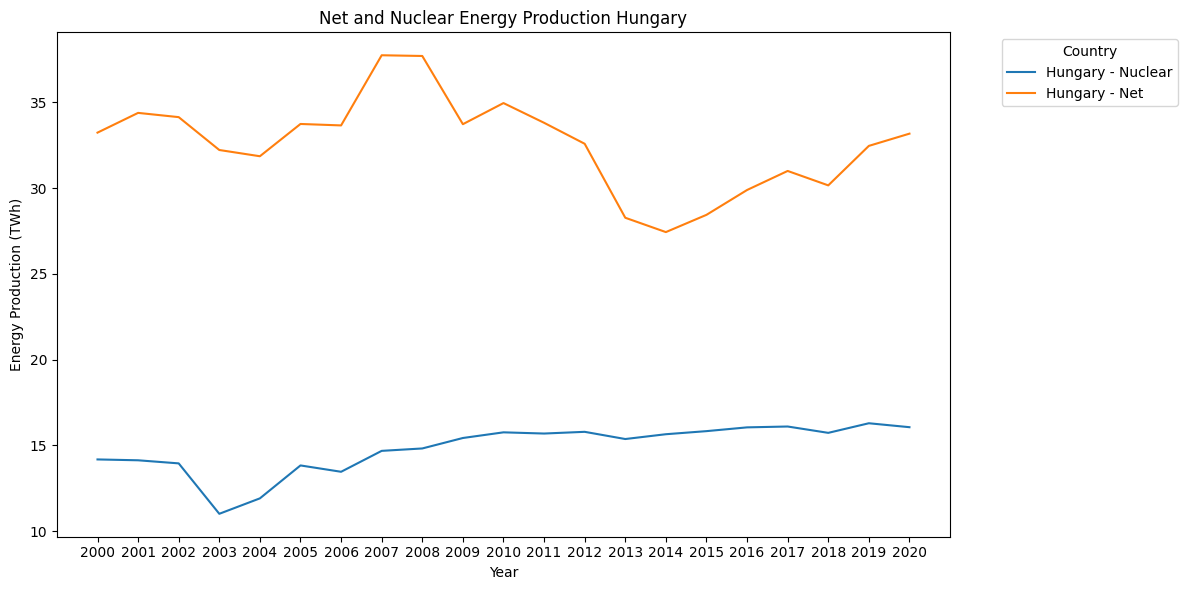

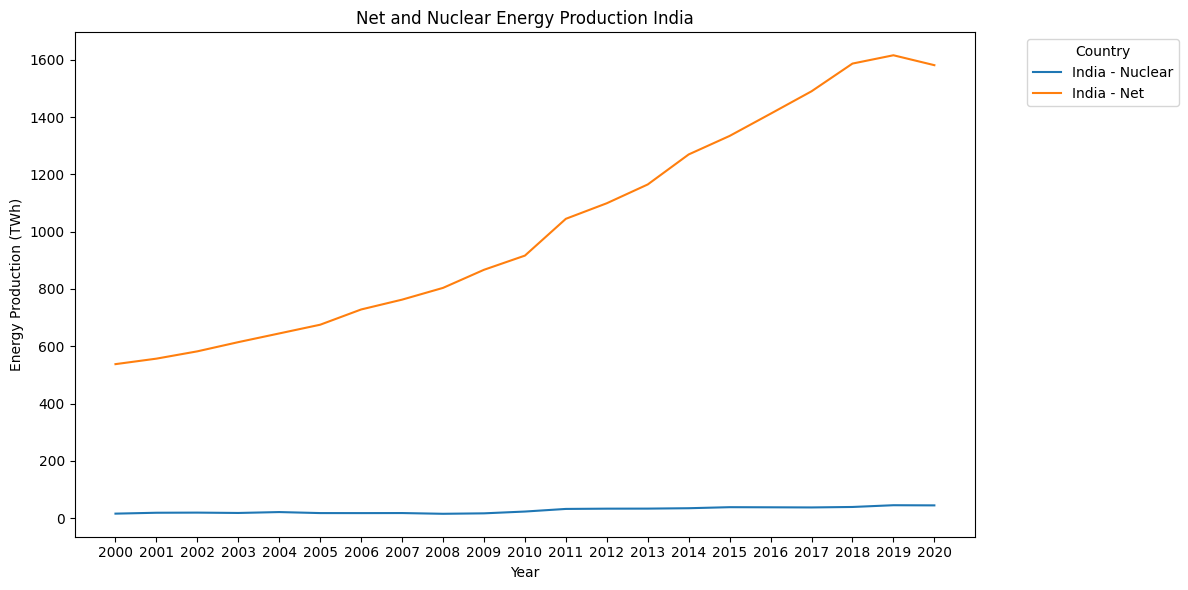

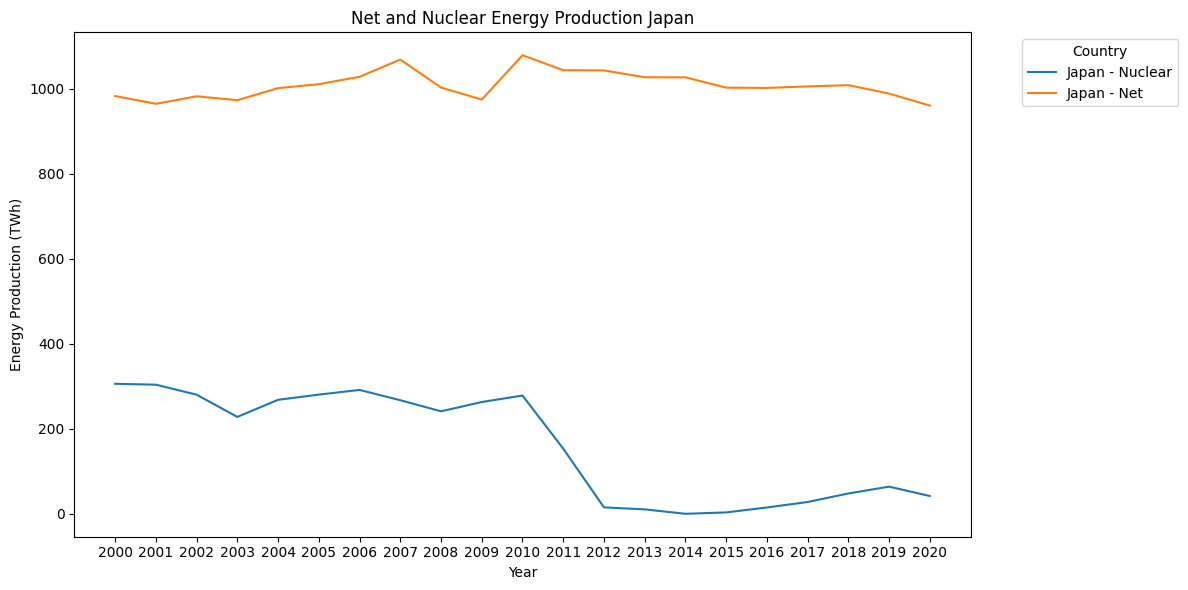

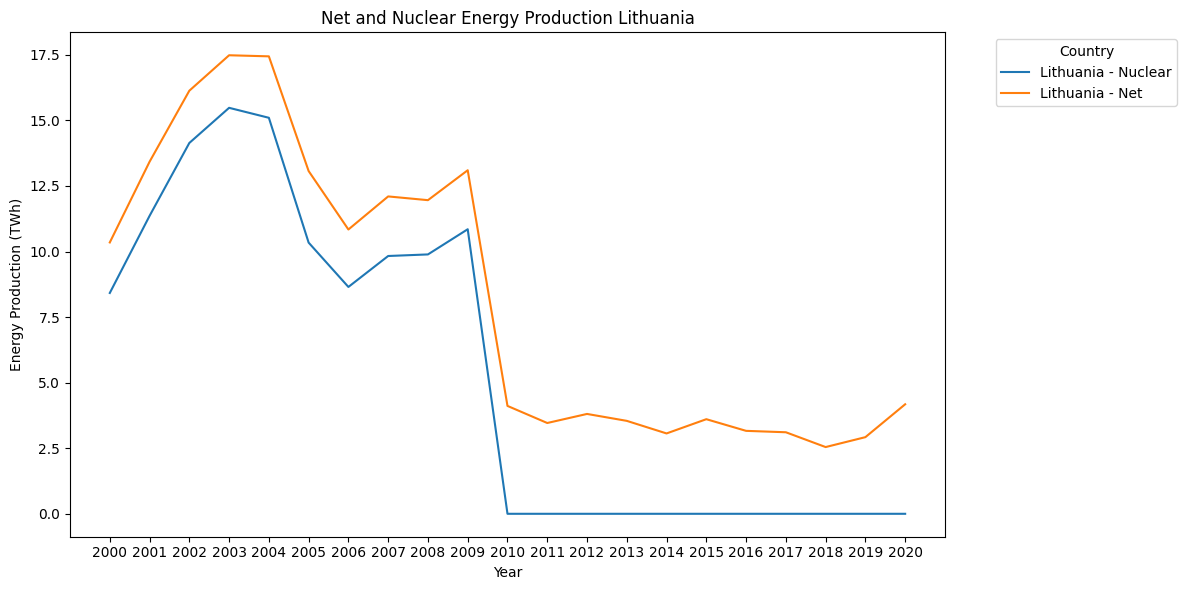

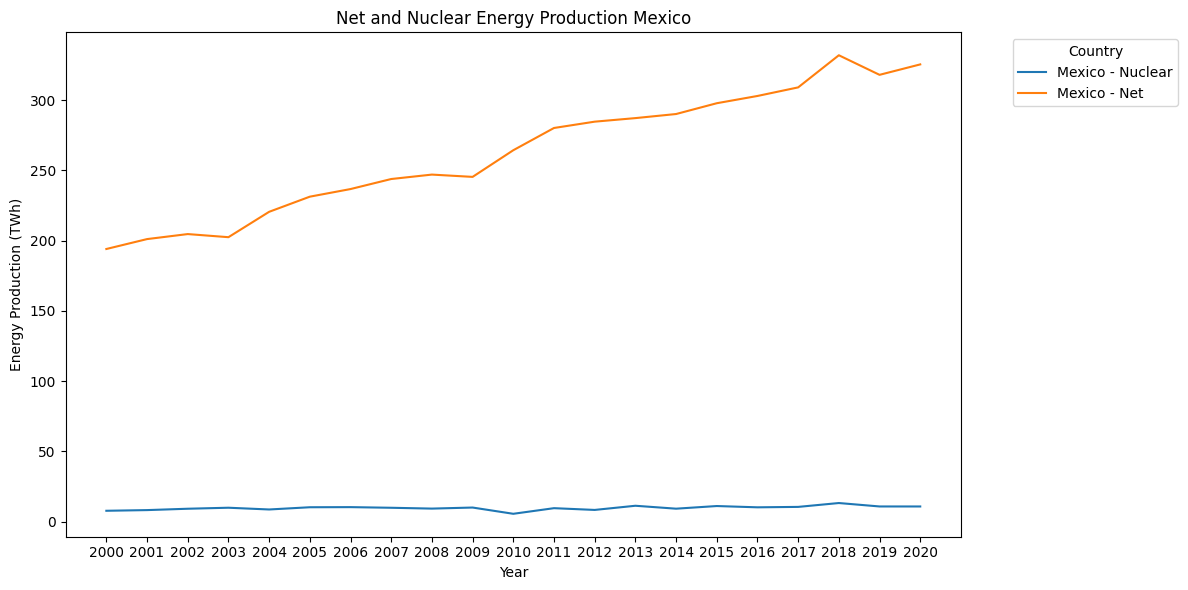

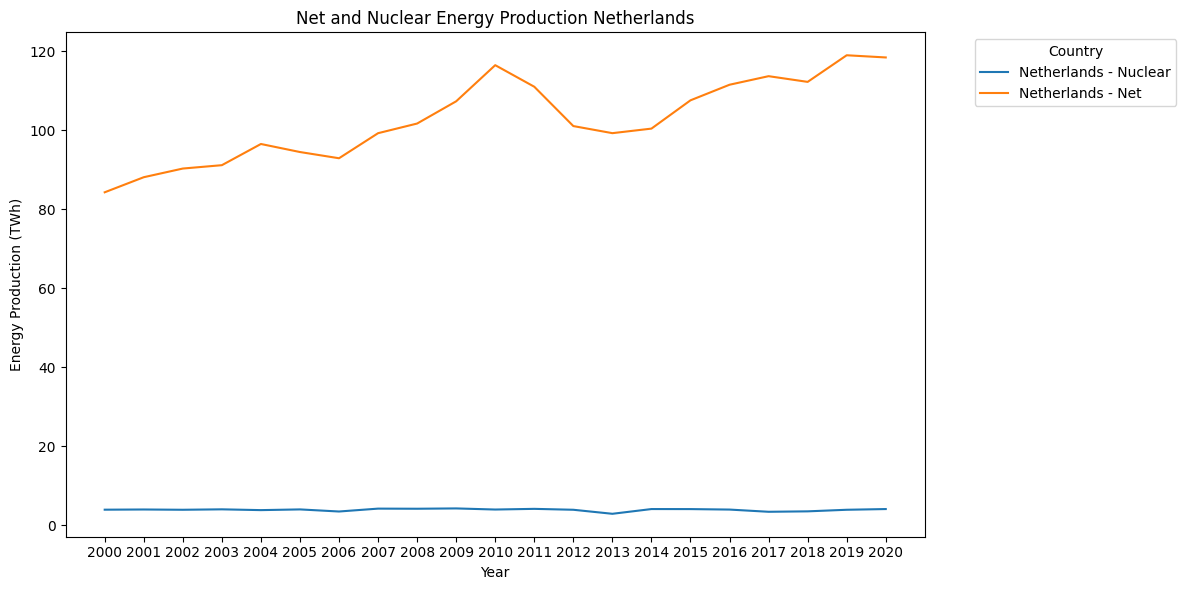

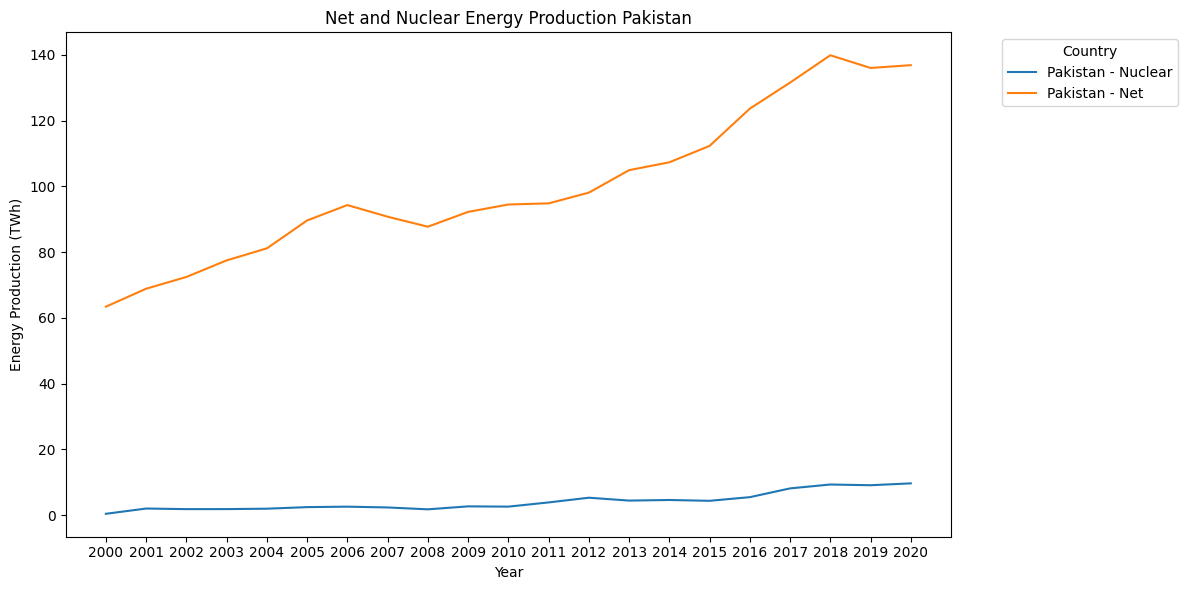

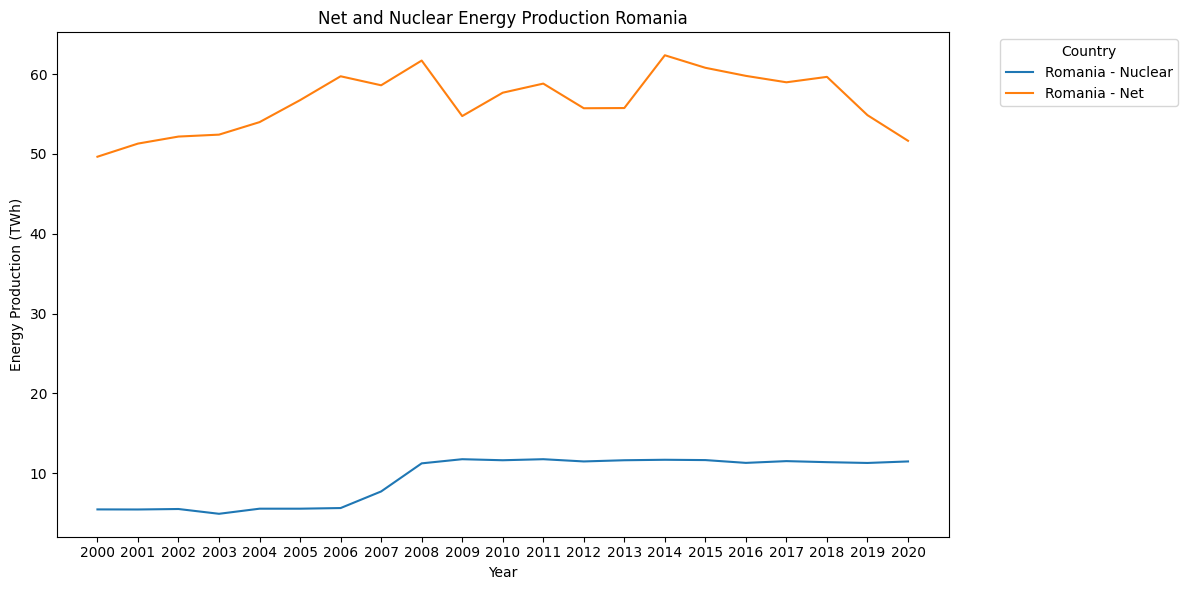

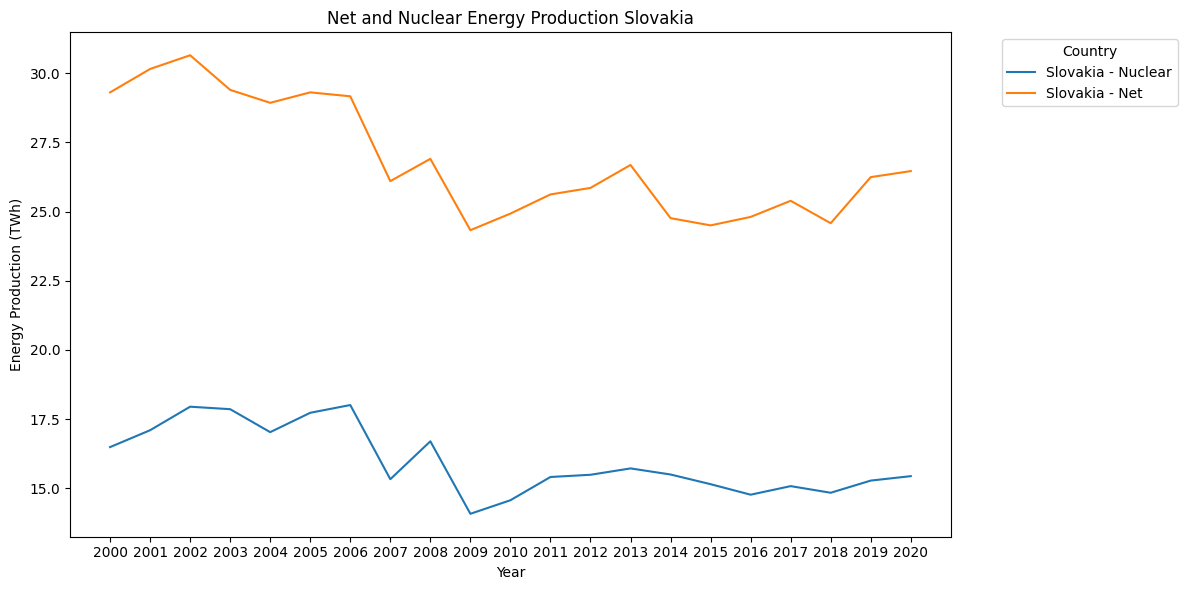

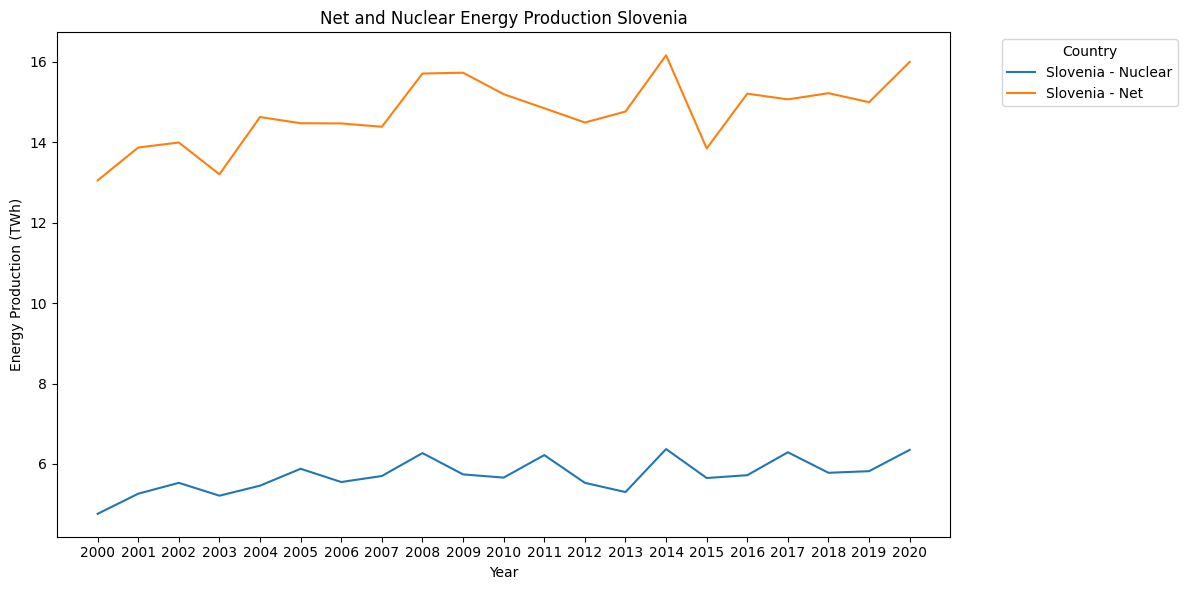

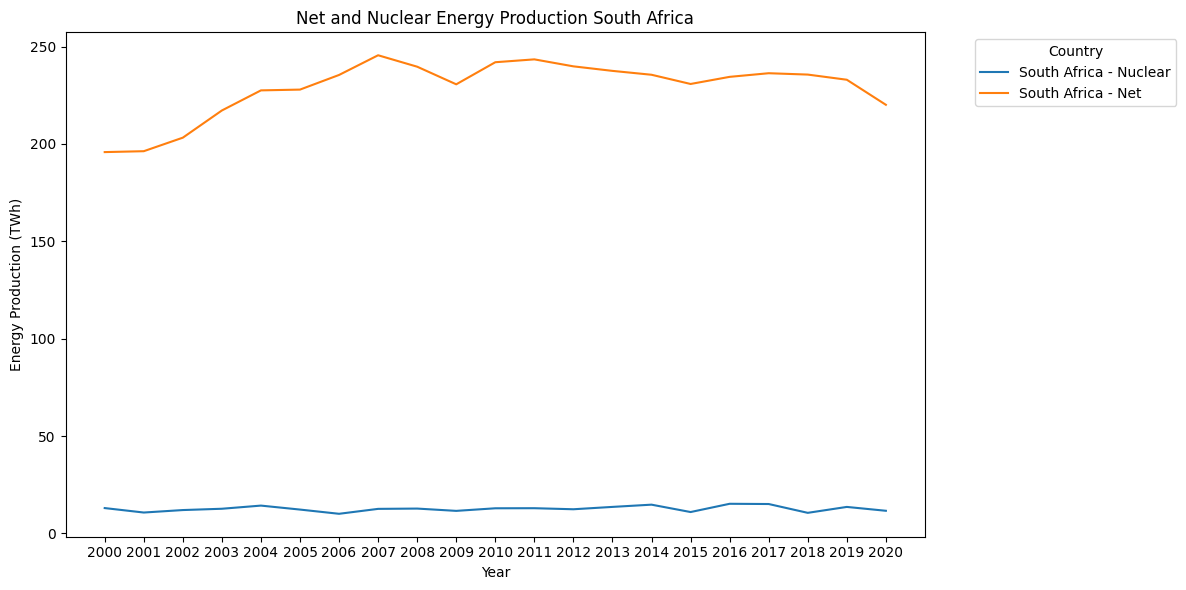

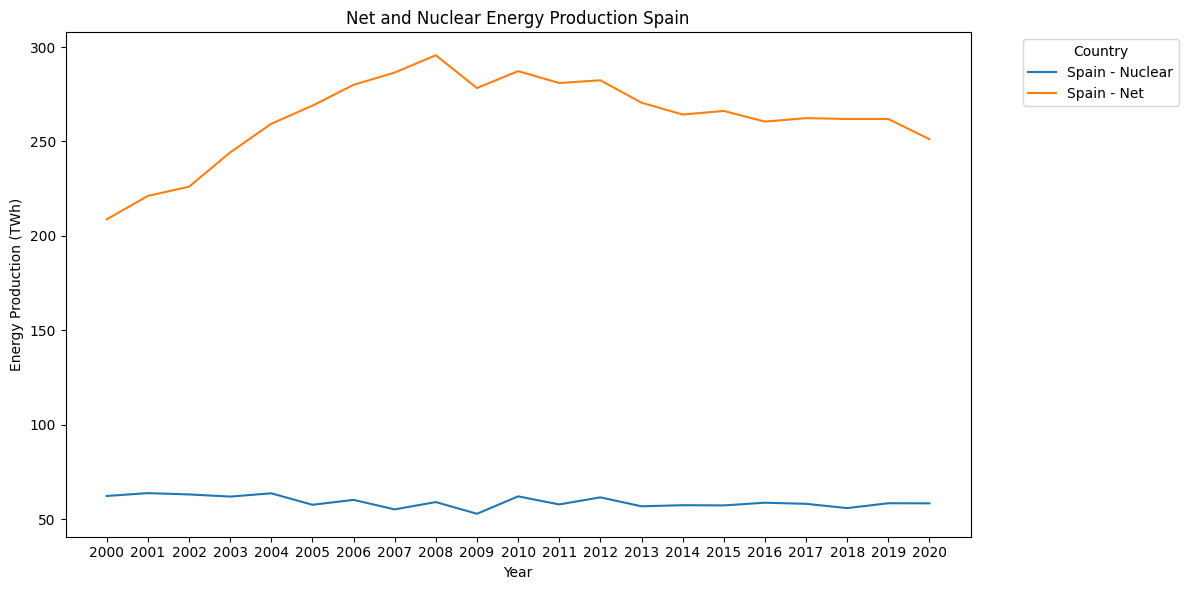

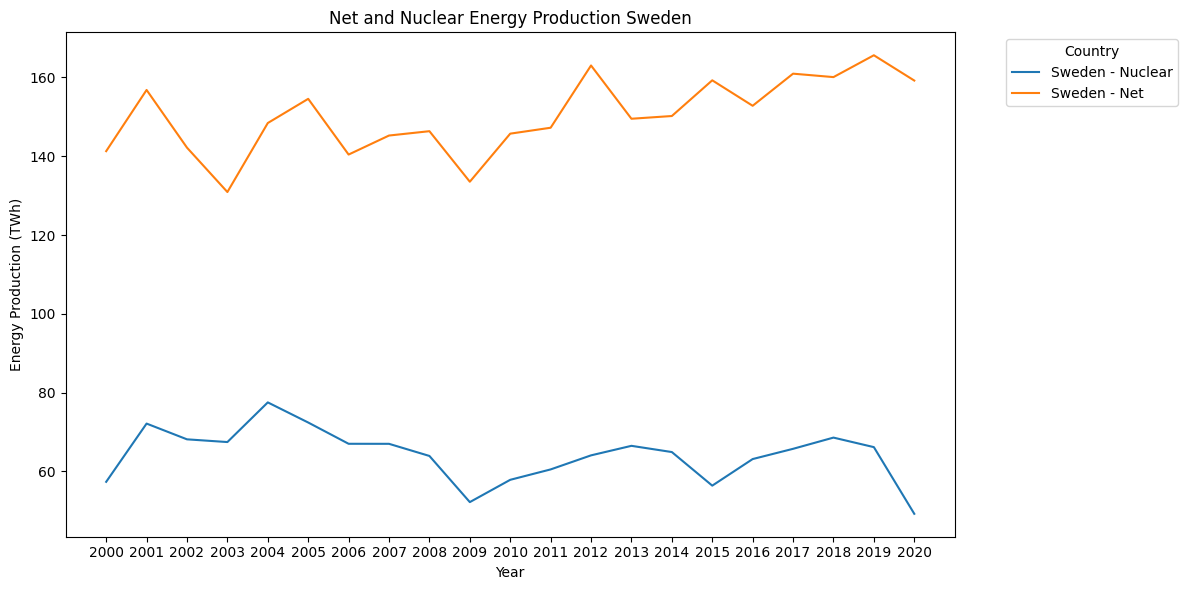

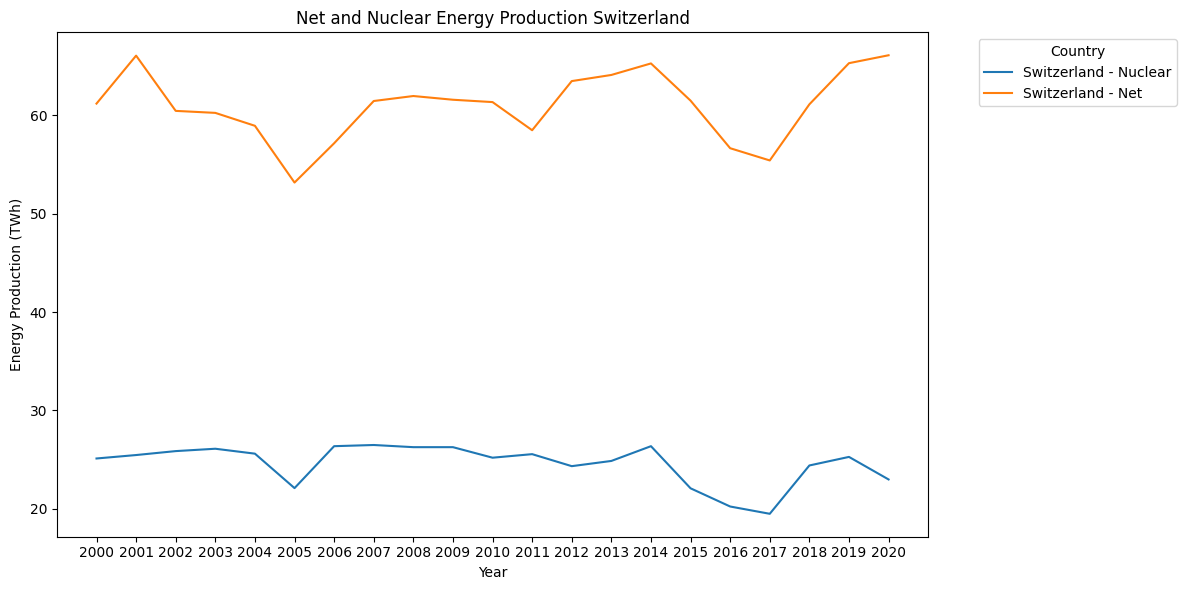

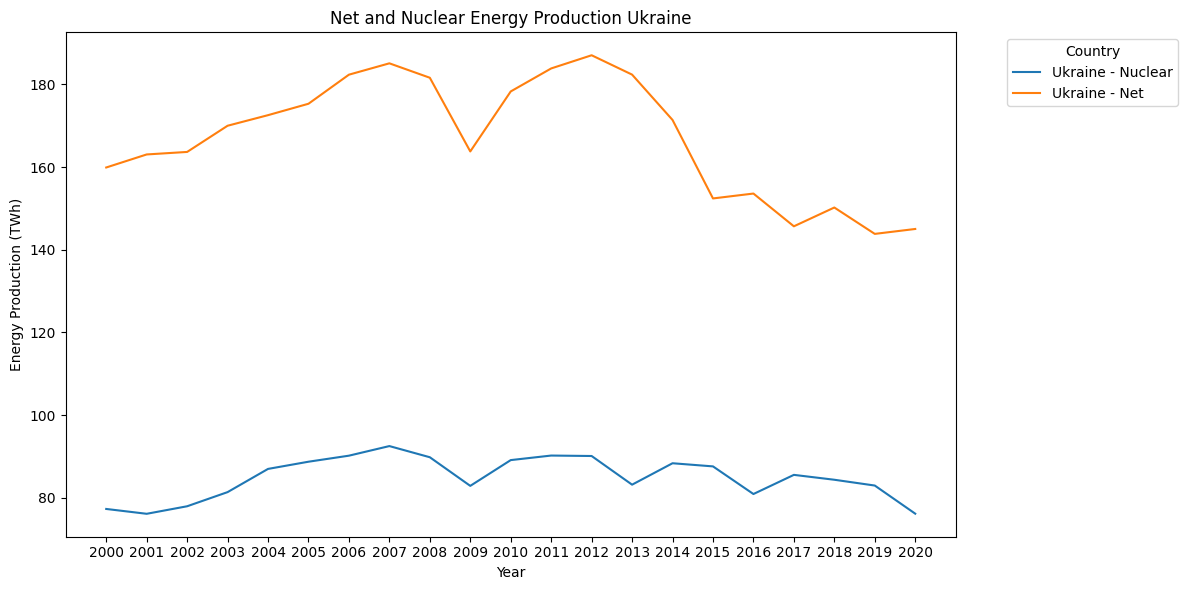

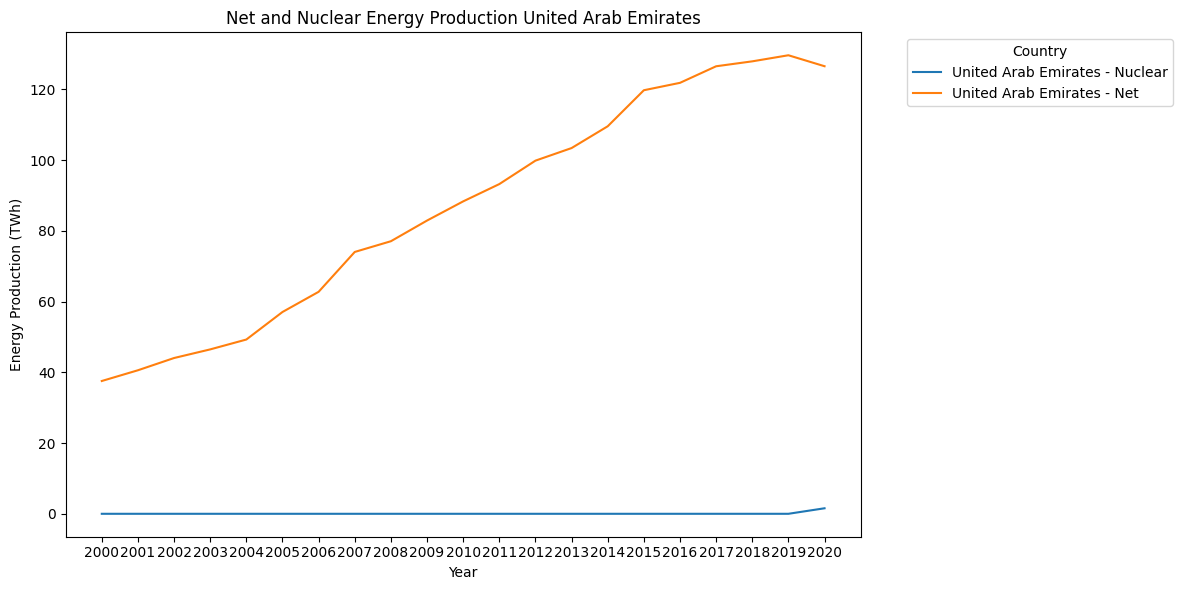

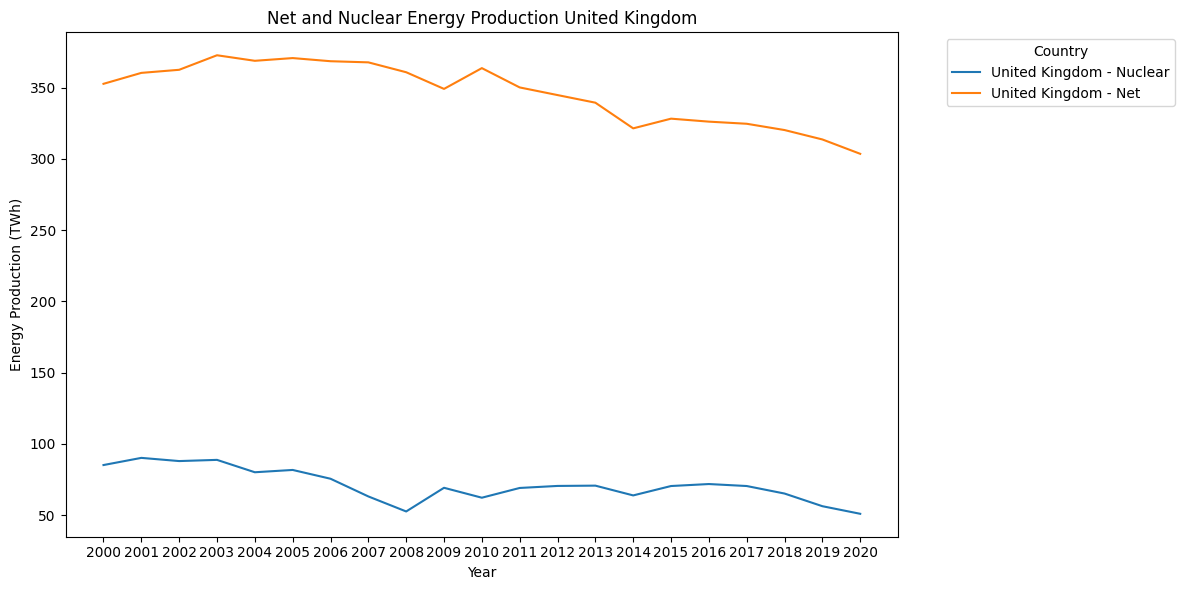

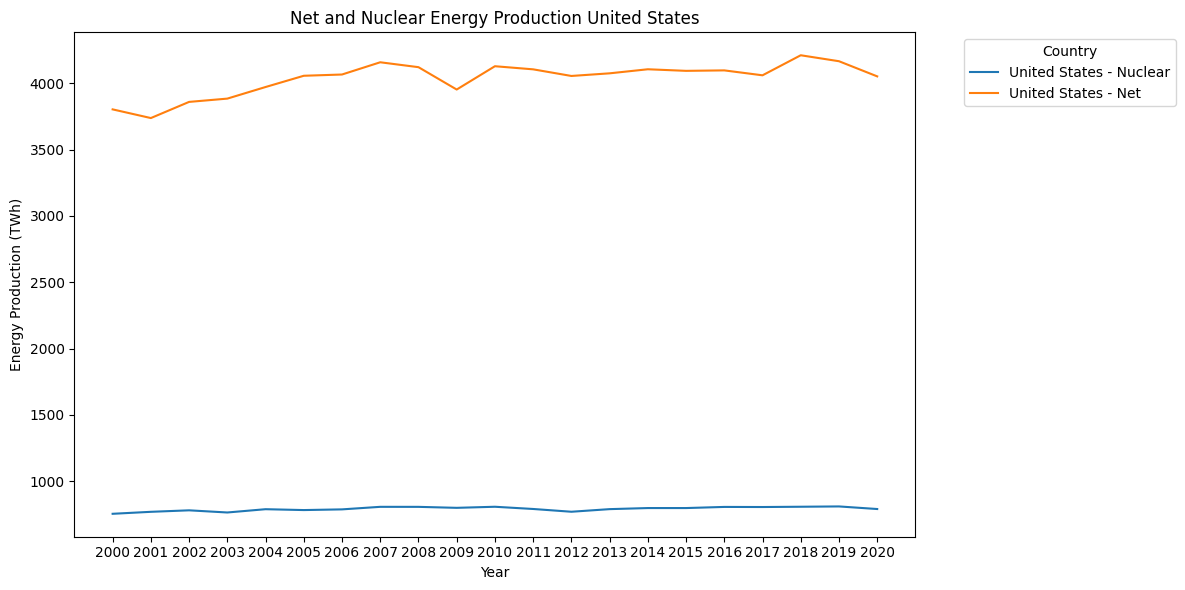

In [60]:
merged_df = pd.merge(nuclear, net, on='Country', suffixes=('_nuclear', '_net'))

countries = merged_df['Country']

data_columns_nuclear = merged_df.columns[1:22]
data_columns_net = merged_df.columns[22:]

for country in countries:

    data_nuclear = merged_df[merged_df['Country'] == country][data_columns_nuclear].values.flatten()
    data_net = merged_df[merged_df['Country'] == country][data_columns_net].values.flatten()

    years = range(2000, 2021)

    plt.figure(figsize=(12, 6))
    plt.plot(years, data_nuclear, label=f'{country} - Nuclear')
    plt.plot(years, data_net, label=f'{country} - Net')
    plt.title(f'Net and Nuclear Energy Production {country}')
    plt.xlabel('Year')
    plt.ylabel('Energy Production (TWh)')
    plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(years)
    plt.tight_layout()
    plt.show()

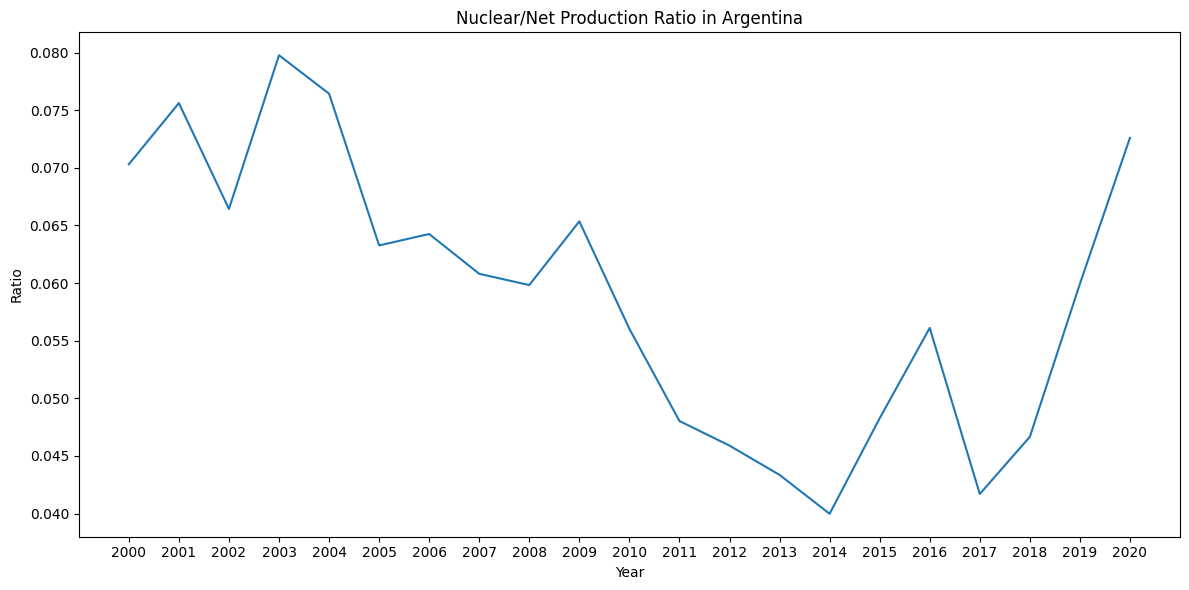

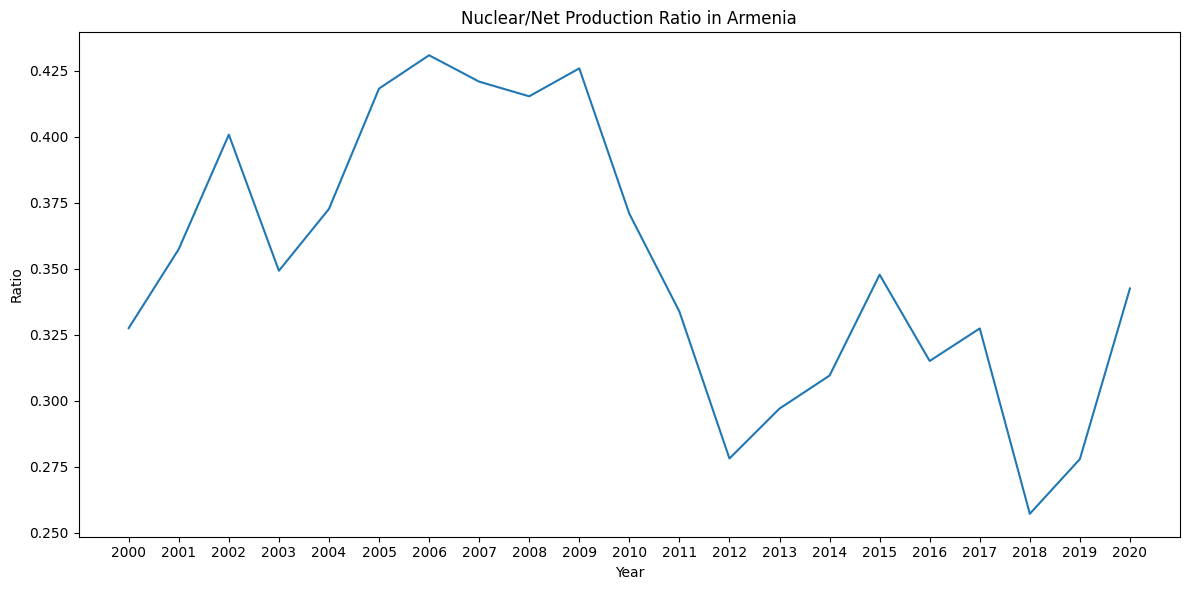

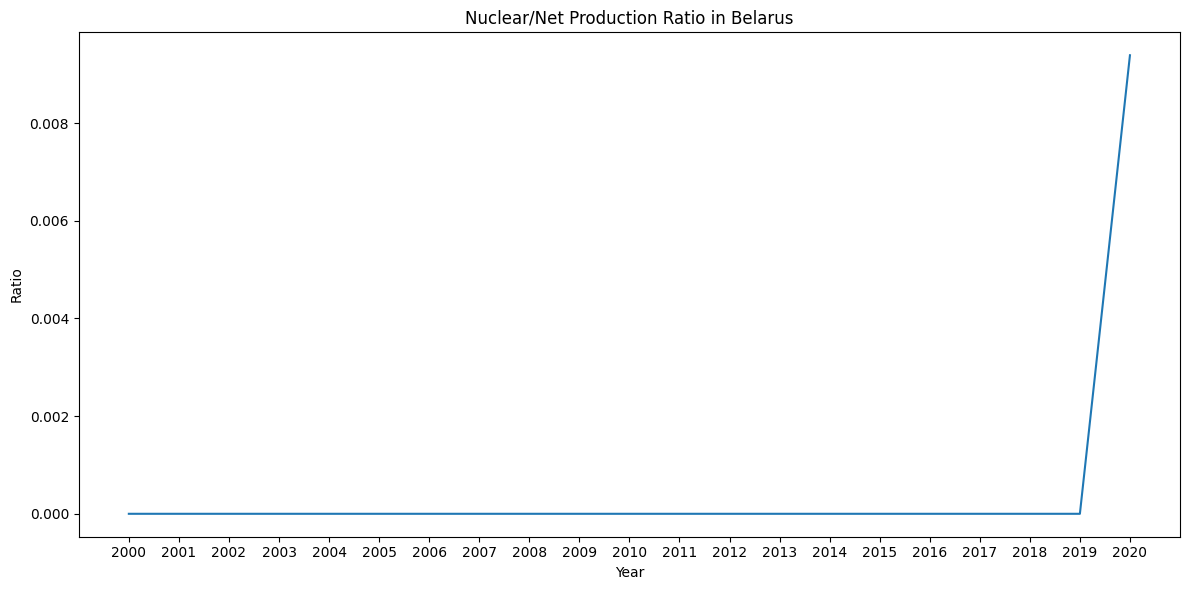

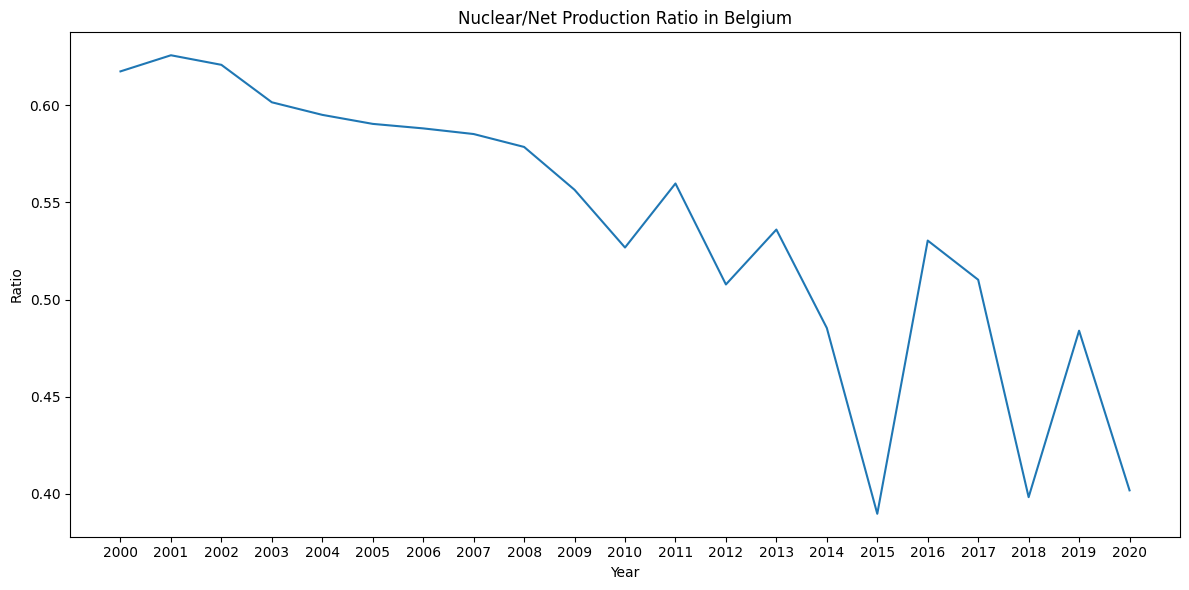

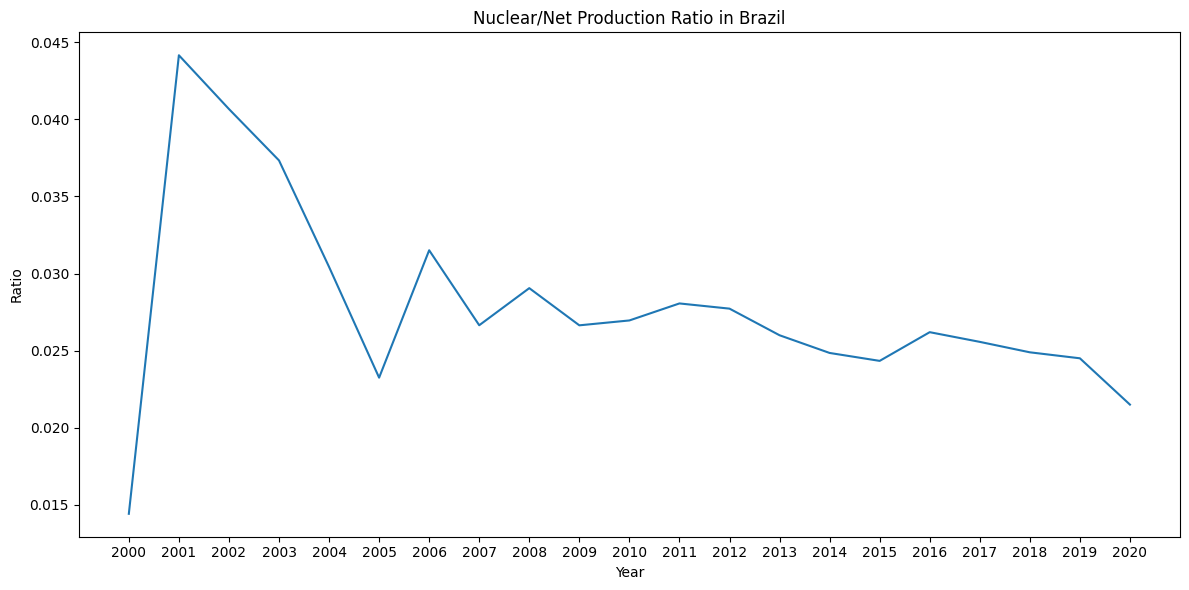

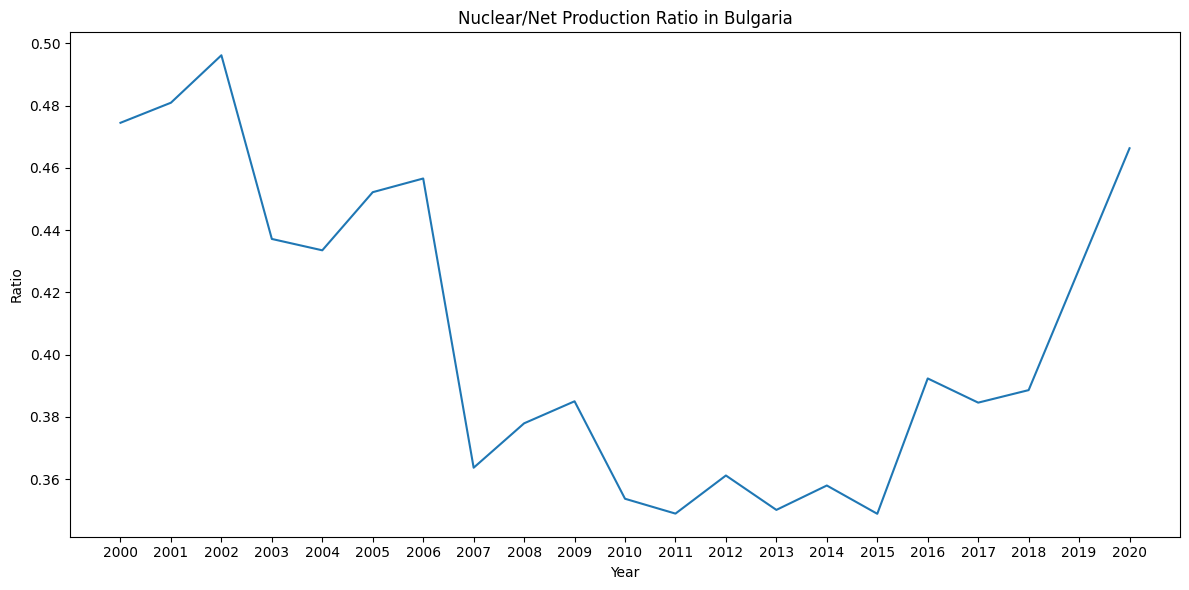

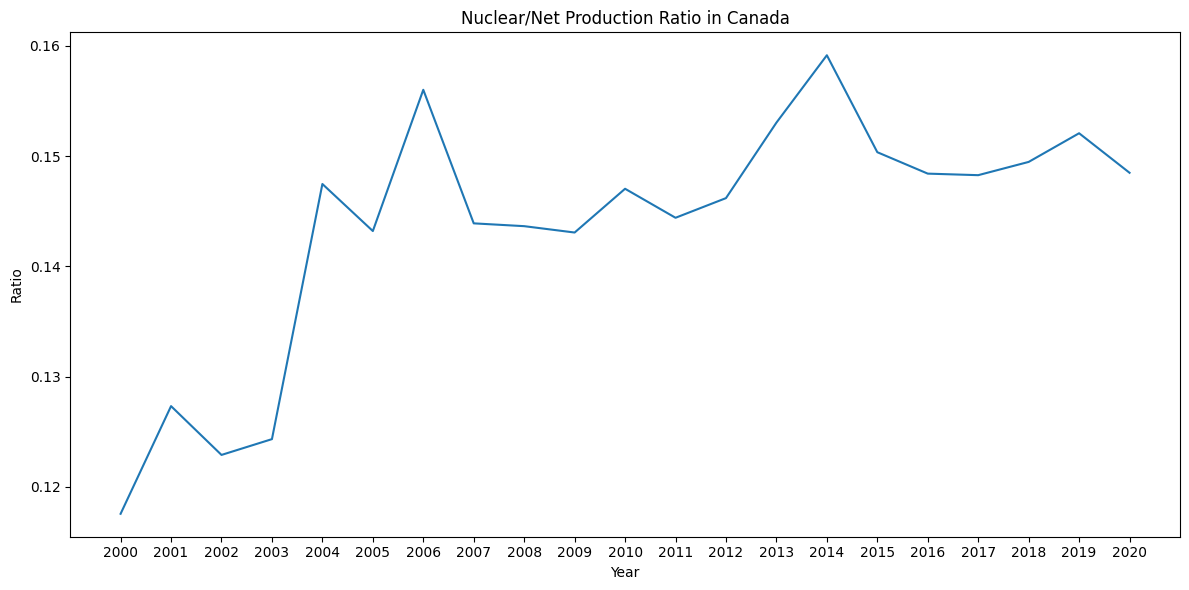

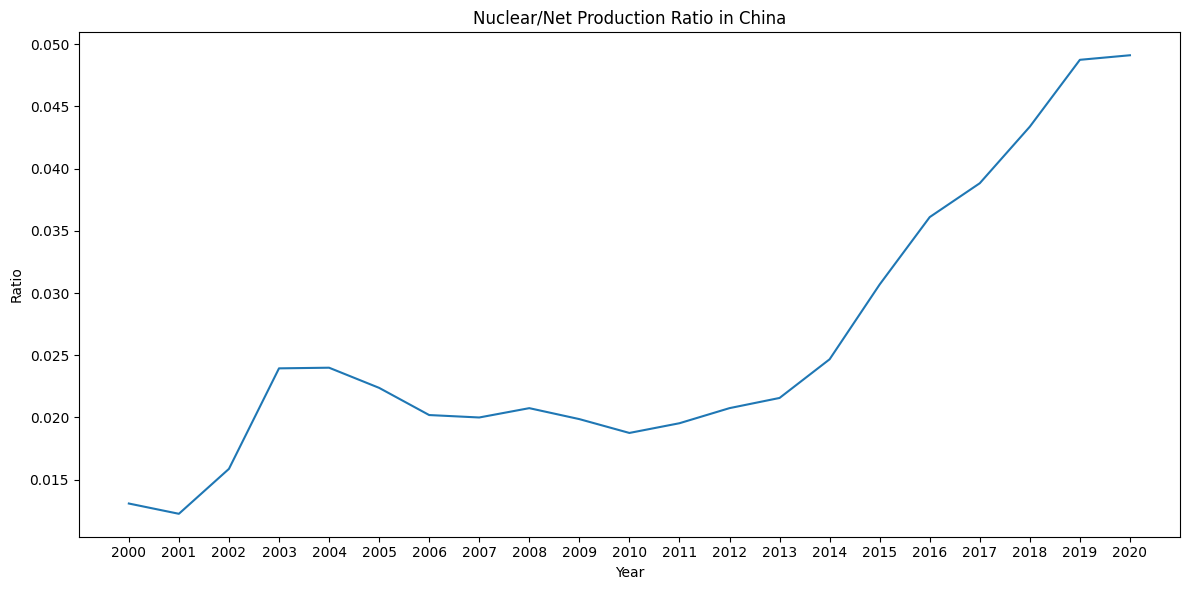

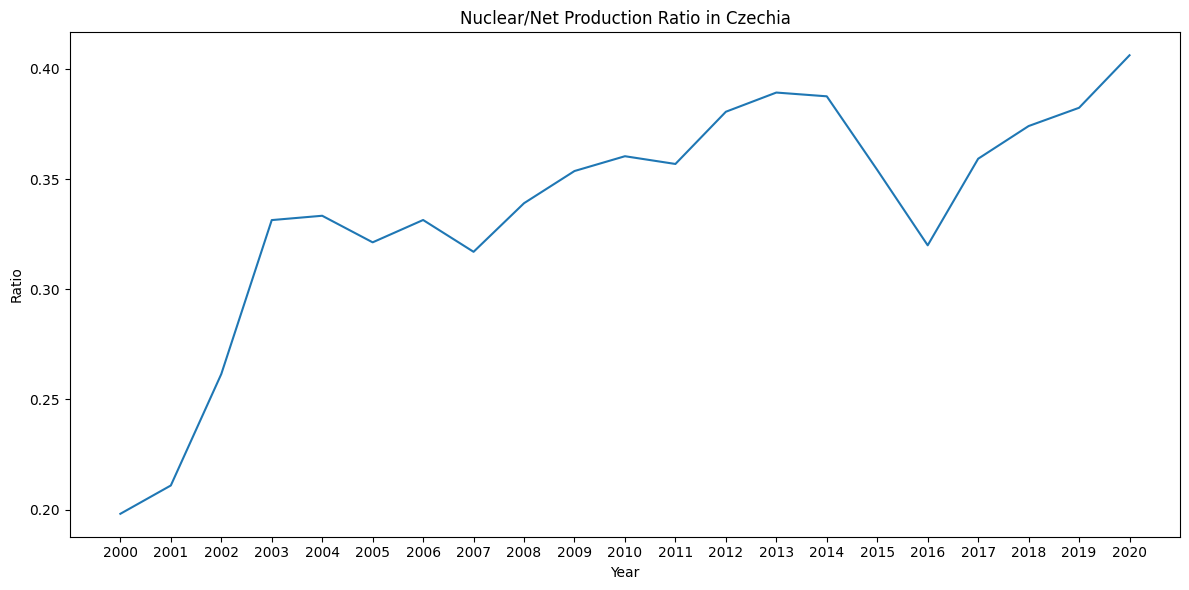

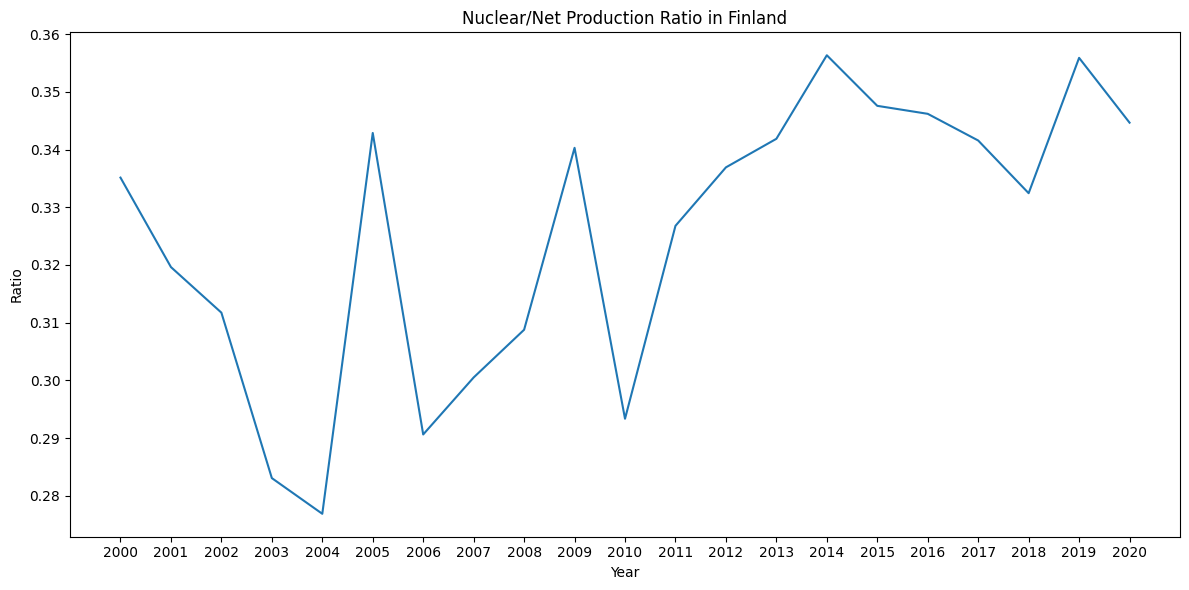

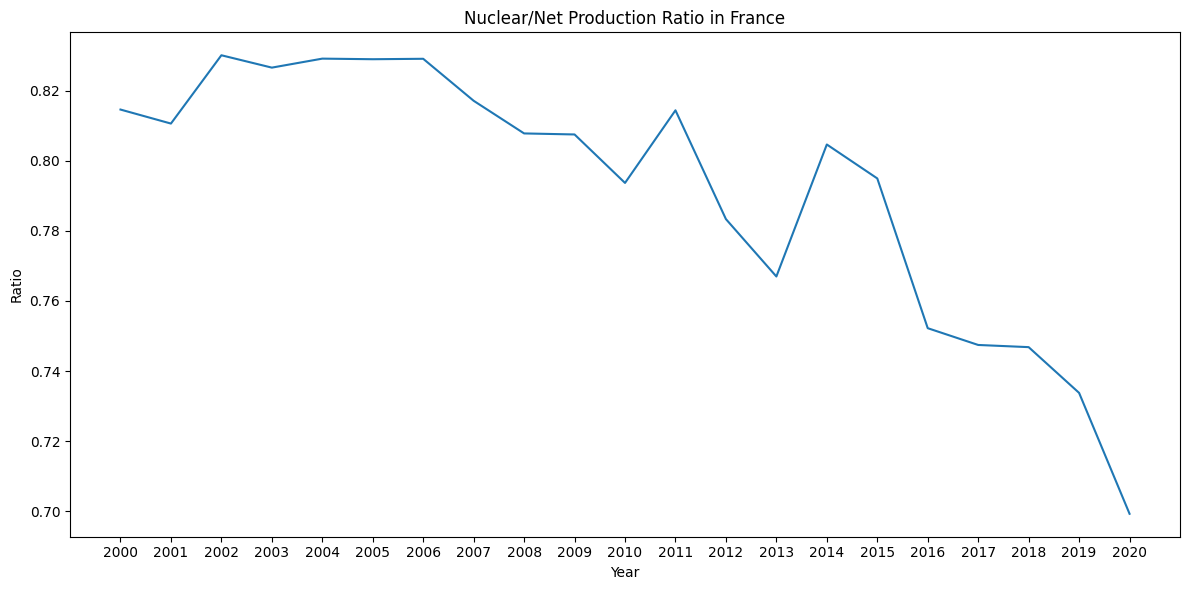

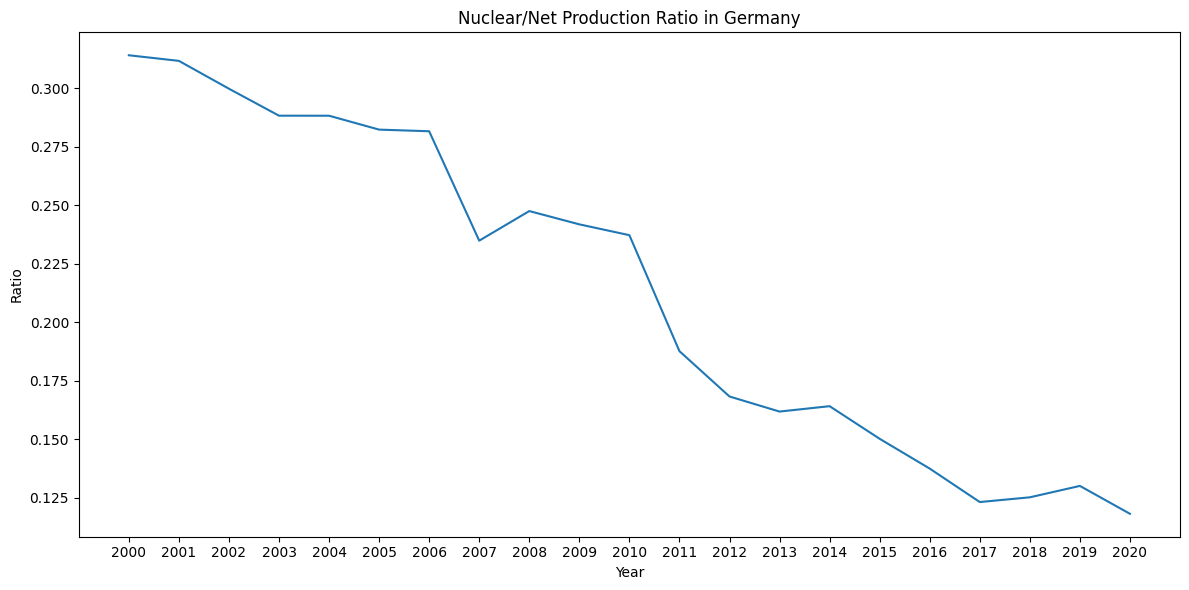

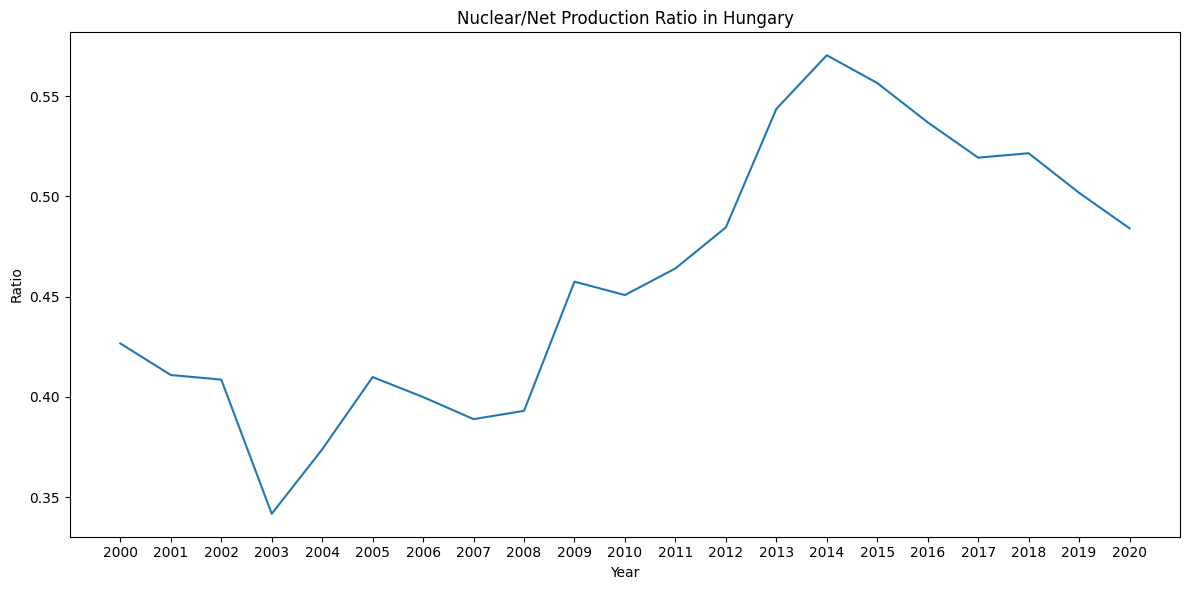

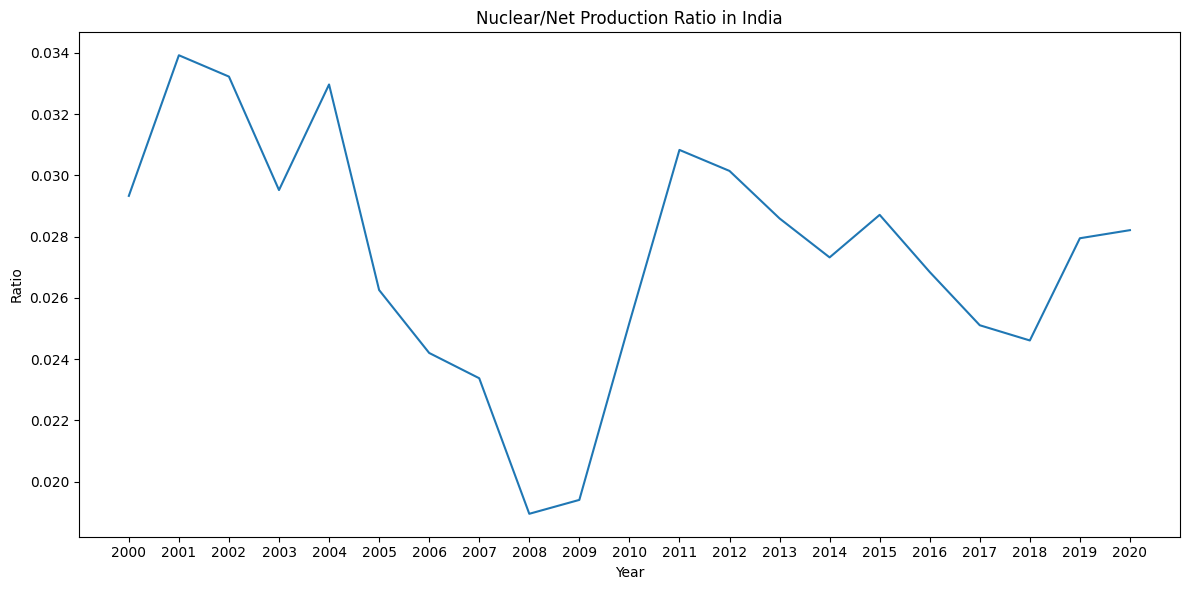

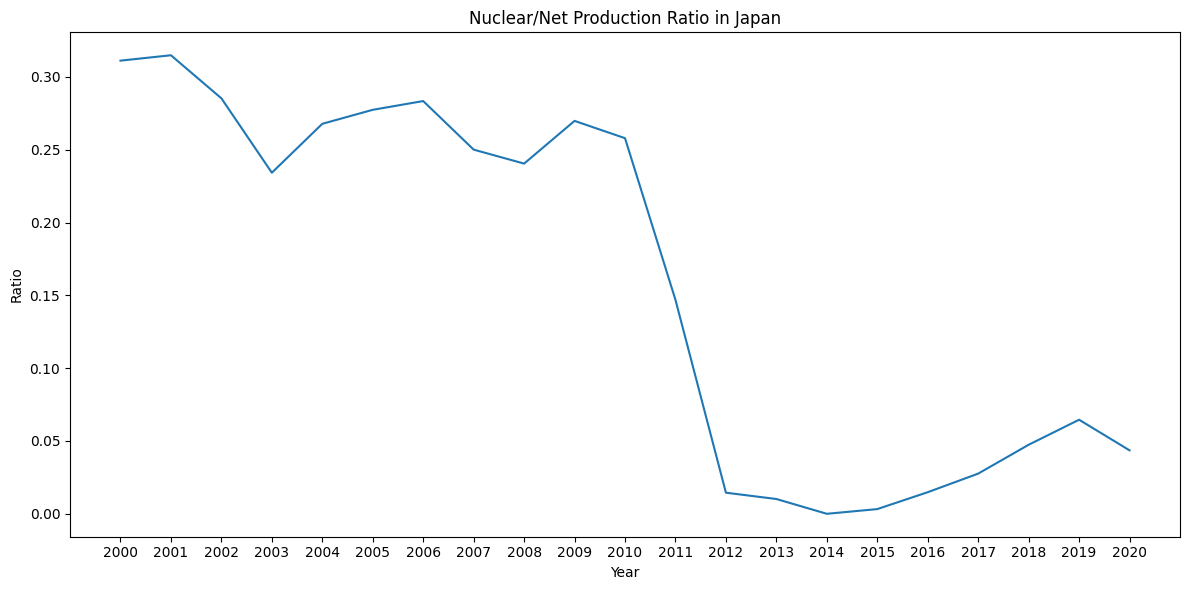

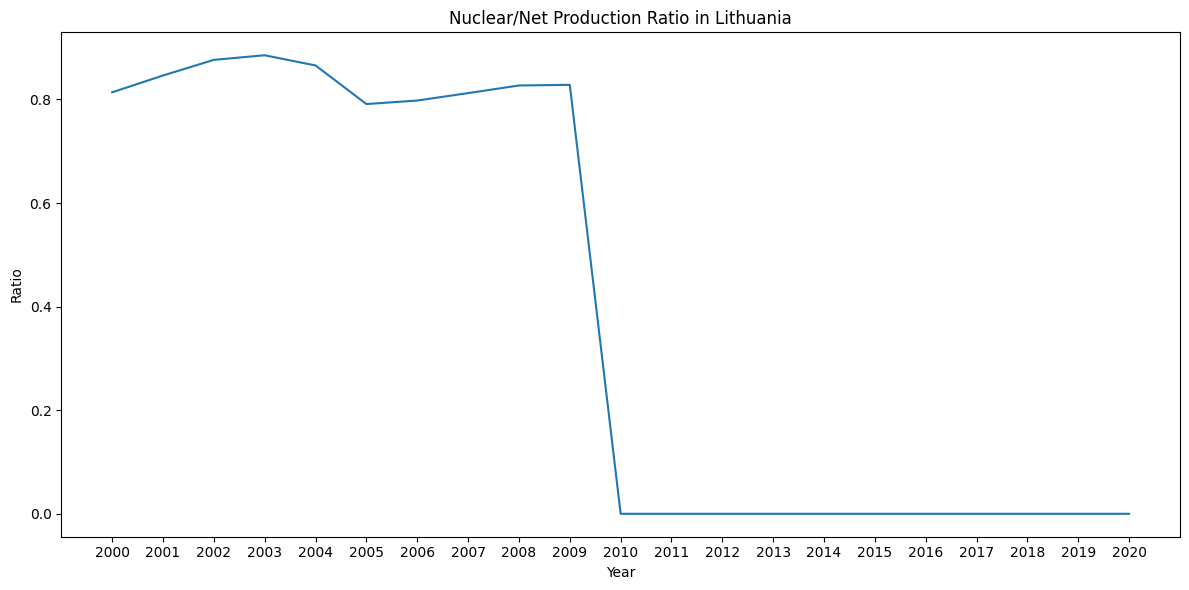

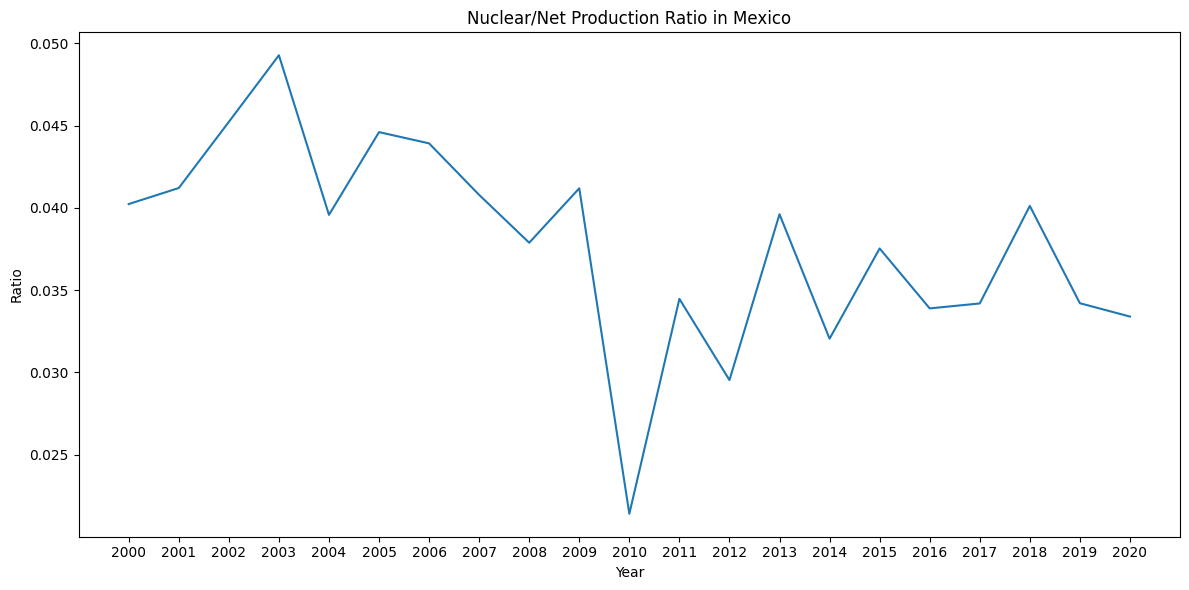

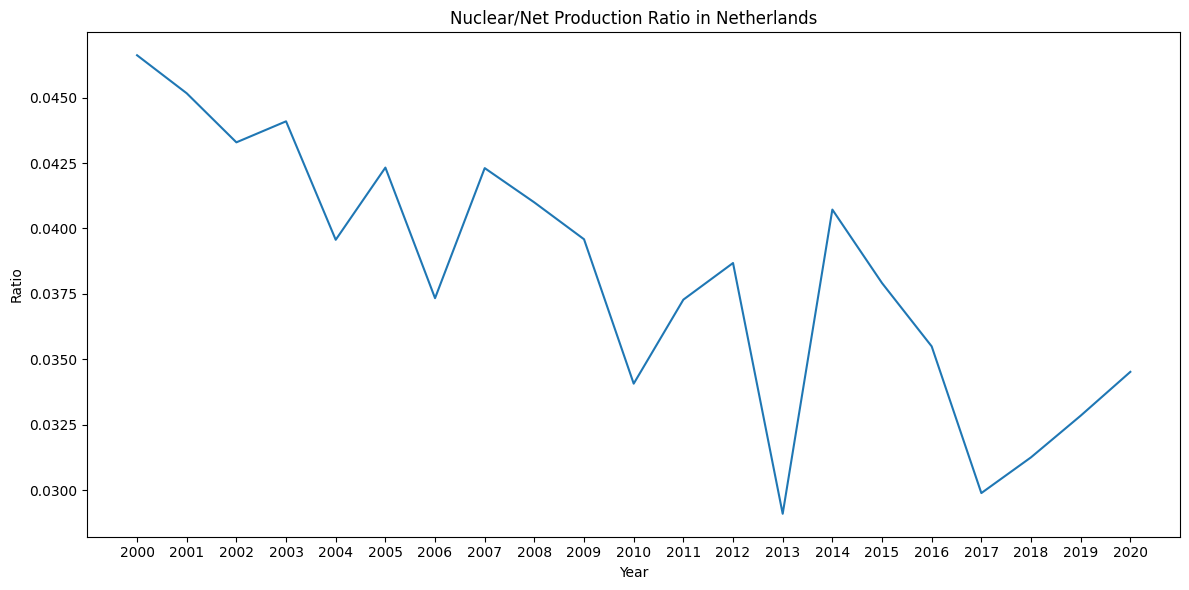

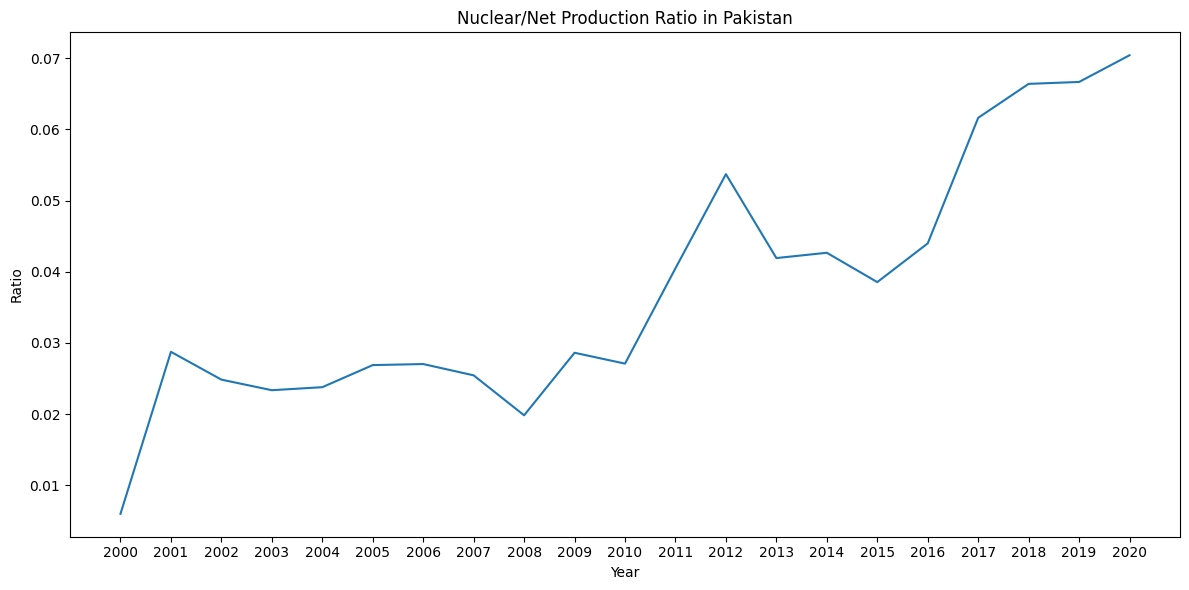

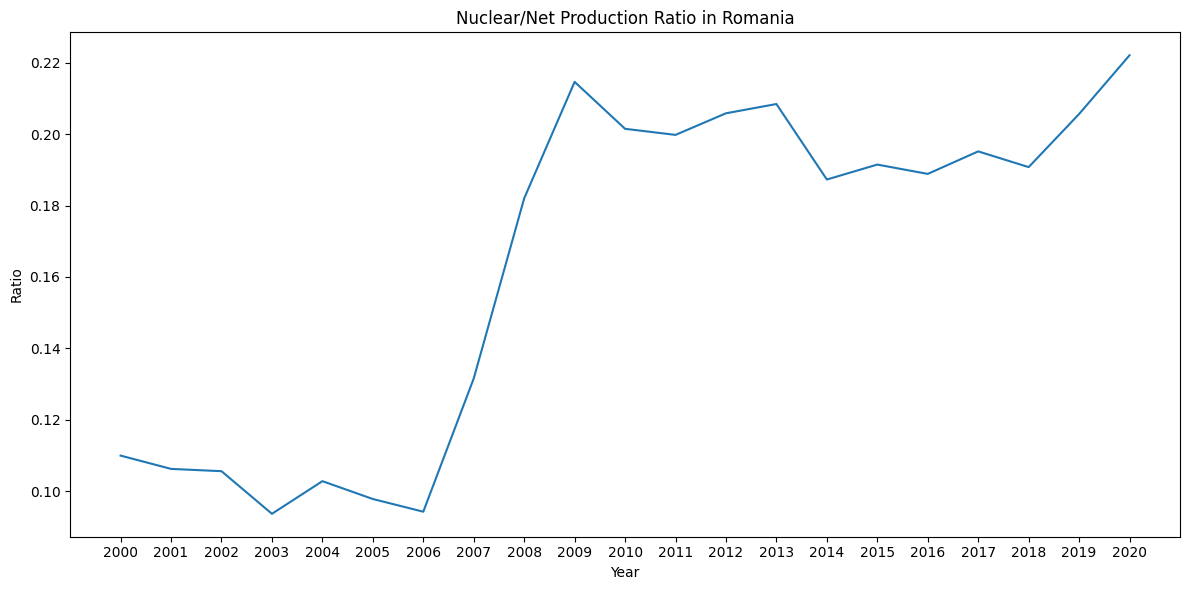

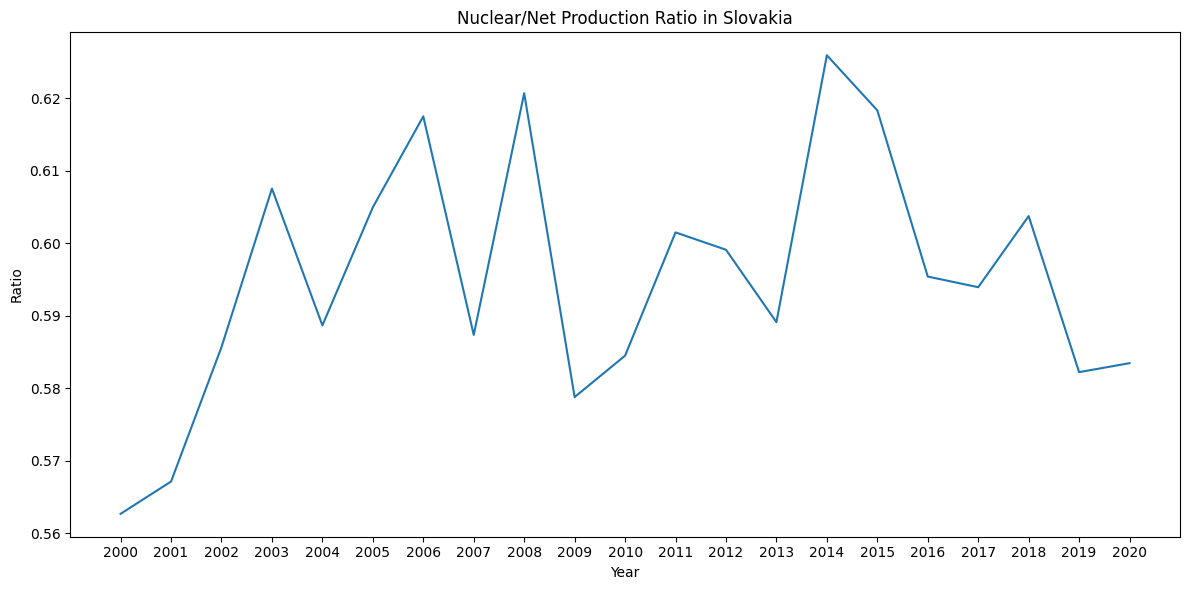

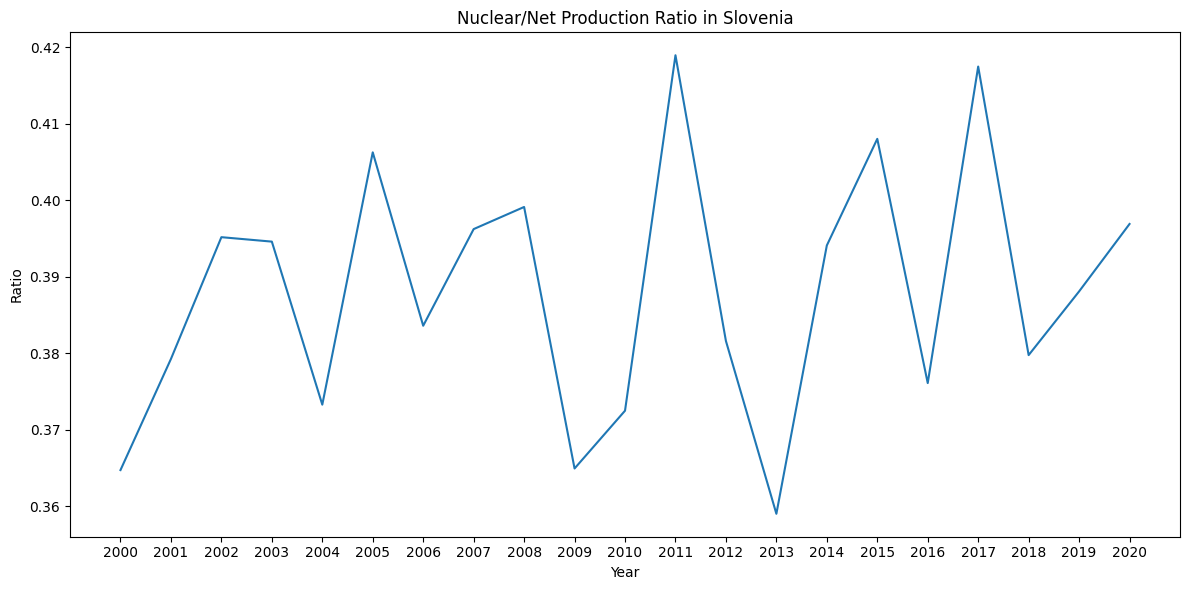

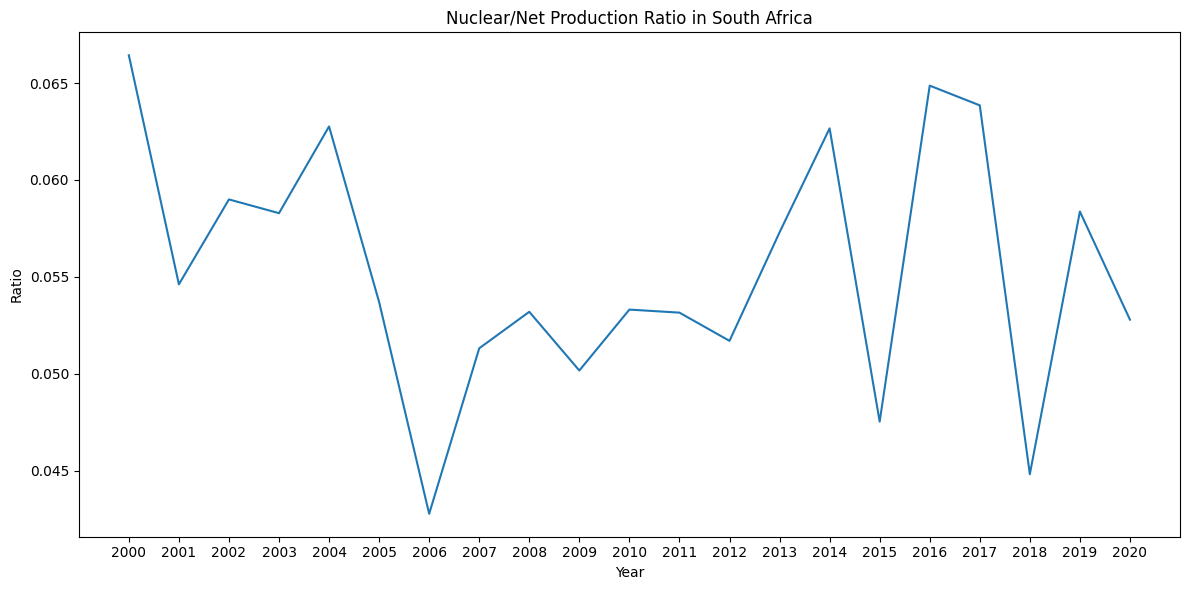

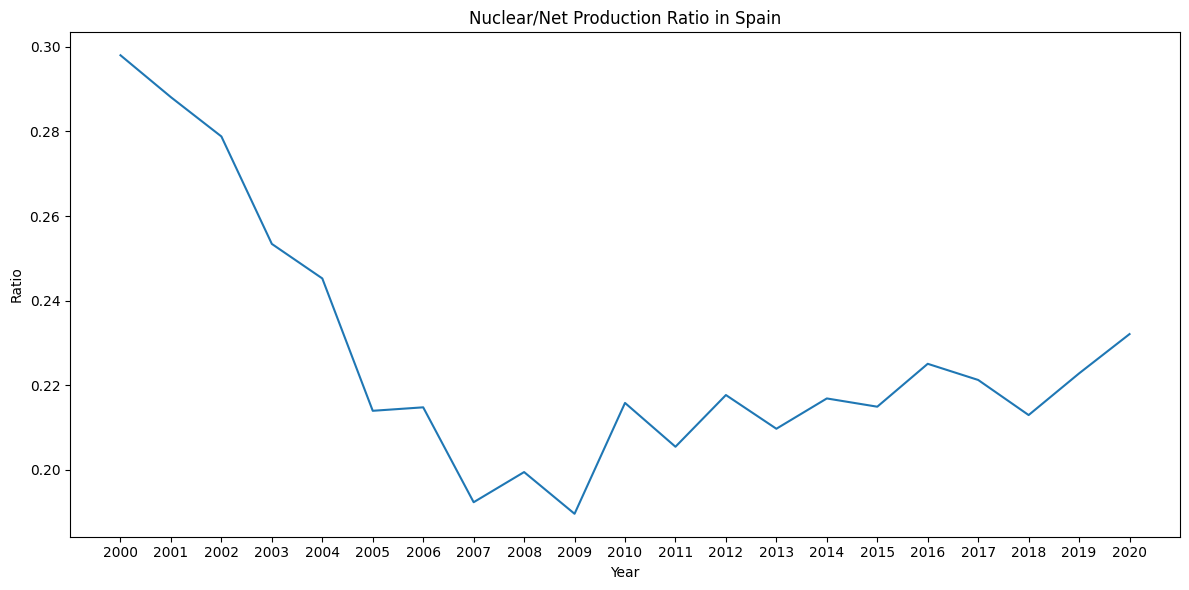

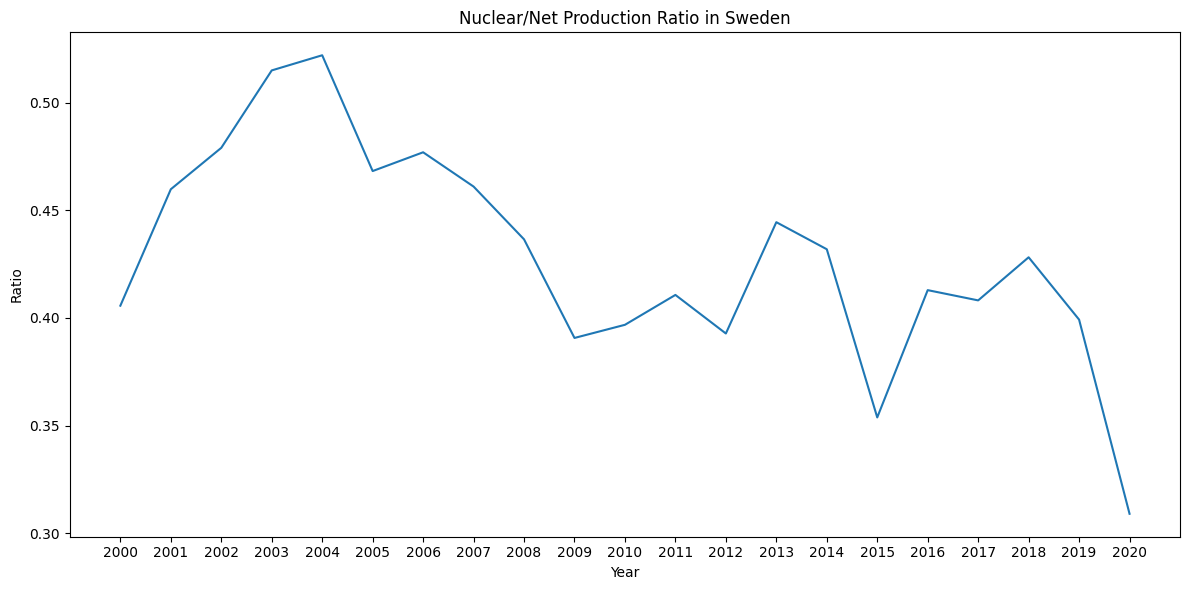

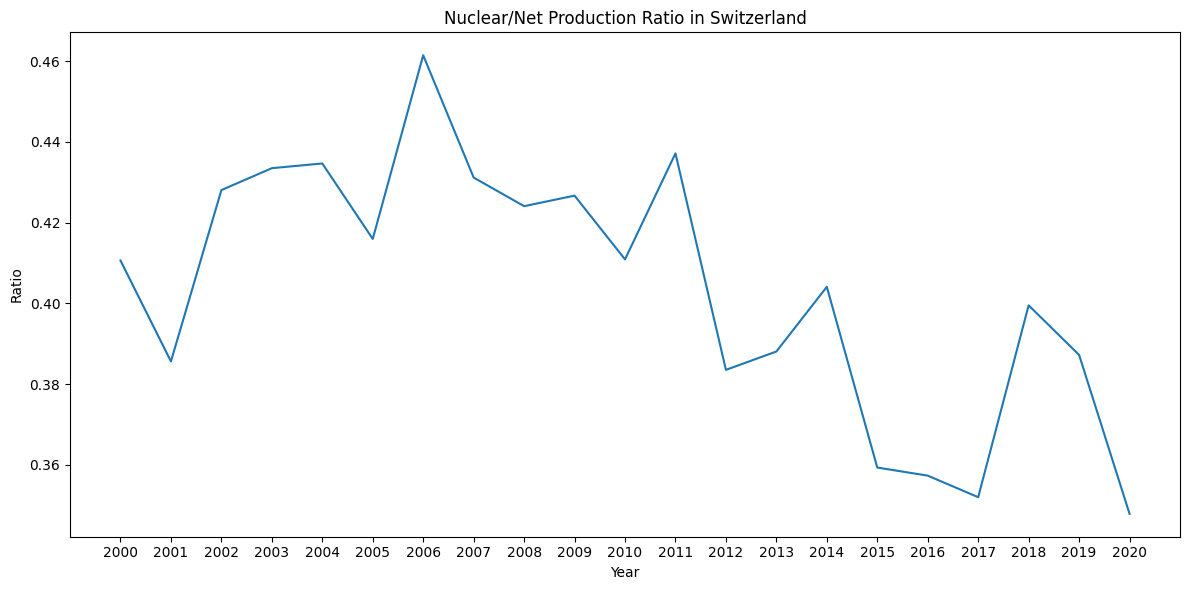

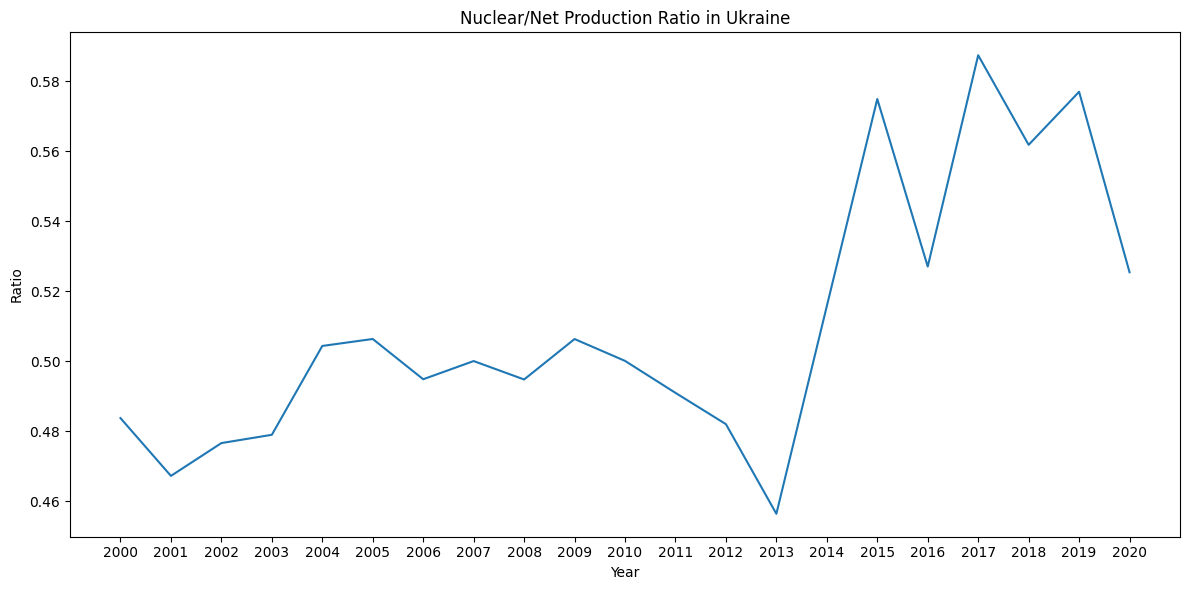

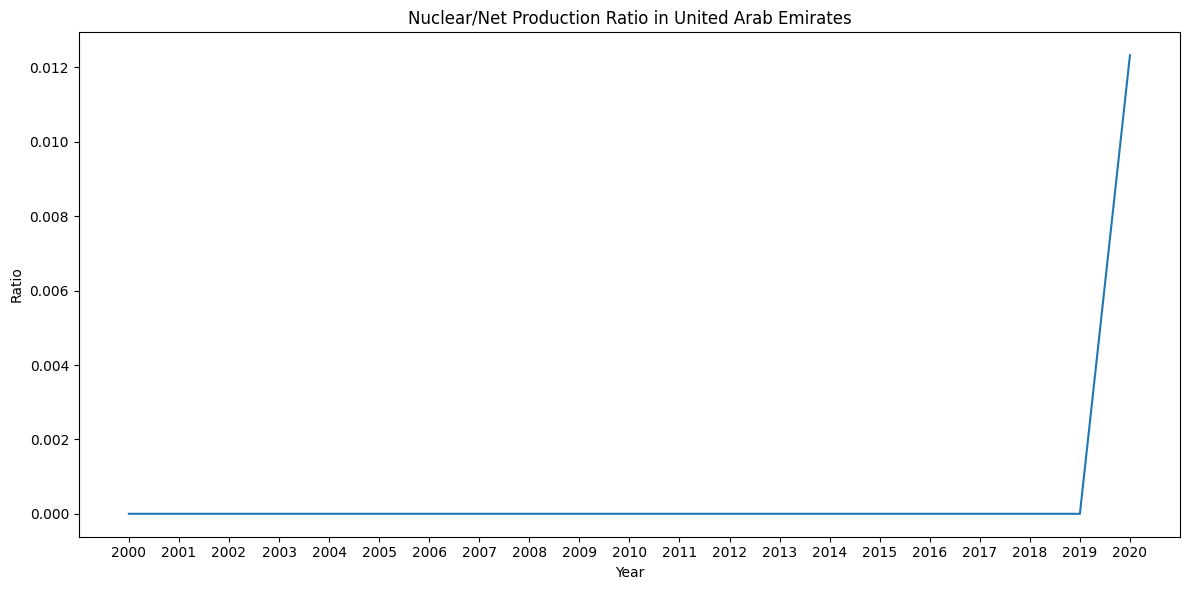

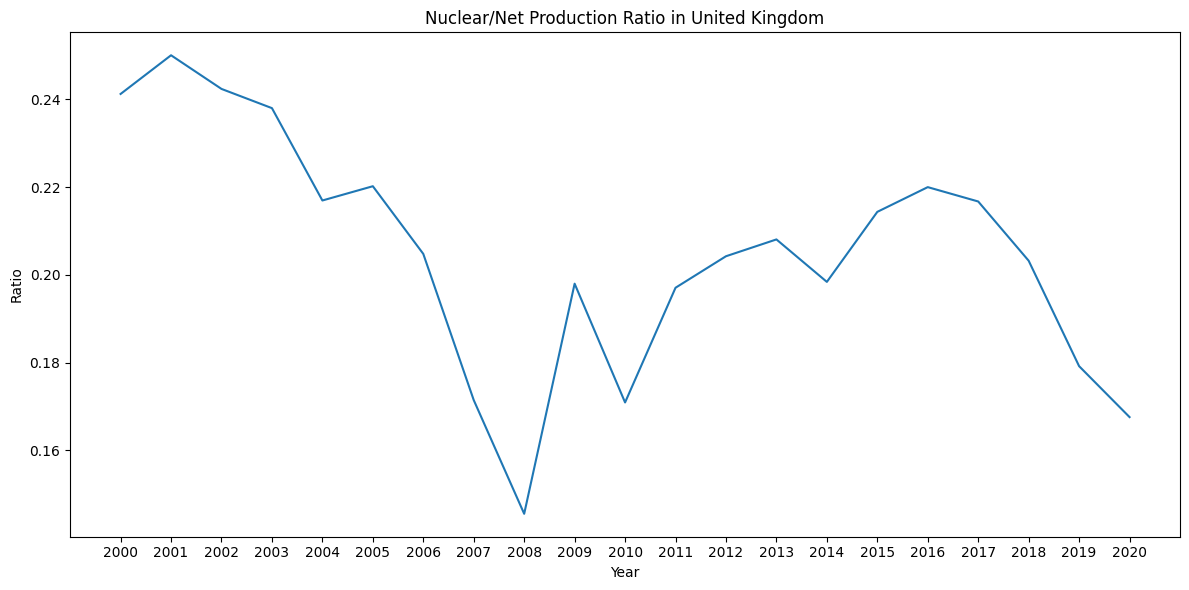

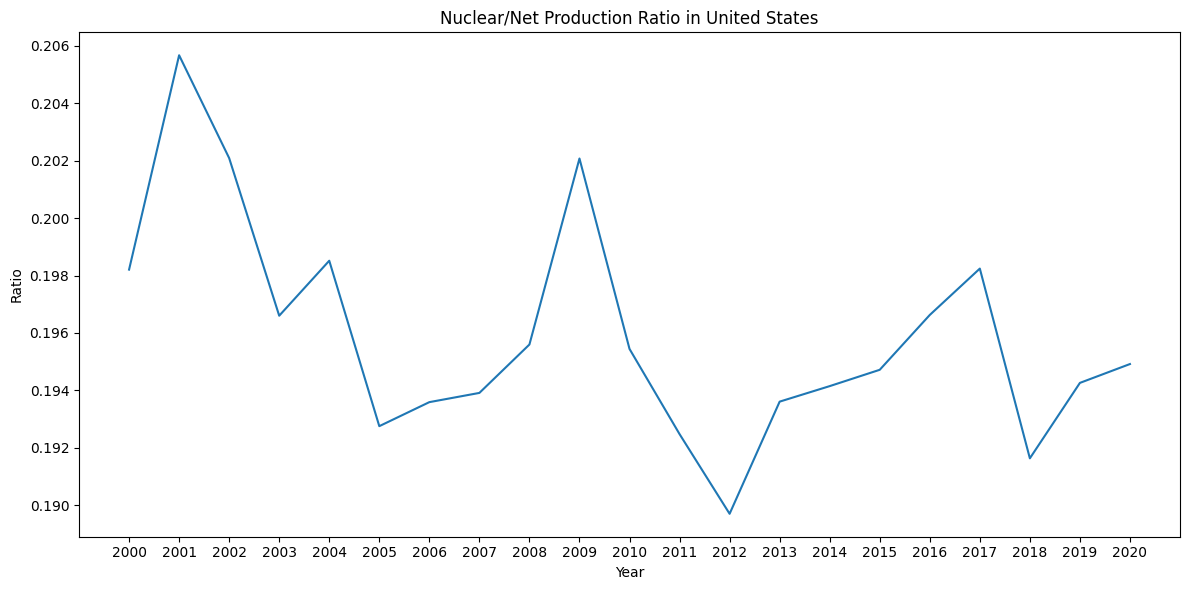

In [61]:
merged_df = pd.merge(nuclear, net, on='Country', suffixes=('_nuclear', '_net'))

countries = merged_df['Country']

data_columns_nuclear = merged_df.columns[1:22]
data_columns_net = merged_df.columns[22:]

for country in countries:

    data_nuclear = merged_df[merged_df['Country'] == country][data_columns_nuclear].values.flatten()
    data_net = merged_df[merged_df['Country'] == country][data_columns_net].values.flatten()

    division_result = data_nuclear / data_net

    years = range(2000, 2021)

    plt.figure(figsize=(12, 6))
    plt.plot(years, division_result, label=f'{country} - Nuclear/Net')
    plt.title(f'Nuclear/Net Production Ratio in {country}')
    plt.xlabel('Year')
    plt.ylabel('Ratio')
    plt.xticks(years)
    plt.tight_layout()
    plt.show()

# Functions

In [62]:
def plot_series(time, series, format="-", start=0, end=None):
    """
    Visualizes time series data

    Args:
      time (array of int) - contains the time steps
      series (array of int) - contains the measurements for each time step
      format - line style when plotting the graph
      label - tag for the line
      start - first time step to plot
      end - last time step to plot
    """
    plt.figure(figsize=(10, 6))

    if type(series) is tuple:
      for series_num in series:
        plt.plot(time[start:end], series_num[start:end], format)
    else:
      plt.plot(time[start:end], series[start:end], format)

    plt.xlabel("Time")
    plt.xticks(rotation=90)
    plt.ylabel("Value")
    plt.grid(True)
    plt.show()

In [63]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    """Generates dataset windows

    Args:
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to include in the feature
      batch_size (int) - the batch size
      shuffle_buffer(int) - buffer size to use for the shuffle method

    Returns:
      dataset (TF Dataset) - TF Dataset containing time windows
    """
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))
    dataset = dataset.shuffle(shuffle_buffer)
    dataset = dataset.batch(batch_size).prefetch(1)

    return dataset

# Models

In [64]:
def model_build(hp):
  l0 = tf.keras.layers.Dense(1, input_shape=[window_size], activation='relu')
  model = tf.keras.models.Sequential([l0])

  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8])
  hp_momentum = hp.Float('momentum', min_value=0,max_value=0.99,)

  model.compile(optimizer=tf.keras.optimizers.SGD(
                learning_rate=hp_learning_rate,
                momentum=hp_momentum),
                loss='mean_squared_error',
                metrics=['mean_squared_error', 'mean_absolute_error']
                )

  return model

In [65]:
nuclear_copy = nuclear.copy()
nuclear_copy.set_index('Country', inplace=True)

## dataset United States

In [66]:
# Define the split time
split_time = 13

# Get the train set
time_train = list(nuclear_copy.columns)[:split_time]
x_train = nuclear_copy.loc[['United States']].values.tolist()[0][:split_time]

# Get the validation set
time_valid = list(nuclear_copy.columns)[split_time:]
x_valid = nuclear_copy.loc[['United States']].values.tolist()[0][split_time:]

# Parameters
window_size = 5
batch_size = 5
shuffle_buffer_size = 100

In [67]:
# Generate the dataset windows
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

## United States

In [68]:
tuner = BayesianOptimization(
    model_build,
    objective='val_mean_squared_error',
    max_trials=10,
    num_initial_points=5,
   directory='tuner_directory_for_United_States',
   project_name='project_for_United_States'
    )

tuner.search(dataset, epochs=100, validation_data=dataset, verbose=1)

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.get_best_models(num_models=1)[0]

Reloading Tuner from tuner_directory_for_United_States/project_for_United_States/tuner0.json


In [69]:
print(f"""
The hyperparameter search is complete. The optimal number for momentum is {best_hps.get('momentum')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")



The hyperparameter search is complete. The optimal number for momentum is 0.0 and the optimal learning rate for the optimizer
is 1e-08.



In [70]:
best_model.fit(dataset, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 285ms/step - loss: 345.3995 - mean_squared_error: 345.3995 - mean_absolute_error: 15.0329
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 350.1788 - mean_squared_error: 350.1788 - mean_absolute_error: 15.1253
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 348.6559 - mean_squared_error: 348.6559 - mean_absolute_error: 14.9895
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 346.2601 - mean_squared_error: 346.2601 - mean_absolute_error: 14.7425
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 348.5958 - mean_squared_error: 348.5958 - mean_absolute_error: 14.8161
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 343.7493 - mean_squared_error: 343.7493 - mean_absolute_error: 14.5515
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 343.2441 - mean_squared_error: 343.2441 - mean_absolute_error: 14.5032
Epoc

In [71]:
eval_result = best_model.evaluate(dataset)
print(eval_result)

2/2 [==============================] - 0s 38ms/step - loss: 343.8281 - mean_squared_error: 343.8281 - mean_absolute_error: 14.3856
[343.828125, 343.828125, 14.385581970214844]


In [72]:
# Print the layer weights
all_layer_weights = [layer.get_weights() for layer in best_model.layers]

# Iterate through the layers and show weights
for i, layer_weights in enumerate(all_layer_weights):
    print(f"Layer {i + 1} - Weights:")
    for j, weights in enumerate(layer_weights):
        print(f"  Weight {j}:")
        print(weights)

Layer 1 - Weights:
  Weight 0:
[[-0.09661568]
 [ 0.6741207 ]
 [ 0.19062655]
 [-0.13597456]
 [ 0.37385637]]
  Weight 1:
[-0.00024266]


In [73]:
series = nuclear_copy.loc[['United States']].values

series[0]

array([753.89, 768.83, 780.06, 763.73, 788.53, 781.99, 787.22, 806.42,
       806.21, 798.85, 806.97, 790.2 , 769.33, 789.02, 797.17, 797.18,
       805.69, 804.95, 807.08, 809.41, 789.88])

In [74]:
forecast = []

for time in range(len(series[0]) - window_size):
  forecast.append(best_model.predict(series[0][time:time + window_size][np.newaxis]))
  print(time)
print(forecast)

forecast = forecast[split_time - window_size:]

1/1 [==============================] - 0s 106ms/step
0
1/1 [==============================] - 0s 27ms/step
1
1/1 [==============================] - 0s 24ms/step
2
1/1 [==============================] - 0s 26ms/step
3
1/1 [==============================] - 0s 33ms/step
4
1/1 [==============================] - 0s 25ms/step
5
1/1 [==============================] - 0s 30ms/step
6
1/1 [==============================] - 0s 27ms/step
7
1/1 [==============================] - 0s 26ms/step
8
1/1 [==============================] - 0s 23ms/step
9
1/1 [==============================] - 0s 26ms/step
10
1/1 [==============================] - 0s 28ms/step
11
1/1 [==============================] - 0s 27ms/step
12
1/1 [==============================] - 0s 36ms/step
13
1/1 [==============================] - 0s 29ms/step
14
1/1 [==============================] - 0s 22ms/step
15
[array([[785.0957]], dtype=float32), array([[782.2924]], dtype=float32), array([[777.7711]], dtype=float32), array([[801.28735]],

In [75]:
forecast

[array([[794.63025]], dtype=float32),
 array([[807.81744]], dtype=float32),
 array([[792.11914]], dtype=float32),
 array([[782.3195]], dtype=float32),
 array([[802.34314]], dtype=float32),
 array([[804.5029]], dtype=float32),
 array([[806.24146]], dtype=float32),
 array([[812.41754]], dtype=float32)]

In [76]:
results = np.array(forecast).squeeze()
results

array([794.63025, 807.81744, 792.11914, 782.3195 , 802.34314, 804.5029 ,
       806.24146, 812.41754], dtype=float32)

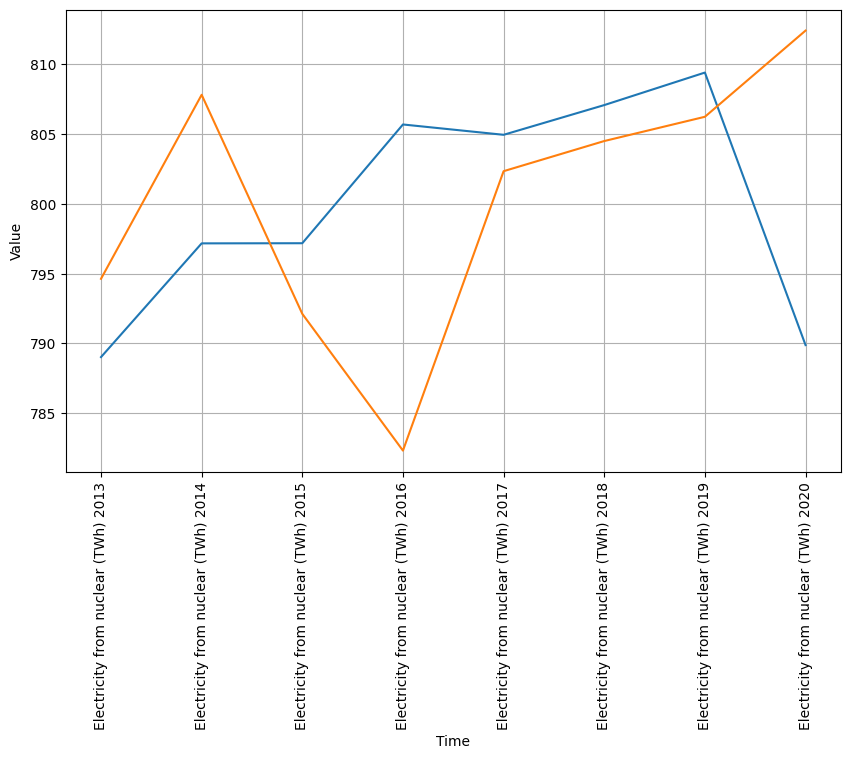

In [77]:
# Overlay the results with the validation set
plot_series(time_valid, (x_valid, results))

In [78]:
# Future predictions with the model
num_years_to_predict = 5

future_predictions = []

current_window = nuclear_copy.loc[['United States']].values.tolist()[0][-window_size:]

for _ in range(num_years_to_predict):

    next_year_prediction = best_model.predict(np.array([current_window]))[0][0]

    future_predictions.append(next_year_prediction)

    current_window = np.append(current_window[1:], next_year_prediction)

print(future_predictions)

1/1 [==============================] - 0s 19ms/step
[803.8844, 813.72705, 813.14453, 800.8674, 809.56055]


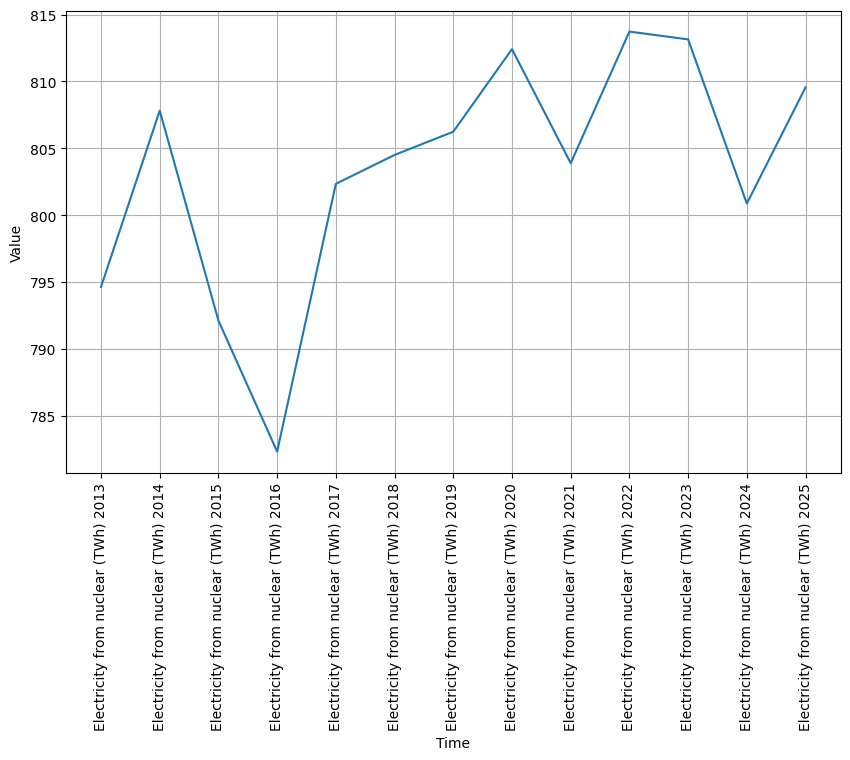

In [79]:
# Graph of the validation set and future predictions
start_year = 2021
end_year = 2025

time_predictions = [f'Electricity from nuclear (TWh) {year}' for year in range(start_year, end_year + 1)]

combined_time = np.concatenate((time_valid, time_predictions))
combined_data = np.concatenate((results, future_predictions))

plot_series(combined_time, combined_data)

plt.show()

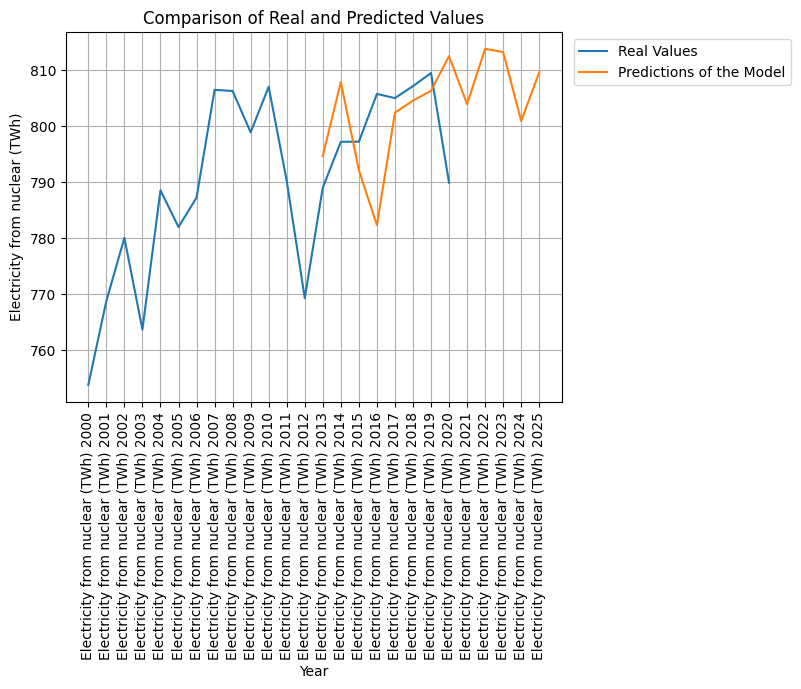

In [80]:
# Plot real data and future predictions
if len((time_train + time_valid)) < len((time_valid + time_predictions)):
    years_real = list((time_train + time_valid)) + [np.nan] * (len((time_valid + time_predictions)) - len((time_train + time_valid)))
elif len((time_valid + time_predictions)) < len((time_train + time_valid)):
    years_model = list((time_valid + time_predictions)) + [np.nan] * (len((time_train + time_valid)) - len((time_valid + time_predictions)))

plt.plot((time_train + time_valid), nuclear_copy.loc[['United States']].values.T, label='Real Values')
plt.plot((time_valid + time_predictions), combined_data, label='Predictions of the Model')

plt.xlabel('Year')
plt.ylabel('Electricity from nuclear (TWh)')
plt.title('Comparison of Real and Predicted Values')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.grid(True)
plt.show()

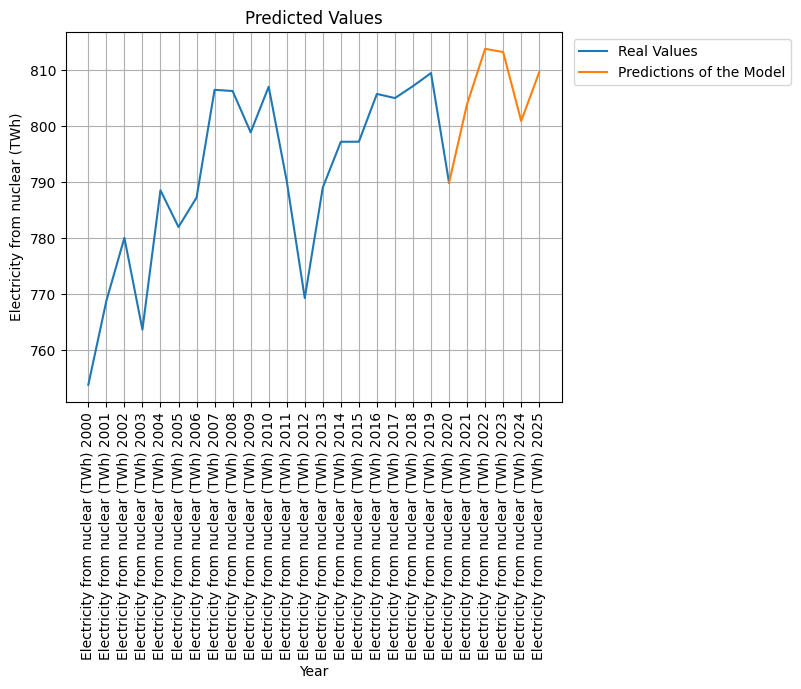

In [81]:
# Continuation of real values with future predictions
if len((time_train + time_valid)) < len((time_valid + time_predictions)):
    years_real = list((time_train + time_valid)) + [np.nan] * (len((time_valid + time_predictions)) - len((time_train + time_valid)))
elif len((time_valid + time_predictions)) < len((time_train + time_valid)):
    years_model = list((time_valid + time_predictions)) + [np.nan] * (len((time_train + time_valid)) - len((time_valid + time_predictions)))

plt.plot((time_train + time_valid), nuclear_copy.loc[['United States']].values.T, label='Real Values')
plt.plot(([time_valid[-1]] + time_predictions),
         (list(nuclear_copy.loc[['United States']].values.T[-1]) + future_predictions),
         label='Predictions of the Model')

plt.xlabel('Year')
plt.ylabel('Electricity from nuclear (TWh)')
plt.title('Predicted Values')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.grid(True)
plt.show()

In [82]:
best_model.optimizer.get_config()

{'name': 'SGD',
 'weight_decay': None,
 'clipnorm': None,
 'global_clipnorm': None,
 'clipvalue': None,
 'use_ema': False,
 'ema_momentum': 0.99,
 'ema_overwrite_frequency': None,
 'jit_compile': False,
 'is_legacy_optimizer': False,
 'learning_rate': 1e-08,
 'momentum': 0.0,
 'nesterov': False}

In [83]:
pickle.dump(best_model, open("US.pickle.dat","wb"))

In [84]:
model= pickle.load(open('US.pickle.dat',"rb"))
model.optimizer.get_config()

{'name': 'SGD',
 'weight_decay': None,
 'clipnorm': None,
 'global_clipnorm': None,
 'clipvalue': None,
 'use_ema': False,
 'ema_momentum': 0.99,
 'ema_overwrite_frequency': None,
 'jit_compile': False,
 'is_legacy_optimizer': False,
 'learning_rate': 1e-08,
 'momentum': 0.0,
 'nesterov': False}

## dataset France

In [85]:
# Define the split time
split_time = 14

# Get the train set
time_train = list(nuclear_copy.columns)[:split_time]
x_train = nuclear_copy.loc[['France']].values.tolist()[0][:split_time]

# Get the validation set
time_valid = list(nuclear_copy.columns)[split_time:]
x_valid = nuclear_copy.loc[['France']].values.tolist()[0][split_time:]

# Parameters
window_size = 5
batch_size = 5
shuffle_buffer_size = 100

In [86]:
# Generate the dataset windows
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

## France

In [87]:
tuner = BayesianOptimization(
    model_build,
    objective='val_mean_squared_error',
    max_trials=10,
    num_initial_points=5,
   directory='tuner_directory_for_France',
   project_name='project_for_France'
    )

tuner.search(dataset, epochs=100, validation_data=dataset, verbose=1)

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.get_best_models(num_models=1)[0]

Reloading Tuner from tuner_directory_for_France/project_for_France/tuner0.json


In [88]:
print(f"""
The hyperparameter search is complete. The optimal number for momentum is {best_hps.get('momentum')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")



The hyperparameter search is complete. The optimal number for momentum is 0.8739161411132551 and the optimal learning rate for the optimizer
is 1e-06.



In [89]:
best_model.fit(dataset, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 30ms/step - loss: 284.8932 - mean_squared_error: 284.8932 - mean_absolute_error: 11.5306
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 544.1409 - mean_squared_error: 544.1409 - mean_absolute_error: 20.8412
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 180.7507 - mean_squared_error: 180.7507 - mean_absolute_error: 10.1183
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 184.5562 - mean_squared_error: 184.5562 - mean_absolute_error: 10.8820
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 246.6414 - mean_squared_error: 246.6414 - mean_absolute_error: 9.6017
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 338.9875 - mean_squared_error: 338.9875 - mean_absolute_error: 16.9654
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 419.8061 - mean_squared_error: 419.8061 - mean_absolute_error: 15.7854
Epoch 

In [90]:
eval_result = best_model.evaluate(dataset)
print(eval_result)

2/2 [==============================] - 0s 24ms/step - loss: 170.1418 - mean_squared_error: 170.1418 - mean_absolute_error: 8.9113
[170.141845703125, 170.141845703125, 8.91128158569336]


In [91]:
# Print the layer weights
all_layer_weights = [layer.get_weights() for layer in best_model.layers]

for i, layer_weights in enumerate(all_layer_weights):
    print(f"Layer {i + 1} - Weights:")
    for j, weights in enumerate(layer_weights):
        print(f"  Weight {j}:")
        print(weights)

Layer 1 - Weights:
  Weight 0:
[[-0.13587512]
 [ 0.11724266]
 [ 0.5351921 ]
 [-0.14874493]
 [ 0.62985057]]
  Weight 1:
[0.00246739]


In [92]:
series = nuclear_copy.loc[['France']].values

series[0]

array([415.16, 421.08, 436.76, 441.07, 448.24, 451.53, 450.19, 439.73,
       439.45, 409.74, 428.52, 442.39, 425.41, 423.68, 436.48, 437.43,
       403.2 , 398.36, 412.94, 399.01, 353.83])

In [93]:
forecast = []

for time in range(len(series[0]) - window_size):
  forecast.append(best_model.predict(series[0][time:time + window_size][np.newaxis]))
  print(time)
print(forecast)

forecast = forecast[split_time - window_size:]

1/1 [==============================] - 0s 37ms/step
0
1/1 [==============================] - 0s 17ms/step
1
1/1 [==============================] - 0s 17ms/step
2
1/1 [==============================] - 0s 18ms/step
3
1/1 [==============================] - 0s 25ms/step
4
1/1 [==============================] - 0s 16ms/step
5
1/1 [==============================] - 0s 18ms/step
6
1/1 [==============================] - 0s 23ms/step
7
1/1 [==============================] - 0s 21ms/step
8
1/1 [==============================] - 0s 18ms/step
9
1/1 [==============================] - 0s 23ms/step
10
1/1 [==============================] - 0s 18ms/step
11
1/1 [==============================] - 0s 25ms/step
12
1/1 [==============================] - 0s 19ms/step
13
1/1 [==============================] - 0s 19ms/step
14
1/1 [==============================] - 0s 22ms/step
15
[array([[443.42886]], dtype=float32), array([[447.77527]], dtype=float32), array([[448.654]], dtype=float32), array([[444.28088]],

In [94]:
forecast

[array([[434.91095]], dtype=float32),
 array([[433.21725]], dtype=float32),
 array([[427.11038]], dtype=float32),
 array([[414.3641]], dtype=float32),
 array([[418.65134]], dtype=float32),
 array([[408.60706]], dtype=float32),
 array([[390.93192]], dtype=float32)]

In [95]:
results = np.array(forecast).squeeze()
results

array([434.91095, 433.21725, 427.11038, 414.3641 , 418.65134, 408.60706,
       390.93192], dtype=float32)

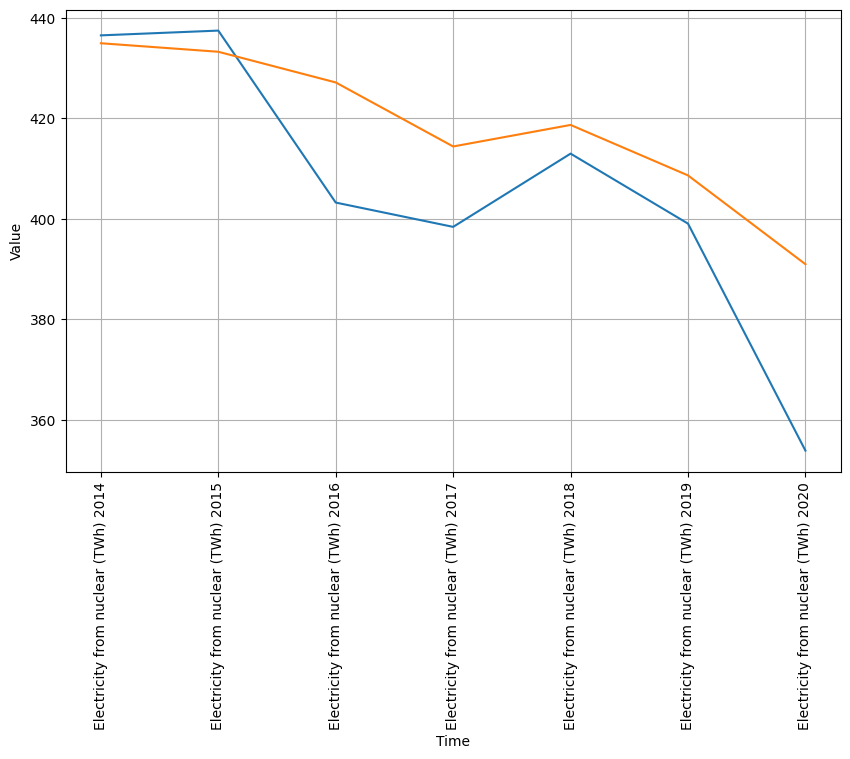

In [96]:
# Overlay the results with the validation set
plot_series(time_valid, (x_valid, results))

In [97]:
num_years_to_predict = 5

future_predictions = []

current_window = nuclear_copy.loc[['France']].values.tolist()[0][-window_size:]

for _ in range(num_years_to_predict):

    next_year_prediction = best_model.predict(np.array([current_window]))[0][0]

    future_predictions.append(next_year_prediction)

    current_window = np.append(current_window[1:], next_year_prediction)

print(future_predictions)

1/1 [==============================] - 0s 17ms/step
[376.43393, 392.30313, 371.1419, 364.1462, 380.16965]


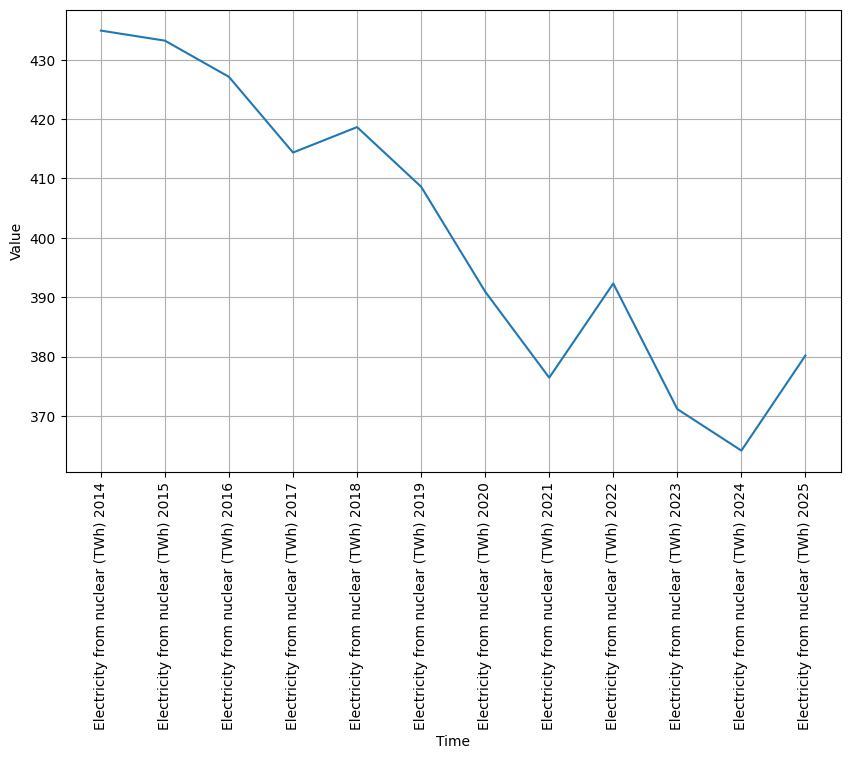

In [98]:
start_year = 2021
end_year = 2025

time_predictions = [f'Electricity from nuclear (TWh) {year}' for year in range(start_year, end_year + 1)]

combined_time = np.concatenate((time_valid, time_predictions))
combined_data = np.concatenate((results, future_predictions))

plot_series(combined_time, combined_data)

plt.show()

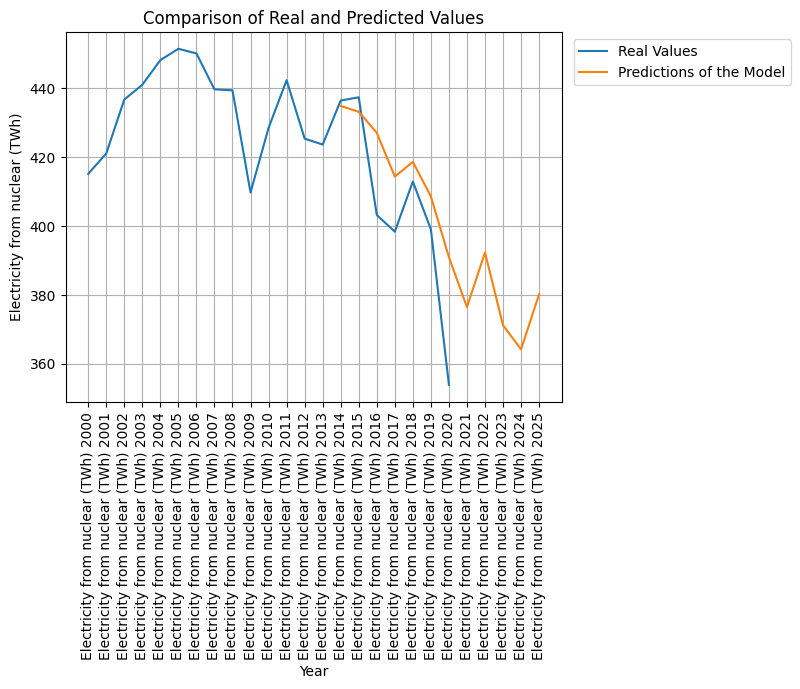

In [99]:
if len((time_train + time_valid)) < len((time_valid + time_predictions)):
    years_real = list((time_train + time_valid)) + [np.nan] * (len((time_valid + time_predictions)) - len((time_train + time_valid)))
elif len((time_valid + time_predictions)) < len((time_train + time_valid)):
    years_model = list((time_valid + time_predictions)) + [np.nan] * (len((time_train + time_valid)) - len((time_valid + time_predictions)))

plt.plot((time_train + time_valid), nuclear_copy.loc[['France']].values.T, label='Real Values')
plt.plot((time_valid + time_predictions), combined_data, label='Predictions of the Model')

plt.xlabel('Year')
plt.ylabel('Electricity from nuclear (TWh)')
plt.title('Comparison of Real and Predicted Values')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.grid(True)
plt.show()

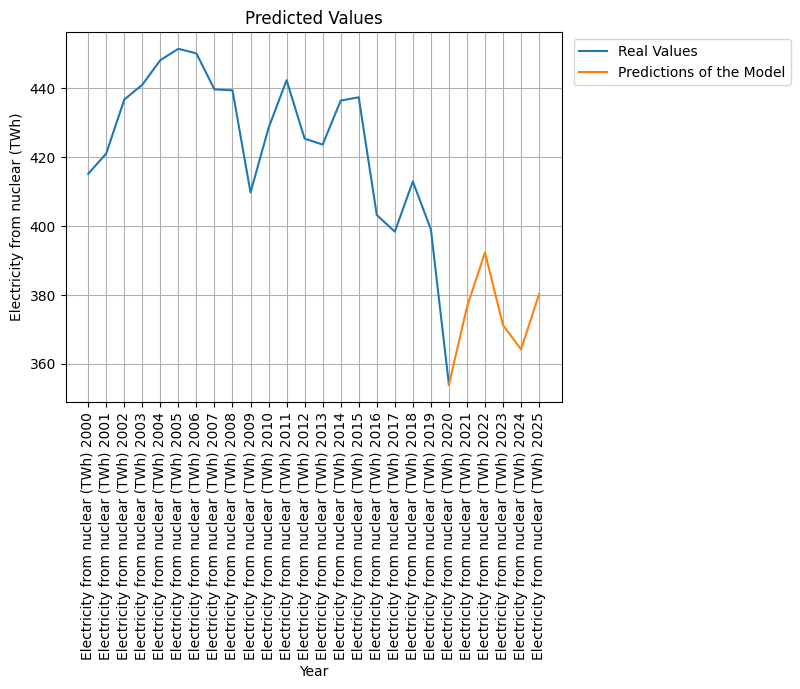

In [100]:
if len((time_train + time_valid)) < len((time_valid + time_predictions)):
    years_real = list((time_train + time_valid)) + [np.nan] * (len((time_valid + time_predictions)) - len((time_train + time_valid)))
elif len((time_valid + time_predictions)) < len((time_train + time_valid)):
    years_model = list((time_valid + time_predictions)) + [np.nan] * (len((time_train + time_valid)) - len((time_valid + time_predictions)))

plt.plot((time_train + time_valid), nuclear_copy.loc[['France']].values.T, label='Real Values')
plt.plot(([time_valid[-1]] + time_predictions),
         (list(nuclear_copy.loc[['France']].values.T[-1]) + future_predictions),
         label='Predictions of the Model')

plt.xlabel('Year')
plt.ylabel('Electricity from nuclear (TWh)')
plt.title('Predicted Values')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.grid(True)
plt.show()

In [101]:
best_model.optimizer.get_config()

{'name': 'SGD',
 'weight_decay': None,
 'clipnorm': None,
 'global_clipnorm': None,
 'clipvalue': None,
 'use_ema': False,
 'ema_momentum': 0.99,
 'ema_overwrite_frequency': None,
 'jit_compile': False,
 'is_legacy_optimizer': False,
 'learning_rate': 1e-06,
 'momentum': 0.8739161411132551,
 'nesterov': False}

In [102]:
#import pickle

pickle.dump(best_model, open("France.pickle.dat","wb"))

In [103]:
model= pickle.load(open('France.pickle.dat',"rb"))
model.optimizer.get_config()

{'name': 'SGD',
 'weight_decay': None,
 'clipnorm': None,
 'global_clipnorm': None,
 'clipvalue': None,
 'use_ema': False,
 'ema_momentum': 0.99,
 'ema_overwrite_frequency': None,
 'jit_compile': False,
 'is_legacy_optimizer': False,
 'learning_rate': 1e-06,
 'momentum': 0.8739161411132551,
 'nesterov': False}

## dataset China

In [104]:
# Define the split time
split_time = 15

# Get the train set
time_train = list(nuclear_copy.columns)[:split_time]
x_train = nuclear_copy.loc[['China']].values.tolist()[0][:split_time]

# Get the validation set
time_valid = list(nuclear_copy.columns)[split_time:]
x_valid = nuclear_copy.loc[['China']].values.tolist()[0][split_time:]

# Parameters
window_size = 5
batch_size = 5
shuffle_buffer_size = 100

In [105]:
# Generate the dataset windows
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

## China

In [106]:
tuner = BayesianOptimization(
    model_build,
    objective='val_mean_squared_error',
    max_trials=10,
    num_initial_points=5,
   directory='tuner_directory_for_China',
   project_name='project_for_China'
    )

tuner.search(dataset, epochs=100, validation_data=dataset, verbose=1)

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.get_best_models(num_models=1)[0]

Reloading Tuner from tuner_directory_for_China/project_for_China/tuner0.json


In [107]:
print(f"""
The hyperparameter search is complete. The optimal number for momentum is {best_hps.get('momentum')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")



The hyperparameter search is complete. The optimal number for momentum is 0.8070947432604317 and the optimal learning rate for the optimizer
is 1e-05.



In [108]:
best_model.fit(dataset, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 30ms/step - loss: 25.4053 - mean_squared_error: 25.4053 - mean_absolute_error: 3.7088
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 23.1333 - mean_squared_error: 23.1333 - mean_absolute_error: 3.6139
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 21.2175 - mean_squared_error: 21.2175 - mean_absolute_error: 3.4339
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 23.0192 - mean_squared_error: 23.0192 - mean_absolute_error: 3.4744
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 21.4450 - mean_squared_error: 21.4450 - mean_absolute_error: 3.5247
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 24.6148 - mean_squared_error: 24.6148 - mean_absolute_error: 3.7491
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 26.9529 - mean_squared_error: 26.9529 - mean_absolute_error: 3.6651
Epoch 8/100
2/2 [=========

In [109]:
eval_result = best_model.evaluate(dataset)
print(eval_result)

2/2 [==============================] - 0s 28ms/step - loss: 19.5603 - mean_squared_error: 19.5603 - mean_absolute_error: 3.2875
[19.56031036376953, 19.56031036376953, 3.287529706954956]


In [110]:
# Print the layer weights
all_layer_weights = [layer.get_weights() for layer in best_model.layers]

for i, layer_weights in enumerate(all_layer_weights):
    print(f"Layer {i + 1} - Weights:")
    for j, weights in enumerate(layer_weights):
        print(f"  Weight {j}:")
        print(weights)

Layer 1 - Weights:
  Weight 0:
[[0.0415312 ]
 [0.04664977]
 [0.05075274]
 [0.21953766]
 [0.81802845]]
  Weight 1:
[-0.05097261]


In [111]:
series = nuclear_copy.loc[['China']].values

series[0]

array([ 16.74,  17.47,  25.13,  43.34,  50.47,  53.09,  54.84,  62.13,
        68.39,  70.05,  74.74,  87.2 ,  98.32, 111.5 , 133.22, 171.38,
       213.18, 248.1 , 295.  , 348.7 , 366.2 ])

In [112]:
forecast = []

for time in range(len(series[0]) - window_size):
  forecast.append(best_model.predict(series[0][time:time + window_size][np.newaxis]))
  print(time)
print(forecast)

forecast = forecast[split_time - window_size:]

1/1 [==============================] - 0s 35ms/step
0
1/1 [==============================] - 0s 17ms/step
1
1/1 [==============================] - 0s 17ms/step
2
1/1 [==============================] - 0s 17ms/step
3
1/1 [==============================] - 0s 17ms/step
4
1/1 [==============================] - 0s 27ms/step
5
1/1 [==============================] - 0s 21ms/step
6
1/1 [==============================] - 0s 17ms/step
7
1/1 [==============================] - 0s 19ms/step
8
1/1 [==============================] - 0s 16ms/step
9
1/1 [==============================] - 0s 15ms/step
10
1/1 [==============================] - 0s 17ms/step
11
1/1 [==============================] - 0s 25ms/step
12
1/1 [==============================] - 0s 26ms/step
13
1/1 [==============================] - 0s 21ms/step
14
1/1 [==============================] - 0s 20ms/step
15
[array([[53.53531]], dtype=float32), array([[58.555706]], dtype=float32), array([[62.091934]], dtype=float32), array([[69.661415]]

In [113]:
forecast

[array([[145.56712]], dtype=float32),
 array([[183.2566]], dtype=float32),
 array([[228.00676]], dtype=float32),
 array([[269.24634]], dtype=float32),
 array([[320.08182]], dtype=float32),
 array([[379.61334]], dtype=float32)]

In [114]:
results = np.array(forecast).squeeze()
results

array([145.56712, 183.2566 , 228.00676, 269.24634, 320.08182, 379.61334],
      dtype=float32)

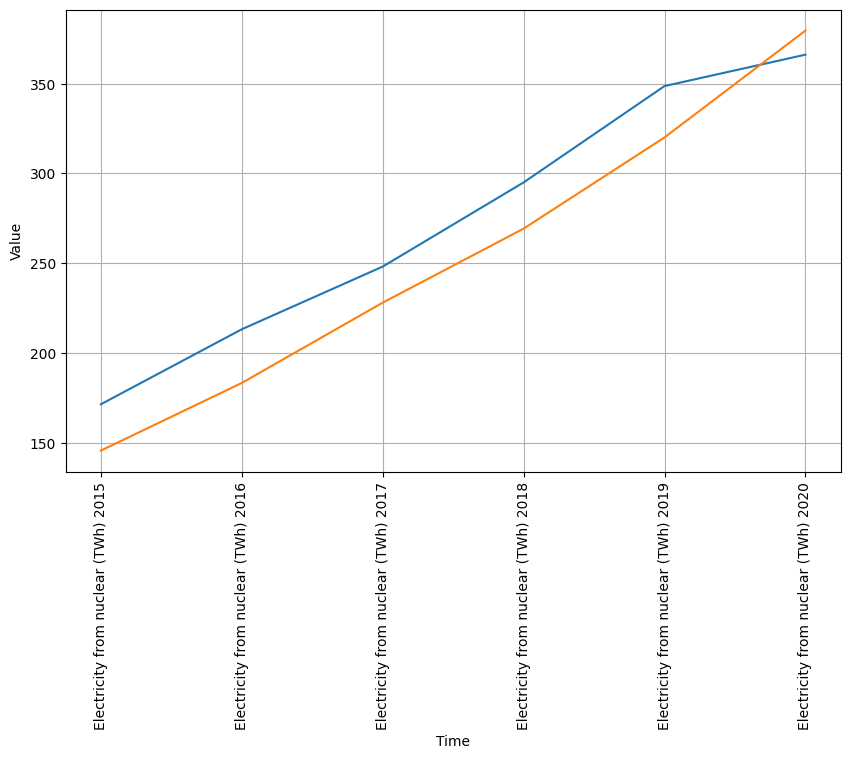

In [115]:
# Overlay the results with the validation set
plot_series(time_valid, (x_valid, results))

In [116]:
num_years_to_predict = 5

future_predictions = []

current_window = nuclear_copy.loc[['China']].values.tolist()[0][-window_size:]

for _ in range(num_years_to_predict):

    next_year_prediction = best_model.predict(np.array([current_window]))[0][0]

    future_predictions.append(next_year_prediction)

    current_window = np.append(current_window[1:], next_year_prediction)

print(future_predictions)

1/1 [==============================] - 0s 20ms/step
[411.46335, 458.6955, 512.61084, 572.42816, 638.4324]


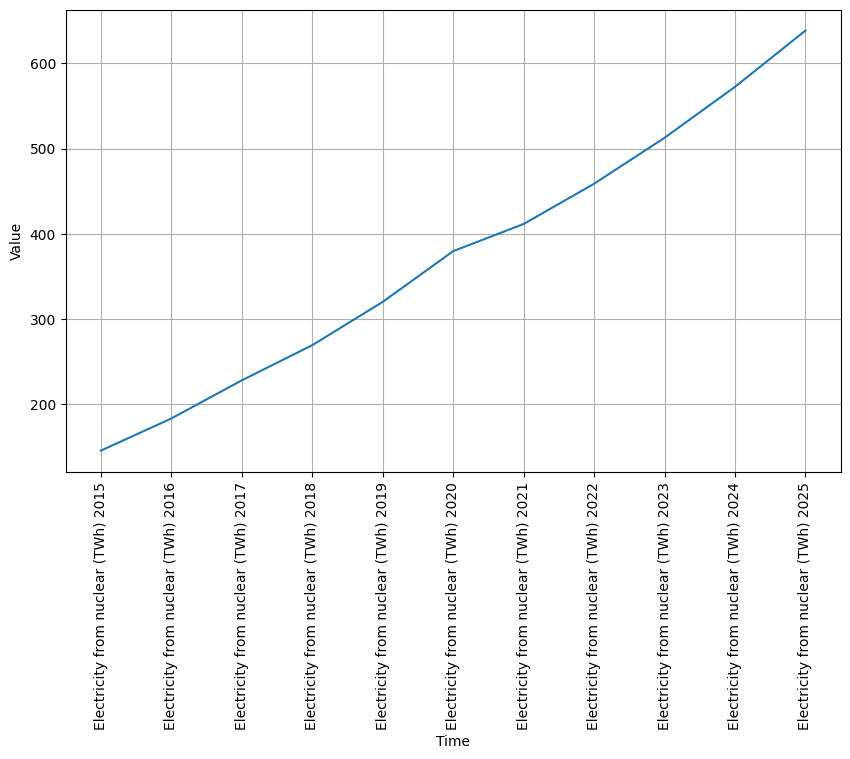

In [117]:
start_year = 2021
end_year = 2025

time_predictions = [f'Electricity from nuclear (TWh) {year}' for year in range(start_year, end_year + 1)]

combined_time = np.concatenate((time_valid, time_predictions))
combined_data = np.concatenate((results, future_predictions))

plot_series(combined_time, combined_data)

plt.show()

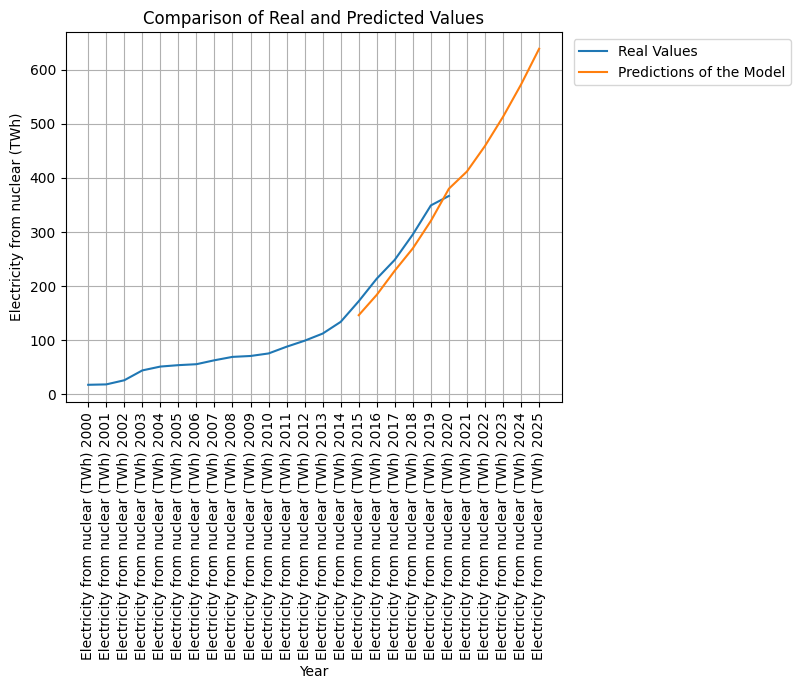

In [118]:
if len((time_train + time_valid)) < len((time_valid + time_predictions)):
    years_real = list((time_train + time_valid)) + [np.nan] * (len((time_valid + time_predictions)) - len((time_train + time_valid)))
elif len((time_valid + time_predictions)) < len((time_train + time_valid)):
    years_model = list((time_valid + time_predictions)) + [np.nan] * (len((time_train + time_valid)) - len((time_valid + time_predictions)))

plt.plot((time_train + time_valid), nuclear_copy.loc[['China']].values.T, label='Real Values')
plt.plot((time_valid + time_predictions), combined_data, label='Predictions of the Model')

plt.xlabel('Year')
plt.ylabel('Electricity from nuclear (TWh)')
plt.title('Comparison of Real and Predicted Values')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.grid(True)
plt.show()

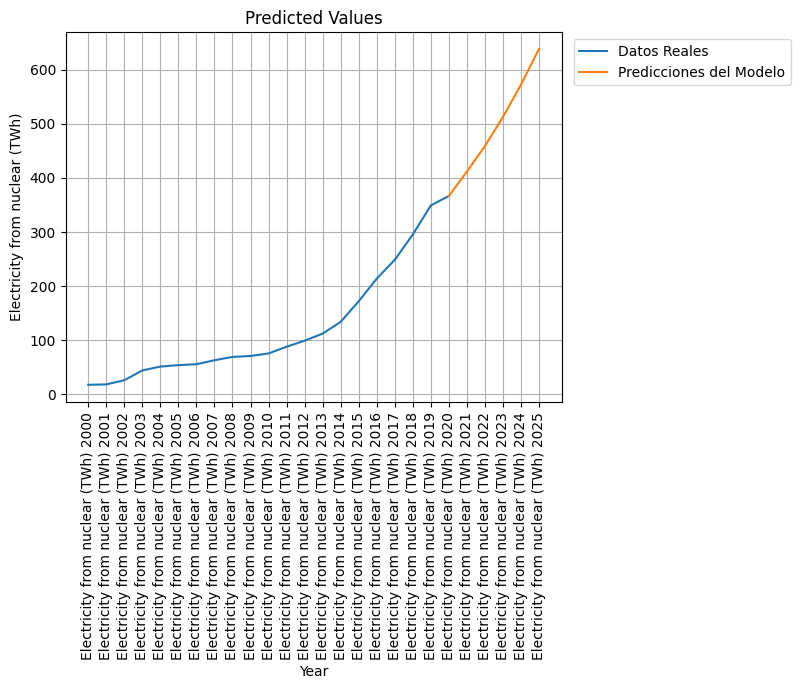

In [119]:
if len((time_train + time_valid)) < len((time_valid + time_predictions)):
    years_real = list((time_train + time_valid)) + [np.nan] * (len((time_valid + time_predictions)) - len((time_train + time_valid)))
elif len((time_valid + time_predictions)) < len((time_train + time_valid)):
    years_model = list((time_valid + time_predictions)) + [np.nan] * (len((time_train + time_valid)) - len((time_valid + time_predictions)))

plt.plot((time_train + time_valid), nuclear_copy.loc[['China']].values.T, label='Datos Reales')
plt.plot(([time_valid[-1]] + time_predictions),
         (list(nuclear_copy.loc[['China']].values.T[-1]) + future_predictions),
         label='Predicciones del Modelo')

plt.xlabel('Year')
plt.ylabel('Electricity from nuclear (TWh)')
plt.title('Predicted Values')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.grid(True)
plt.show()

In [120]:
best_model.optimizer.get_config()

{'name': 'SGD',
 'weight_decay': None,
 'clipnorm': None,
 'global_clipnorm': None,
 'clipvalue': None,
 'use_ema': False,
 'ema_momentum': 0.99,
 'ema_overwrite_frequency': None,
 'jit_compile': False,
 'is_legacy_optimizer': False,
 'learning_rate': 1e-05,
 'momentum': 0.8070947432604317,
 'nesterov': False}

In [121]:
#import pickle

pickle.dump(best_model, open("China.pickle.dat","wb"))

In [122]:
model= pickle.load(open('China.pickle.dat',"rb"))
model.optimizer.get_config()

{'name': 'SGD',
 'weight_decay': None,
 'clipnorm': None,
 'global_clipnorm': None,
 'clipvalue': None,
 'use_ema': False,
 'ema_momentum': 0.99,
 'ema_overwrite_frequency': None,
 'jit_compile': False,
 'is_legacy_optimizer': False,
 'learning_rate': 1e-05,
 'momentum': 0.8070947432604317,
 'nesterov': False}

## dataset Japan

In [123]:
# Define the split time
split_time = 10

# Get the train set
time_train = list(nuclear_copy.columns)[:split_time]
x_train = nuclear_copy.loc[['Japan']].values.tolist()[0][:split_time]

# Get the validation set
time_valid = list(nuclear_copy.columns)[split_time:]
x_valid = nuclear_copy.loc[['Japan']].values.tolist()[0][split_time:]

# Parameters
window_size = 5
batch_size = 5
shuffle_buffer_size = 100

In [124]:
# Generate the dataset windows
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

## Japan

In [125]:
tuner = BayesianOptimization(
    model_build,
    objective='val_mean_squared_error',
    max_trials=10,
    num_initial_points=5,
   directory='tuner_directory_for_Japan',
   project_name='project_for_Japan'
    )

tuner.search(dataset, epochs=100, validation_data=dataset, verbose=1)

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.get_best_models(num_models=1)[0]

Reloading Tuner from tuner_directory_for_Japan/project_for_Japan/tuner0.json


In [126]:
print(f"""
The hyperparameter search is complete. The optimal number for momentum is {best_hps.get('momentum')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")



The hyperparameter search is complete. The optimal number for momentum is 0.7267224189860021 and the optimal learning rate for the optimizer
is 1e-06.



In [127]:
best_model.fit(dataset, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 332ms/step - loss: 1275.4363 - mean_squared_error: 1275.4363 - mean_absolute_error: 25.6652
Epoch 2/100
1/1 [==============================] - 0s 21ms/step - loss: 841.7512 - mean_squared_error: 841.7512 - mean_absolute_error: 26.1797
Epoch 3/100
1/1 [==============================] - 0s 21ms/step - loss: 1076.5707 - mean_squared_error: 1076.5707 - mean_absolute_error: 29.1923
Epoch 4/100
1/1 [==============================] - 0s 19ms/step - loss: 1063.8420 - mean_squared_error: 1063.8420 - mean_absolute_error: 29.0974
Epoch 5/100
1/1 [==============================] - 0s 19ms/step - loss: 847.7180 - mean_squared_error: 847.7180 - mean_absolute_error: 26.7926
Epoch 6/100
1/1 [==============================] - 0s 28ms/step - loss: 882.2072 - mean_squared_error: 882.2072 - mean_absolute_error: 24.5518
Epoch 7/100
1/1 [==============================] - 0s 22ms/step - loss: 923.2982 - mean_squared_error: 923.2982 - mean_absolute_error: 

In [128]:
eval_result = best_model.evaluate(dataset)
print(eval_result)

1/1 [==============================] - 0s 187ms/step - loss: 538.9896 - mean_squared_error: 538.9896 - mean_absolute_error: 22.0934
[538.9895629882812, 538.9895629882812, 22.09335708618164]


In [129]:
# Print the layer weights
all_layer_weights = [layer.get_weights() for layer in best_model.layers]

for i, layer_weights in enumerate(all_layer_weights):
    print(f"Layer {i + 1} - Weights:")
    for j, weights in enumerate(layer_weights):
        print(f"  Weight {j}:")
        print(weights)

Layer 1 - Weights:
  Weight 0:
[[-0.2963699 ]
 [ 0.23764382]
 [ 0.44076794]
 [-0.8922808 ]
 [ 1.5036639 ]]
  Weight 1:
[-0.00638113]


In [130]:
series = nuclear_copy.loc[['Japan']].values

series[0]

array([305.95, 303.86, 280.34, 228.01, 268.32, 280.5 , 291.54, 267.34,
       241.25, 263.05, 278.36, 153.38,  15.12,  10.43,   0.  ,   3.24,
        14.87,  27.75,  47.82,  63.88,  41.86])

In [131]:
forecast = []

for time in range(len(series[0]) - window_size):
  forecast.append(best_model.predict(series[0][time:time + window_size][np.newaxis]))
  print(time)
print(forecast)

forecast = forecast[split_time - window_size:]

1/1 [==============================] - 0s 61ms/step
0
1/1 [==============================] - 0s 18ms/step
1
1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 21ms/step
3
1/1 [==============================] - 0s 23ms/step
4
1/1 [==============================] - 0s 18ms/step
5
1/1 [==============================] - 0s 20ms/step
6
1/1 [==============================] - 0s 24ms/step
7
1/1 [==============================] - 0s 21ms/step
8
1/1 [==============================] - 0s 17ms/step
9
1/1 [==============================] - 0s 19ms/step
10
1/1 [==============================] - 0s 17ms/step
11
1/1 [==============================] - 0s 19ms/step
12
1/1 [==============================] - 0s 19ms/step
13
1/1 [==============================] - 0s 19ms/step
14
1/1 [==============================] - 0s 19ms/step
15
[array([[305.10873]], dtype=float32), array([[259.42014]], dtype=float32), array([[277.4547]], dtype=float32), array([[261.67227]]

In [132]:
forecast

[array([[284.25546]], dtype=float32),
 array([[267.3023]], dtype=float32),
 array([[76.29436]], dtype=float32),
 array([[0.]], dtype=float32),
 array([[57.980965]], dtype=float32),
 array([[0.]], dtype=float32),
 array([[0.]], dtype=float32),
 array([[17.459621]], dtype=float32),
 array([[26.789026]], dtype=float32),
 array([[54.462215]], dtype=float32),
 array([[68.18364]], dtype=float32)]

In [133]:
results = np.array(forecast).squeeze()
results

array([284.25546 , 267.3023  ,  76.29436 ,   0.      ,  57.980965,
         0.      ,   0.      ,  17.459621,  26.789026,  54.462215,
        68.18364 ], dtype=float32)

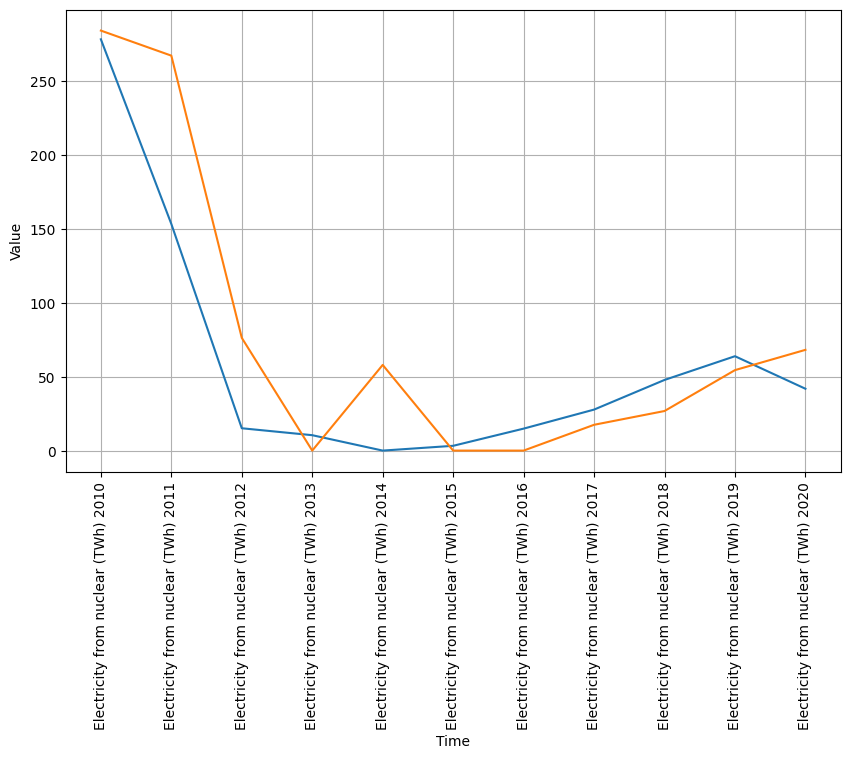

In [134]:
# Overlay the results with the validation set
plot_series(time_valid, (x_valid, results))

In [135]:
num_years_to_predict = 5

future_predictions = []

current_window = nuclear_copy.loc[['Japan']].values.tolist()[0][-window_size:]

for _ in range(num_years_to_predict):

    next_year_prediction = best_model.predict(np.array([current_window]))[0][0]

    future_predictions.append(next_year_prediction)

    current_window = np.append(current_window[1:], next_year_prediction)

print(future_predictions)

1/1 [==============================] - 0s 17ms/step
[29.203205, 37.850666, 50.309666, 45.75652, 35.122974]


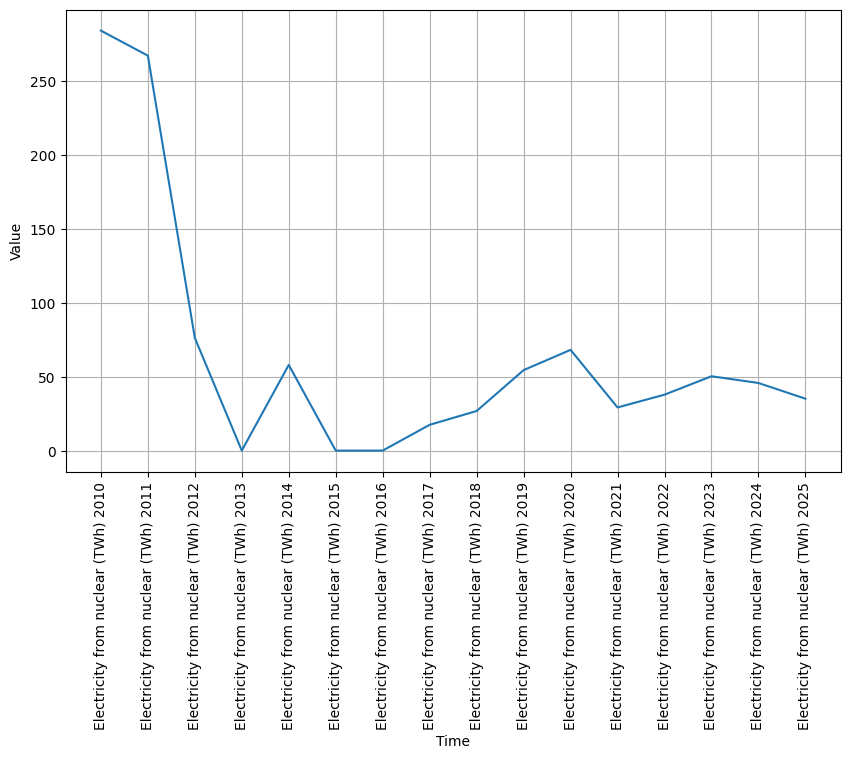

In [136]:
start_year = 2021
end_year = 2025

time_predictions = [f'Electricity from nuclear (TWh) {year}' for year in range(start_year, end_year + 1)]

combined_time = np.concatenate((time_valid, time_predictions))
combined_data = np.concatenate((results, future_predictions))

plot_series(combined_time, combined_data)

plt.show()

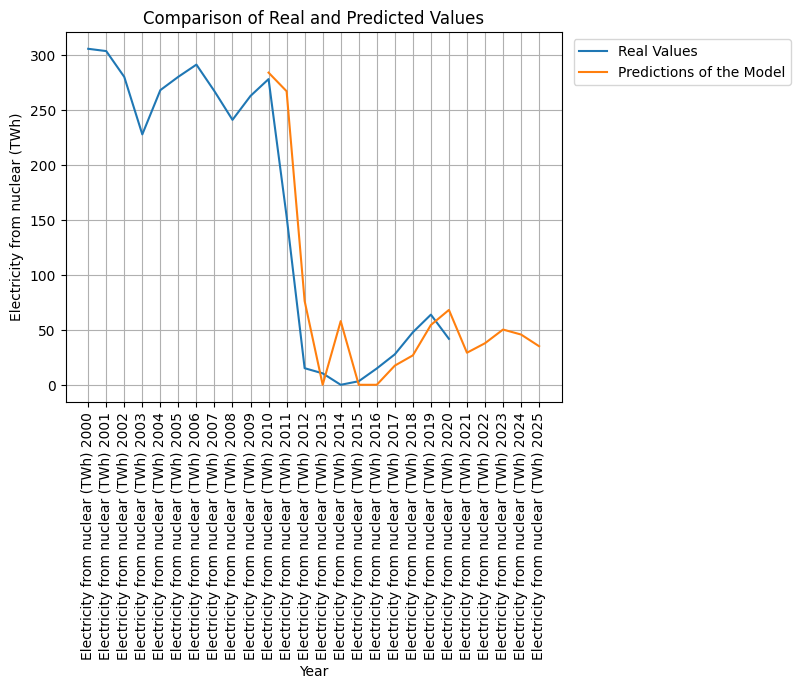

In [137]:
if len((time_train + time_valid)) < len((time_valid + time_predictions)):
    years_real = list((time_train + time_valid)) + [np.nan] * (len((time_valid + time_predictions)) - len((time_train + time_valid)))
elif len((time_valid + time_predictions)) < len((time_train + time_valid)):
    years_model = list((time_valid + time_predictions)) + [np.nan] * (len((time_train + time_valid)) - len((time_valid + time_predictions)))

plt.plot((time_train + time_valid), nuclear_copy.loc[['Japan']].values.T, label='Real Values')
plt.plot((time_valid + time_predictions), combined_data, label='Predictions of the Model')

plt.xlabel('Year')
plt.ylabel('Electricity from nuclear (TWh)')
plt.title('Comparison of Real and Predicted Values')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.grid(True)
plt.show()

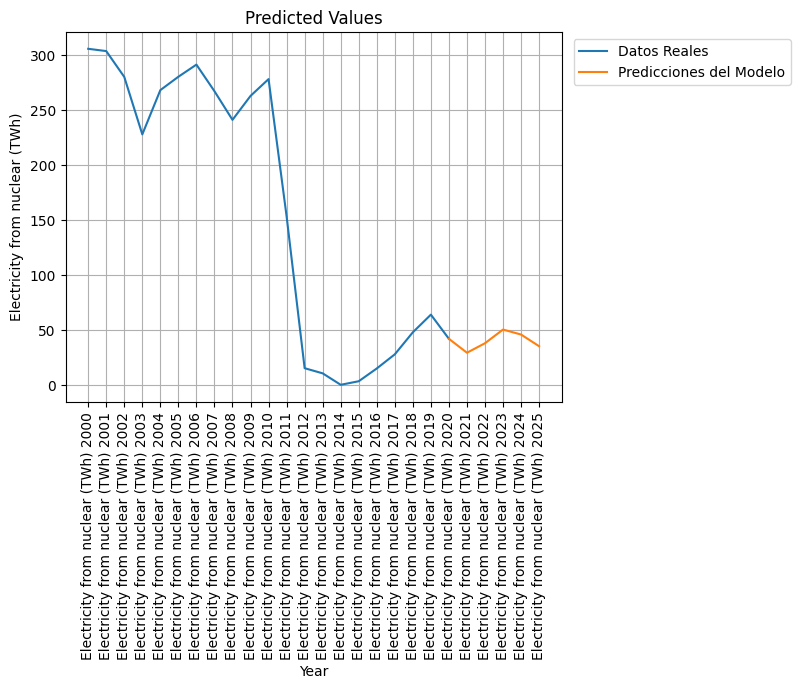

In [138]:
if len((time_train + time_valid)) < len((time_valid + time_predictions)):
    years_real = list((time_train + time_valid)) + [np.nan] * (len((time_valid + time_predictions)) - len((time_train + time_valid)))
elif len((time_valid + time_predictions)) < len((time_train + time_valid)):
    years_model = list((time_valid + time_predictions)) + [np.nan] * (len((time_train + time_valid)) - len((time_valid + time_predictions)))

plt.plot((time_train + time_valid), nuclear_copy.loc[['Japan']].values.T, label='Datos Reales')
plt.plot(([time_valid[-1]] + time_predictions),
         (list(nuclear_copy.loc[['Japan']].values.T[-1]) + future_predictions),
         label='Predicciones del Modelo')

plt.xlabel('Year')
plt.ylabel('Electricity from nuclear (TWh)')
plt.title('Predicted Values')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.grid(True)
plt.show()

In [139]:
best_model.optimizer.get_config()

{'name': 'SGD',
 'weight_decay': None,
 'clipnorm': None,
 'global_clipnorm': None,
 'clipvalue': None,
 'use_ema': False,
 'ema_momentum': 0.99,
 'ema_overwrite_frequency': None,
 'jit_compile': False,
 'is_legacy_optimizer': False,
 'learning_rate': 1e-06,
 'momentum': 0.7267224189860021,
 'nesterov': False}

In [140]:
pickle.dump(best_model, open("Japan.pickle.dat","wb"))

In [141]:
model= pickle.load(open('Japan.pickle.dat',"rb"))
model.optimizer.get_config()

{'name': 'SGD',
 'weight_decay': None,
 'clipnorm': None,
 'global_clipnorm': None,
 'clipvalue': None,
 'use_ema': False,
 'ema_momentum': 0.99,
 'ema_overwrite_frequency': None,
 'jit_compile': False,
 'is_legacy_optimizer': False,
 'learning_rate': 1e-06,
 'momentum': 0.7267224189860021,
 'nesterov': False}

# CSV

In [142]:
nuclear_copy.to_csv('nuclear.csv', index=True)

In [143]:
row = nuclear_copy.loc['United States'].to_frame().T

file_name = "us_nuclear.csv"

row.to_csv(file_name, header=False)

In [144]:
row = nuclear_copy.loc['France'].to_frame().T

file_name = "france_nuclear.csv"

row.to_csv(file_name, header=False)

In [145]:
row = nuclear_copy.loc['China'].to_frame().T

file_name = "china_nuclear.csv"

row.to_csv(file_name, header=False)

In [146]:
row = nuclear_copy.loc['Japan'].to_frame().T

file_name = "japan_nuclear.csv"

row.to_csv(file_name, header=False)